## Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# For downloading and unzipping files
import urllib.request
import zipfile

# Create wrapper for StandardScaler
import typing

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, 
    LabelBinarizer, 
    StandardScaler, 
    PolynomialFeatures
)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
    ElasticNet
)
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Set viewing limits
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

In [2]:
# !pip install sklearn_pandas

## Load data

In [3]:
# Load Green, Hand and Zhang (2017)'s SAS output
# df_ghz = pd.read_csv("../data/GHZ_variables.csv")
# df_ghz = df_ghz.reindex(sorted(df_ghz.columns), axis=1)
# df_ghz

This data set is generated from the SAS code provided by Jeremiah Green. Updated his code to take in variables from `1975 through 2015` to `1972 through 2020`. We will not be using this data set in the modeling stage, as this was already performed by Gu, Kelly and Xiu (2020). Instead, this data set is used during the EDA stage to compare against the REIT database generated by me below.

In [4]:
# Load Gu, Kelly and Xiu (2017)'s SAS output
df_gkx = pd.read_csv("../data/GKX_20201231.csv")
df_gkx = df_gkx.reindex(sorted(df_gkx.columns), axis=1)
df_gkx

DATE       RET  SHROUT    absacc       acc    aeavol   age  \
0        19260130  0.032732     600       NaN       NaN       NaN   NaN   
1        19260130  0.017857     200       NaN       NaN       NaN   NaN   
2        19260130  0.161667     156       NaN       NaN       NaN   NaN   
3        19260130  0.141892     250       NaN       NaN       NaN   NaN   
4        19260130 -0.035714     500       NaN       NaN       NaN   NaN   
...           ...       ...     ...       ...       ...       ...   ...   
4345503  20201231  0.109665   84977  0.085746 -0.085746  0.285395  35.0   
4345504  20201231  0.076239   12552  0.025098 -0.025098  0.046616  10.0   
4345505  20201231  0.135851   36938  0.022565 -0.022565  0.365427  10.0   
4345506  20201231  0.122605   33482  0.215401 -0.215401  1.784287  10.0   
4345507  20201231  0.243252  947901  0.102016 -0.102016  0.006117  10.0   

              agr  baspread      beta    betasq  bm  bm_ia      cash  \
0             NaN  0.006857       NaN       NaN NaN    NaN       NaN   
1             NaN  0.018018       NaN       NaN NaN    NaN       NaN   
2             NaN  0.004158       NaN       NaN NaN    NaN       NaN   
3             NaN  0.006780       NaN       NaN NaN    NaN       NaN   
4             NaN  0.071795       NaN       NaN NaN    NaN       NaN   
...           ...       ...       ...       ...  ..    ...       ...   
4345503 -0.145079  0.060029  1.921340  3.691548 NaN    NaN  0.008385   
4345504 -0.134903  0.035050  1.301940  1.695047 NaN    NaN  0.226784   
4345505 -0.153766  0.029388  0.847169  0.717695 NaN    NaN  0.349677   
4345506 -0.062402  0.051558  0.389812  0.151954 NaN    NaN  0.050513   
4345507 -0.153646  0.047931  1.349505  1.821163 NaN    NaN  0.222094   

         cashdebt     cashpr       cfp    cfp_ia   chatoia    chcsho  \
0             NaN        NaN       NaN       NaN       NaN       NaN   
1             NaN        NaN       NaN       NaN       NaN       NaN   
2             NaN        NaN       NaN       NaN       NaN       NaN   
3             NaN        NaN       NaN       NaN       NaN       NaN   
4             NaN        NaN       NaN       NaN       NaN       NaN   
...           ...        ...       ...       ...       ...       ...   
4345503  0.104231  19.464647  0.107541  0.013794 -0.013714  0.008004   
4345504  0.287272   1.095352  0.067275  0.100594 -0.095026  0.003637   
4345505  0.408222   1.446073  0.080546  0.113864  0.095853  0.011171   
4345506 -0.101122 -13.505851  0.242402  0.233455  0.190875  0.367046   
4345507  0.050176   8.295322  0.031763 -0.071347  0.083907  0.048649   

          chempia     chinv     chmom    chpmia      chtx   cinvest  convind  \
0             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
1             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
...           ...       ...       ...       ...       ...       ...      ...   
4345503 -0.138167  0.001545  0.798194  0.335792  0.000957  0.010704      0.0   
4345504 -0.101061  0.013358  0.551929 -0.555954 -0.004501 -0.013873      0.0   
4345505  0.078991  0.030661  0.011311 -0.540223 -0.000443 -0.011094      0.0   
4345506  0.405385  0.076563  0.282874 -0.001657  0.000405  0.003124      0.0   
4345507 -0.042816  0.013694  0.868039 -0.673164 -0.000722  0.001210      1.0   

           currat      depr  divi  divo     dolvol        dy       ear  \
0             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
1             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
2             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
3             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
4             NaN       NaN   NaN   NaN        NaN 

This is the cleaned data set obtaind from Gu Kelly Xiu

In [5]:
df_gkx.dtypes

DATE                 int64
RET                float64
SHROUT               int64
absacc             float64
acc                float64
aeavol             float64
age                float64
agr                float64
baspread           float64
beta               float64
betasq             float64
bm                 float64
bm_ia              float64
cash               float64
cashdebt           float64
cashpr             float64
cfp                float64
cfp_ia             float64
chatoia            float64
chcsho             float64
chempia            float64
chinv              float64
chmom              float64
chpmia             float64
chtx               float64
cinvest            float64
convind            float64
currat             float64
depr               float64
divi               float64
divo               float64
dolvol             float64
dy                 float64
ear                float64
egr                float64
ep                 float64
gma                float64
g

In [6]:
# Load REIT output
df_reit = pd.read_csv("../data/REIT_variables.csv")
df_reit = df_reit.reindex(sorted(df_reit.columns), axis=1)
df_reit

DATE  DLRET  DLSTCD  EXCHCD       RET  SHRCD  SHROUT       VOL  \
0      19731231    0.0     NaN       2 -0.103448     18    1216     130.0   
1      19740131    0.0     NaN       2 -0.038462     18    1216      90.0   
2      19740228    0.0     NaN       2 -0.056000     18    1216     201.0   
3      19740329    0.0     NaN       2 -0.021978     18    1216     317.0   
4      19740430    0.0     NaN       2 -0.011236     18    1216     127.0   
...         ...    ...     ...     ...       ...    ...     ...       ...   
53574  20201231    0.0   100.0       1  0.068646     18  140297  279905.0   
53575  20201231    0.0   100.0       1  0.048077     18  273700  820684.0   
53576  20201231    0.0   100.0       1  0.038388     18  126029  162685.0   
53577  20201231    0.0   100.0       1  0.014843     18   68373   62651.0   
53578  20201231    0.0   100.0       1 -0.066538     18  152145  308007.0   

         absacc       acc  age       agr        bm      bm_ia  cashdebt  \
0           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
1           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
2           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
3           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
4           NaN       NaN    1       NaN  0.982730   0.211526  0.092696   
...         ...       ...  ...       ...       ...        ...       ...   
53574  0.007220 -0.007220   10  0.351768  0.936513  31.221905  0.067258   
53575  0.022184 -0.022184   11  0.192123  1.000662  31.286054       NaN   
53576  0.005845  0.005845   17 -0.021064  0.649617  30.935010       NaN   
53577  0.020063 -0.020063   10  0.173648  0.416669  30.702061       NaN   
53578  0.033566 -0.033566   10  0.055960  0.586663  30.872055       NaN   

          cashpr        cf       cfp    cfp_ia  chadv     chato   chatoia  \
0      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
1      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
2      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
3      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
4      -3.571059       NaN       NaN       NaN    NaN       NaN       NaN   
...          ...       ...       ...       ...    ...       ...       ...   
53574  -1.177669  0.045633  0.097370 -5.075222    NaN -0.006569  0.180589   
53575 -16.823500  0.031993  0.264800 -4.907793    NaN  0.012783  0.199941   
53576  49.465483  0.058652  0.074527 -5.098065    NaN  0.011527  0.198685   
53577  17.666570  0.048496  0.026005 -5.146587    NaN -0.002787  0.184371   
53578  24.744203  0.039623  0.049451 -5.123141    NaN  0.006572  0.193730   

         chcsho    chdrc   chempia  chinv  chobklg      chpm    chpmia  \
0           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
1           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
2           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
3           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
4           NaN      NaN       NaN    NaN      NaN       NaN       NaN   
...         ...      ...       ...    ...      ...       ...       ...   
53574  0.147048  0.00000       NaN    0.0      NaN -0.072535  2.230838   
53575  0.100167  0.00000       NaN    0.0      NaN  0.303554  2.606927   
53576 -0.003454  0.00164 -0.296044    0.0      NaN  0.181595  2.484968   
53577  0.102255  0.00000 -0.252565    0.0      NaN -0.089942  2.213431   
53578  0.002066  0.00000 -0.180288    0.0      NaN -0.082597  2.220776   

           conv  convind  credrat  credrat_dwn      currat  depr  divi  divo  \
0      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
1      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
2      0.694657        1      NaN            0         NaN   NaN   NaN   NaN   
3      0.694657        1      NaN            0     

Modified Green's code to take in REITs. The original SAS code takes in stocks with share codes (SHRCD) 10 and 11 only, i.e. ordinary common shares with no special status found. To take in REITs, i modified the SHRCD value to 18, i.e. ordinary common shares with REIT status. See below snapshot taken from [CRSP website](http://www.crsp.org/products/documentation/data-definitions-1).

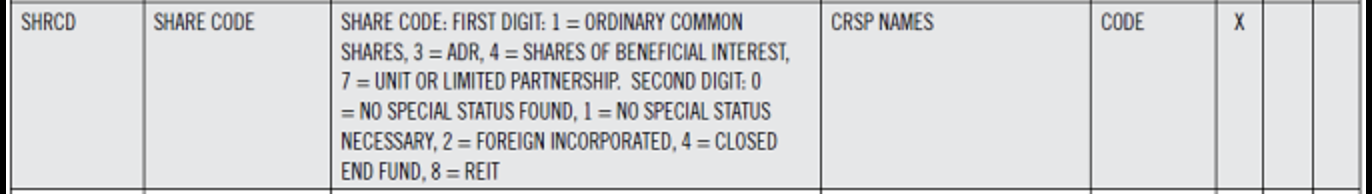

In [7]:
# Extract REIT-only permnos
reit_permnos = df_reit['permno'].unique()
reit_permnos

array([49904, 50681, 50585, 27511, 49146, 56821, 51027, 57023, 54324,
       55634, 51246, 54623, 20707, 66210, 53372, 54930, 62981, 52361,
       64653, 53058, 60150, 52214, 56610, 64274, 35553, 42140, 59628,
       64696, 52257, 59300, 66309, 66990, 92690, 65947, 88373, 68187,
       90545, 91847, 10952, 22091, 67598, 67854, 68021, 88461, 10836,
       11967, 12033, 67862, 68064, 68080, 68101, 68312, 68515, 68646,
       68750, 69059, 69665, 69788, 70383, 75040, 10978, 64426, 69147,
       70818, 71300, 72274, 72661, 75037, 75096, 61938, 11297, 75269,
       75341, 49322, 70340, 75114, 75362, 75284, 75474, 75893, 12275,
       75342, 75351, 75360, 75363, 75410, 75419, 75595, 75892, 76249,
       76480, 89317, 55029, 76602, 76767, 76821, 76824, 76826, 76827,
       76833, 76834, 77196, 76599, 76600, 76601, 76603, 76765, 76822,
       76825, 77193, 77194, 77195, 77239, 77057, 77129, 77857, 69702,
       77166, 78089, 67264, 77878, 78819, 78927, 78947, 79129, 79238,
       79324, 79534,

In [8]:
# Create REIT-only dataframe based on REIT permnos
df_reit = df_gkx.loc[df_gkx['permno'].isin(reit_permnos), :]
df_reit

DATE       RET  SHROUT    absacc       acc    aeavol   age  \
381204   19620831  0.016949     757       NaN       NaN       NaN   NaN   
381527   19620831  0.019737     458       NaN       NaN       NaN   NaN   
381528   19620831  0.040000     229       NaN       NaN       NaN   NaN   
383233   19620928 -0.133333     757       NaN       NaN       NaN   NaN   
383553   19620928 -0.096774     458       NaN       NaN       NaN   NaN   
...           ...       ...     ...       ...       ...       ...   ...   
4345390  20201231  0.068646  140297  0.007220 -0.007220 -0.585031  10.0   
4345398  20201231  0.048077  273700  0.022184 -0.022184 -0.421433  11.0   
4345442  20201231  0.038388  126029  0.005845  0.005845 -0.271839  11.0   
4345443  20201231  0.014843   68373  0.020063 -0.020063 -0.390236  10.0   
4345501  20201231 -0.066538  152145  0.033566 -0.033566 -0.455870  10.0   

              agr  baspread      beta    betasq  bm  bm_ia      cash  \
381204        NaN  0.015531       NaN       NaN NaN    NaN       NaN   
381527        NaN  0.021066       NaN       NaN NaN    NaN       NaN   
381528        NaN  0.012898       NaN       NaN NaN    NaN       NaN   
383233        NaN  0.008614       NaN       NaN NaN    NaN       NaN   
383553        NaN  0.018395       NaN       NaN NaN    NaN       NaN   
...           ...       ...       ...       ...  ..    ...       ...   
4345390 -0.351768  0.046948  2.211210  4.889449 NaN    NaN  0.081143   
4345398 -0.192123  0.039148  2.160608  4.668229 NaN    NaN  0.091653   
4345442  0.021064  0.041868  1.271738  1.617318 NaN    NaN  0.002468   
4345443 -0.173648  0.029610  0.844624  0.713390 NaN    NaN  0.033565   
4345501 -0.055960  0.042325  1.421378  2.020317 NaN    NaN  0.051513   

         cashdebt     cashpr       cfp    cfp_ia   chatoia    chcsho  \
381204        NaN        NaN       NaN       NaN       NaN       NaN   
381527        NaN        NaN       NaN       NaN       NaN       NaN   
381528        NaN        NaN       NaN       NaN       NaN       NaN   
383233        NaN        NaN       NaN       NaN       NaN       NaN   
383553        NaN        NaN       NaN       NaN       NaN       NaN   
...           ...        ...       ...       ...       ...       ...   
4345390  0.067258  -1.177669  0.097370  0.045291  0.234142  0.147048   
4345398       NaN -16.823500  0.264800  0.212721  0.253494  0.100167   
4345442       NaN  49.465483  0.074527  0.022448  0.252239 -0.003454   
4345443       NaN  17.666570  0.026005 -0.026074  0.237925  0.102255   
4345501       NaN  24.744203  0.049451 -0.002628  0.247284  0.002066   

          chempia  chinv     chmom    chpmia      chtx  cinvest  convind  \
381204        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
381527        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
381528        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
383233        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
383553        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
...           ...    ...       ...       ...       ...      ...      ...   
4345390       NaN    0.0  0.922582  2.451569  0.000000      0.0      1.0   
4345398       NaN    0.0  1.135039  2.827658 -0.000109      NaN      1.0   
4345442 -0.032326    0.0  0.191677  2.705699       NaN      NaN      0.0   
4345443  0.011152    0.0  0.247589  2.434161  0.000000      NaN      0.0   
4345501  0.083429    0.0  0.412465  2.441506  0.000000      NaN      0.0   

             currat  depr  divi  divo     dolvol        dy       ear  \
381204          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
381527          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
381528          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
383233          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
383553          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
...             ...   ...   ...   ...

In [9]:
# Create Non-REIT dataframe by exluding REIT permnos
df_nonreit = df_gkx.loc[df_gkx['permno'].isin(reit_permnos) == False, :]

## Describe differences between REITs and non-REITs

In [10]:
df_nonreit.describe()

DATE           RET        SHROUT        absacc           acc  \
count  4.270727e+06  4.270727e+06  4.270727e+06  2.474025e+06  2.474025e+06   
mean   1.990450e+07  1.085487e-02  4.474366e+04  9.097046e-02 -2.372230e-02   
std    1.994738e+05  1.749501e-01  2.332333e+05  9.979843e-02  1.278025e-01   
min    1.926013e+07 -1.988095e+00  0.000000e+00  0.000000e+00 -1.257607e+00   
25%    1.979113e+07 -6.060600e-02  2.482000e+03  2.959250e-02 -7.668333e-02   
50%    1.994023e+07  0.000000e+00  8.101000e+03  6.270916e-02 -2.160970e-02   
75%    2.005073e+07  6.582300e-02  2.710700e+04  1.148522e-01  4.293989e-02   
max    2.020123e+07  2.400000e+01  2.920640e+07  1.257607e+00  1.155264e+00   

             aeavol           age           agr      baspread          beta  \
count  2.366598e+06  2.976220e+06  2.739074e+06  4.270024e+06  3.870380e+06   
mean   8.300378e-01  1.179159e+01 -1.528150e-01  5.229295e-02  1.019612e+00   
std    2.047607e+00  1.069843e+01  4.166629e-01  7.133177e-02  6.375267e-01   
min   -1.000000e+00  1.000000e+00 -6.033304e+00 -4.294743e-01 -1.933264e+00   
25%   -2.454574e-01  4.000000e+00 -1.990952e-01  1.847524e-02  5.639983e-01   
50%    2.858102e-01  8.000000e+00 -7.297938e-02  3.162079e-02  9.545473e-01   
75%    1.141043e+00  1.700000e+01  1.789667e-02  5.721588e-02  1.389019e+00   
max    5.121570e+02  5.800000e+01  8.265002e-01  1.516084e+00  3.986823e+00   

             betasq            bm         bm_ia          cash      cashdebt  \
count  3.870380e+06  2.837143e+06  2.837143e+06  2.291072e+06  2.859208e+06   
mean   1.450420e+00  2.536741e+00 -5.955929e-01  1.633108e-01 -1.456725e-02   
std    1.701123e+00  2.635517e+01  2.531545e+01  2.090053e-01  2.105697e+01   
min    0.000000e+00 -4.868370e+01 -8.580376e+02 -1.431838e-01 -1.024800e+04   
25%    3.235362e-01  3.371402e-01 -3.943450e-01  2.402986e-02  1.271543e-02   
50%    9.146897e-01  6.447178e-01 -1.032386e-01  7.333640e-02  1.252538e-01   
75%    1.933075e+00  1.113269e+00  2.364079e-01  2.159470e-01  2.758191e-01   
max    1.589475e+01  2.191461e+03  1.687620e+03  9.786834e-01  4.256410e+01   

             cashpr           cfp        cfp_ia       chatoia        chcsho  \
count  2.929352e+06  2.660401e+06  2.660401e+06  2.492564e+06  2.735417e+06   
mean  -2.635925e-01  7.239632e-02 -1.005219e-01  3.944800e-04  1.088300e-01   
std    8.035956e+01  1.323962e+00  6.392760e+00  2.157301e-01  3.186683e-01   
min   -8.364906e+03 -2.368262e+02 -2.200972e+02 -1.314998e+00 -8.998305e-01   
25%   -8.227801e+00 -3.978593e-02 -1.341465e-01 -6.919035e-02  0.000000e+00   
50%   -5.593956e-01  4.841141e-02 -3.497514e-03  1.602277e-03  6.589436e-03   
75%    4.983967e+00  1.228703e-01  9.045811e-02  7.757029e-02  6.130790e-02   
max    1.139067e+04  1.146161e+02  3.594236e+02  2.659177e+00  7.208766e+00   

            chempia         chinv         chmom        chpmia          chtx  \
count  2.708227e+06  2.653678e+06  3.932047e+06  2.689889e+06  2.202947e+06   
mean  -1.142239e-01  1.226407e-02  1.988957e-03  6.213098e-02  9.326532e-04   
std    1.208016e+00  5.515537e-02  5.364944e-01  6.741418e+00  1.167508e-02   
min   -5.742108e+01 -3.003145e-01 -9.062534e+00 -1.631690e+02 -1.607357e-01   
25%   -1.760176e-01 -1.590394e-03 -2.348886e-01 -1.371390e-01 -1.363653e-03   
50%   -5.805613e-02  2.708672e-04 -4.872118e-03 -3.571388e-03  6.047580e-05   
75%    3.117928e-02  2.148098e-02  2.297227e-01  5.651566e-02  3.078642e-03   
max    6.628150e+01  3.991813e-01  8.814493e+00  1.576132e+02  1.765701e-01   

            cinvest       convind        currat          depr          divi  \
count  2.204671e+06  2.976220e+06  2.866290e+06  2.817232e+06  2.739117e+06   
mean   1.881629e-01  1.365951e-01  3.544105e+00  2.686248e-01  3.102058e-02   
std    2.397743e+01  3.434194e-01  9.972395e+00  4.971048e-01  1.733733e-01   
min   -2.833333e+03  0.000000e+00  1.418063e-03 -9.838288e-01  0.000000e+00   
25%   -2.966906e-02  0.000000e+00  1.217917e+00  9.636239e-0

In [11]:
df_reit.describe()

DATE           RET        SHROUT        absacc           acc  \
count  7.478100e+04  74781.000000  7.478100e+04  57265.000000  57265.000000   
mean   2.002333e+07      0.009941  6.125439e+04      0.047013     -0.028291   
std    1.198275e+05      0.111506  1.109049e+05      0.058109      0.063172   
min    1.962083e+07     -1.000000  7.300000e+01      0.000005     -0.712788   
25%    1.995013e+07     -0.033689  7.121000e+03      0.019659     -0.047970   
50%    2.003073e+07      0.007752  2.314400e+04      0.034942     -0.030814   
75%    2.013013e+07      0.051790  6.801000e+04      0.052738     -0.009868   
max    2.020123e+07      2.902777  1.456263e+06      0.784498      0.481374   

             aeavol           age           agr      baspread          beta  \
count  61696.000000  67223.000000  61994.000000  74775.000000  68660.000000   
mean       0.401829     11.809039     -0.173693      0.030024      0.737187   
std        1.487546     10.193850      0.436734      0.033938      0.522759   
min       -1.000000      1.000000     -5.798628      0.000000     -0.752928   
25%       -0.257952      4.000000     -0.229957      0.015474      0.369022   
50%        0.082343      9.000000     -0.055452      0.020839      0.631074   
75%        0.580860     17.000000      0.025646      0.032023      0.984509   
max       35.231884     57.000000      0.750000      1.000000      3.731348   

             betasq            bm         bm_ia          cash      cashdebt  \
count  6.866000e+04  58417.000000  58417.000000  61151.000000  29791.000000   
mean   8.175305e-01      0.951547     -1.299046      0.050437      0.325553   
std    1.191031e+00      2.054816     10.341276      0.098241      2.402901   
min    5.824185e-10     -8.101332   -387.914746      0.000000    -27.977908   
25%    1.377870e-01      0.409204     -0.659416      0.007813      0.006720   
50%    3.991178e-01      0.680239     -0.234390      0.020575      0.051282   
75%    9.694948e-01      1.051325      0.119430      0.049877      0.147042   
max    1.392296e+01     67.718725     65.532378      0.976943     42.564103   

             cashpr           cfp        cfp_ia       chatoia        chcsho  \
count  66997.000000  61652.000000  61652.000000  56853.000000  61948.000000   
mean       4.198636      0.098219     -0.041971     -0.008689      0.132547   
std      140.544527      0.243535      1.729680      0.198595      0.358868   
min    -3481.312227     -2.797329    -48.659188     -1.003966     -0.861255   
25%       -9.200061      0.052707     -0.031711     -0.055856      0.000000   
50%       -0.258942      0.083901      0.021578     -0.006510      0.011753   
75%       11.734471      0.131266      0.085088      0.033329      0.120578   
max     2624.706571      4.207094     31.208639      1.084560      4.171171   

            chempia         chinv         chmom        chpmia          chtx  \
count  52688.000000  60783.000000  69422.000000  61945.000000  58663.000000   
mean      -0.261462      0.001231     -0.000664     -0.299339      0.000118   
std        1.015390      0.019663      0.358247      6.188281      0.004879   
min      -41.679126     -0.216083     -5.264719   -163.169022     -0.083959   
25%       -0.420229      0.000000     -0.171348     -0.968966      0.000000   
50%       -0.145092      0.000000     -0.009228     -0.045368      0.000000   
75%       -0.028445      0.000000      0.155521      0.437848      0.000000   
max       12.993296      0.229783      6.150533     77.954287      0.138563   

            cinvest       convind        currat          depr          divi  \
count  25475.000000  67223.000000  50701.000000  12491.000000  61994.000000   
mean       0.504012      0.139134     18.867593      0.222803      0.022986   
std       28.954788      0.346089     55.343542      0.597401      0.149860   
min     -865.666667      0.000000      0.012968      0.000000      0.000000   
25%       -0.000017      0.000000      1.195933      0.04189

### Plot boxplots of RET, bm, ep, mom1m, turn

In [12]:
df_reit.dtypes

DATE                 int64
RET                float64
SHROUT               int64
absacc             float64
acc                float64
aeavol             float64
age                float64
agr                float64
baspread           float64
beta               float64
betasq             float64
bm                 float64
bm_ia              float64
cash               float64
cashdebt           float64
cashpr             float64
cfp                float64
cfp_ia             float64
chatoia            float64
chcsho             float64
chempia            float64
chinv              float64
chmom              float64
chpmia             float64
chtx               float64
cinvest            float64
convind            float64
currat             float64
depr               float64
divi               float64
divo               float64
dolvol             float64
dy                 float64
ear                float64
egr                float64
ep                 float64
gma                float64
g

In [13]:
# Comparison of features missing values, non-REITs vs REITs
# in percentage, rounded to 2 decimal points
pd.DataFrame(
    zip(
        round(df_nonreit.isnull().sum()/len(df_nonreit)*100,2), 
        round(df_reit.isnull().sum()/len(df_reit)*100,2)
    ),
    columns = ['Non-REITs', 'REITs-only'],
    index = df_gkx.columns
).sort_values('REITs-only', ascending = False)

Non-REITs  REITs-only
realestate           75.36       92.99
stdacc               63.18       92.25
stdcf                63.18       92.25
pchsaleinv           50.27       90.20
pchsale_pchinvt      49.71       89.53
saleinv              45.54       88.89
orgcap               51.50       88.44
pchdepr              39.56       84.95
depr                 34.03       83.30
grcapx               43.83       81.73
pchcapx_ia           38.42       80.63
grltnoa              51.59       77.01
pchsale_pchxsga      47.32       74.14
cinvest              48.38       65.93
tang                 33.90       64.31
invest               38.56       61.38
cashdebt             33.05       60.16
pchquick             39.13       39.23
pchcurrat            38.43       39.12
roavol               53.45       33.31
quick                33.55       32.30
currat               32.89       32.20
pchsale_pchrect      39.04       31.86
hire                 36.59       29.54
chempia              36.59       29.54
rd_sale              68.08       27.42
rd_mve               67.51       27.38
secured              64.37       25.89
salerec              33.21       25.14
chatoia              41.64       23.97
pctacc               42.07       23.42
absacc               42.07       23.42
acc                  42.07       23.42
mom36m               23.15       22.19
bm_ia                33.57       21.88
bm                   33.57       21.88
chtx                 48.42       21.55
operprof             38.68       20.86
ms                   45.42       19.54
chinv                37.86       18.72
cash                 46.35       18.23
roaq                 45.85       18.12
rsup                 45.37       17.81
roeq                 44.43       17.70
cfp_ia               37.71       17.56
cfp                  37.71       17.56
aeavol               44.59       17.50
ear                  43.94       17.43
nincr                43.88       17.42
egr                  36.52       17.16
chcsho               35.95       17.16
chpmia               37.02       17.16
pchgm_pchsale        36.90       17.13
sgr                  36.88       17.13
lgr                  36.22       17.10
rd                   35.86       17.10
divi                 35.86       17.10
divo                 35.86       17.10
agr                  35.86       17.10
gma                  36.02       17.10
ps                   35.86       17.10
tb                   38.54       16.37
dy                   30.61       11.58
cashpr               31.41       10.41
salecash             31.20       10.38
roic                 33.71       10.17
lev                  30.70       10.14
mve_ia               30.38       10.14
sp                   30.56       10.14
ep                   30.38       10.14
convind              30.31       10.11
herf                 30.31       10.11
sin                  30.31       10.11
age                  30.31       10.11
securedind           30.31       10.11
betasq                9.37        8.19
idiovol               9.37        8.19
pricedelay            9.38        8.19
beta                  9.37        8.19
mom12m                7.93        7.17
chmom                 7.93        7.17
mom6m                 3.65        3.26
turn                  8.18        2.76
dolvol                8.29        2.57
std_dolvol            7.51        1.71
ill                   7.27        1.61
zerotrade             7.29        1.58
std_turn              7.15        1.56
sic2                 12.87        1.12
mom1m                 0.74        0.65
prc                   0.47        0.32
mve0                  0.47        0.32
retvol                0.09        0.07
mvel1                 0.09        0.05
maxret                0.03        0.01
baspread              0.02        0.01
permno                0.00        0.00
RET                   0.00        0.00
indmom                0.14        0.00
SHROUT                0.00        0.00
DATE                  0.00        0.00

Quite a bit of differences between REITs and non-REITS.  In general REITs are better than the regular stock market in producing accounting features, except for about 10 of them:
- realestate (93% missing)
- stdacc (92% missing)
- stdcf (92% missing)
- pchsaleinv (90% missing)
- pchsale_pchinvt (90%)
- saleinv (89%)
- orgcap (88%)
- pchdepr (85%)
- depr (83%)
- grcapx (82%)
- pchcapx_ia (80% missing)
- grltnoa (77%)
- pchsale_pchxsga (74%)
- cinvest (66%)
- tang (64%)
- invest (61%)
- cashdebt (60%)
- pchquick	(39%)
- pchcurrat	(39%)

In [14]:
df_gkx.sic2.nunique(), df_gkx.sic2.unique()

(74,
 array([nan, 38., 28., 37., 51., 34., 78., 20., 33., 45., 36., 22., 53.,
        65., 50., 24., 13., 35., 61., 99., 59., 31., 30., 56., 25., 23.,
        27., 48., 63., 42., 29., 21., 39., 73., 32., 47., 10., 67., 54.,
        16., 12., 14., 26.,  1., 52., 72., 58., 60., 62., 70., 49., 79.,
        40., 57., 44., 80., 87., 15., 75., 64., 55., 17.,  7., 82., 76.,
         8.,  2., 41., 84., 83., 46., 89., 81.,  9., 86.]))

In [15]:
df_reit.sic2.nunique(), df_reit.sic2.unique()

(18,
 array([67., nan, 24., 76., 79., 65., 70., 61., 60., 99., 38., 15., 30.,
        73., 80., 58., 62., 63., 28.]))

In [16]:
df_reit.DATE.nunique()

701

In [17]:
df_reit.permno.nunique()

473

- Import risk free rate
- ~Import Welch and Goyal~
- Create 18 SIC dummies
- Remove non-relevant features, e.g. gvkey, shrcd

## Download Fama French and risk-free rates

In [18]:
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
# Download the file and save it
# We will name it fama_french.zip file
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
# Next we extact the file data
# We will call it ff_factors.csv
zip_file.extractall()
# Make sure you close the file after extraction
zip_file.close()
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3,)
print(ff_factors.head())

  Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.38     -2.73      0.22
1     192608      2.64     -1.47      4.14      0.25
2     192609      0.36     -1.39      0.12      0.23
3     192610     -3.24     -0.13      0.65      0.32
4     192611      2.53     -0.16     -0.38      0.31


In [19]:
ff_factors.tail(100)

Unnamed: 0    Mkt-RF       SMB       HML  \
1140                              202107      1.27     -3.96     -1.75   
1141                              202108      2.90     -0.48     -0.13   
1142                              202109     -4.37      0.80      5.09   
1143   Annual Factors: January-December        NaN       NaN       NaN   
1144                                 NaN    Mkt-RF       SMB       HML   
1145                                1927     29.47     -2.83     -3.40   
1146                                1928     35.39      4.51     -6.17   
1147                                1929    -19.54    -30.69     11.65   
1148                                1930    -31.23     -5.34    -11.76   
1149                                1931    -45.11      3.64    -14.56   
1150                                1932     -9.39      4.56     10.83   
1151                                1933     57.05     45.46     32.39   
1152                                1934      3.02     25.60    -27.96   
1153                                1935     44.96     10.91      8.74   
1154                                1936     32.07     17.97     34.83   
1155                                1937    -34.96    -14.14     -4.09   
1156                                1938     28.48      9.29    -12.05   
1157                                1939      2.70      5.77    -18.98   
1158                                1940     -7.14      1.18     -1.60   
1159                                1941    -10.53     -4.04     11.13   
1160                                1942     16.20      5.09     19.96   
1161                                1943     27.96     33.29     38.47   
1162                                1944     20.97     17.53     16.46   
1163                                1945     38.38     25.14     10.88   
1164                                1946     -6.73     -3.99      3.11   
1165                                1947      2.95     -6.99      9.87   
1166                                1948      1.07     -9.11      3.74   
1167                                1949     19.12      3.75     -4.24   
1168                                1950     28.82      1.13     27.04   
1169                                1951     19.22     -5.22     -5.67   
1170                                1952     11.80     -6.76      3.31   
1171                                1953     -1.05     -1.16     -7.73   
1172                                1954     49.35     -2.06     26.04   
1173                                1955     23.75     -5.91      4.90   
1174                                1956      5.90     -0.90     -1.84   
1175                                1957    -13.16     -2.70     -6.18   
1176                                1958     43.45     14.51     13.48   
1177                                1959      9.76      5.46      1.78   
1178                                1960     -1.46     -2.72     -4.55   
1179                                1961     24.81      1.51      5.14   
1180                                1962    -12.90     -8.34      9.02   
1181                                1963     17.84     -6.06     15.45   
1182                                1964     12.54     -0.76      9.65   
1183                                1965     10.52     22.05      6.95   
1184                                1966    -13.51      2.93     -1.14   
1185                                1967     24.49     49.63     -7.30   
1186                                1968      8.79     24.17     18.49   
1187                                1969    -17.54    -14.12     -9.95   
1188                                1970     -6.49    -11.76     21.54   
1189                                1971     11.78      5.98    -11.26   
1190                                1972     13.05    -12.26      1.76   
1191                                1973    -26.18    -23.45     17.47   
1192                                1974    -35.75     -0.72      9.87   
1193                              

Remove Rows 1143 onwards

In [20]:
# Remove rows after 1143
ff_factors = ff_factors[:1143]

In [21]:
# Check
ff_factors.tail()

Unnamed: 0    Mkt-RF       SMB       HML        RF
1138     202105      0.29     -0.28      7.04      0.00
1139     202106      2.75      1.80     -7.76      0.00
1140     202107      1.27     -3.96     -1.75      0.00
1141     202108      2.90     -0.48     -0.13      0.00
1142     202109     -4.37      0.80      5.09      0.00

In [22]:
# Change column name
ff_factors.rename(columns={'Unnamed: 0':'date'}, inplace = True)
# Change ff_factors['date'] to datetime
ff_factors['date'] = pd.to_datetime(ff_factors['date'], format = "%Y%m")
# Check
ff_factors

date    Mkt-RF       SMB       HML        RF
0    1926-07-01      2.96     -2.38     -2.73      0.22
1    1926-08-01      2.64     -1.47      4.14      0.25
2    1926-09-01      0.36     -1.39      0.12      0.23
3    1926-10-01     -3.24     -0.13      0.65      0.32
4    1926-11-01      2.53     -0.16     -0.38      0.31
...         ...       ...       ...       ...       ...
1138 2021-05-01      0.29     -0.28      7.04      0.00
1139 2021-06-01      2.75      1.80     -7.76      0.00
1140 2021-07-01      1.27     -3.96     -1.75      0.00
1141 2021-08-01      2.90     -0.48     -0.13      0.00
1142 2021-09-01     -4.37      0.80      5.09      0.00

[1143 rows x 5 columns]

Oops...dates are set to start of month, whereas df_reit and df_gkx are set to month-end.

In [23]:
# Set date to month-end
ff_factors['date'] = ff_factors['date'] + pd.offsets.MonthEnd(0)
ff_factors

date    Mkt-RF       SMB       HML        RF
0    1926-07-31      2.96     -2.38     -2.73      0.22
1    1926-08-31      2.64     -1.47      4.14      0.25
2    1926-09-30      0.36     -1.39      0.12      0.23
3    1926-10-31     -3.24     -0.13      0.65      0.32
4    1926-11-30      2.53     -0.16     -0.38      0.31
...         ...       ...       ...       ...       ...
1138 2021-05-31      0.29     -0.28      7.04      0.00
1139 2021-06-30      2.75      1.80     -7.76      0.00
1140 2021-07-31      1.27     -3.96     -1.75      0.00
1141 2021-08-31      2.90     -0.48     -0.13      0.00
1142 2021-09-30     -4.37      0.80      5.09      0.00

[1143 rows x 5 columns]

In [24]:
ff_factors.dtypes

date      datetime64[ns]
Mkt-RF            object
SMB               object
HML               object
RF                object
dtype: object

In [25]:
# Convert variables to float, then divide by 100 to decimals
ff_factors['Mkt-RF'] = ff_factors['Mkt-RF'].astype(float) / 100
ff_factors['SMB'] = ff_factors['SMB'].astype(float)  / 100
ff_factors['HML'] = ff_factors['HML'].astype(float)  / 100
ff_factors['RF'] = ff_factors['RF'].astype(float)  / 100

# Check
ff_factors

date  Mkt-RF     SMB     HML      RF
0    1926-07-31  0.0296 -0.0238 -0.0273  0.0022
1    1926-08-31  0.0264 -0.0147  0.0414  0.0025
2    1926-09-30  0.0036 -0.0139  0.0012  0.0023
3    1926-10-31 -0.0324 -0.0013  0.0065  0.0032
4    1926-11-30  0.0253 -0.0016 -0.0038  0.0031
...         ...     ...     ...     ...     ...
1138 2021-05-31  0.0029 -0.0028  0.0704  0.0000
1139 2021-06-30  0.0275  0.0180 -0.0776  0.0000
1140 2021-07-31  0.0127 -0.0396 -0.0175  0.0000
1141 2021-08-31  0.0290 -0.0048 -0.0013  0.0000
1142 2021-09-30 -0.0437  0.0080  0.0509  0.0000

[1143 rows x 5 columns]

In [26]:
# For pd.merge to work, reset date to month-end, as some months (say, 2020-10-30) end on 
#  the last business day instead of the last calendar day
df_reit['DATE'] = pd.to_datetime(df_reit["DATE"], format = "%Y%m%d") + pd.offsets.MonthEnd(0)
df_gkx['DATE'] = pd.to_datetime(df_gkx["DATE"], format = "%Y%m%d") + pd.offsets.MonthEnd(0)
display(df_reit, df_gkx)

/Users/lijunandkahshin/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


DATE       RET  SHROUT    absacc       acc    aeavol   age  \
381204  1962-08-31  0.016949     757       NaN       NaN       NaN   NaN   
381527  1962-08-31  0.019737     458       NaN       NaN       NaN   NaN   
381528  1962-08-31  0.040000     229       NaN       NaN       NaN   NaN   
383233  1962-09-30 -0.133333     757       NaN       NaN       NaN   NaN   
383553  1962-09-30 -0.096774     458       NaN       NaN       NaN   NaN   
...            ...       ...     ...       ...       ...       ...   ...   
4345390 2020-12-31  0.068646  140297  0.007220 -0.007220 -0.585031  10.0   
4345398 2020-12-31  0.048077  273700  0.022184 -0.022184 -0.421433  11.0   
4345442 2020-12-31  0.038388  126029  0.005845  0.005845 -0.271839  11.0   
4345443 2020-12-31  0.014843   68373  0.020063 -0.020063 -0.390236  10.0   
4345501 2020-12-31 -0.066538  152145  0.033566 -0.033566 -0.455870  10.0   

              agr  baspread      beta    betasq  bm  bm_ia      cash  \
381204        NaN  0.015531       NaN       NaN NaN    NaN       NaN   
381527        NaN  0.021066       NaN       NaN NaN    NaN       NaN   
381528        NaN  0.012898       NaN       NaN NaN    NaN       NaN   
383233        NaN  0.008614       NaN       NaN NaN    NaN       NaN   
383553        NaN  0.018395       NaN       NaN NaN    NaN       NaN   
...           ...       ...       ...       ...  ..    ...       ...   
4345390 -0.351768  0.046948  2.211210  4.889449 NaN    NaN  0.081143   
4345398 -0.192123  0.039148  2.160608  4.668229 NaN    NaN  0.091653   
4345442  0.021064  0.041868  1.271738  1.617318 NaN    NaN  0.002468   
4345443 -0.173648  0.029610  0.844624  0.713390 NaN    NaN  0.033565   
4345501 -0.055960  0.042325  1.421378  2.020317 NaN    NaN  0.051513   

         cashdebt     cashpr       cfp    cfp_ia   chatoia    chcsho  \
381204        NaN        NaN       NaN       NaN       NaN       NaN   
381527        NaN        NaN       NaN       NaN       NaN       NaN   
381528        NaN        NaN       NaN       NaN       NaN       NaN   
383233        NaN        NaN       NaN       NaN       NaN       NaN   
383553        NaN        NaN       NaN       NaN       NaN       NaN   
...           ...        ...       ...       ...       ...       ...   
4345390  0.067258  -1.177669  0.097370  0.045291  0.234142  0.147048   
4345398       NaN -16.823500  0.264800  0.212721  0.253494  0.100167   
4345442       NaN  49.465483  0.074527  0.022448  0.252239 -0.003454   
4345443       NaN  17.666570  0.026005 -0.026074  0.237925  0.102255   
4345501       NaN  24.744203  0.049451 -0.002628  0.247284  0.002066   

          chempia  chinv     chmom    chpmia      chtx  cinvest  convind  \
381204        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
381527        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
381528        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
383233        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
383553        NaN    NaN       NaN       NaN       NaN      NaN      NaN   
...           ...    ...       ...       ...       ...      ...      ...   
4345390       NaN    0.0  0.922582  2.451569  0.000000      0.0      1.0   
4345398       NaN    0.0  1.135039  2.827658 -0.000109      NaN      1.0   
4345442 -0.032326    0.0  0.191677  2.705699       NaN      NaN      0.0   
4345443  0.011152    0.0  0.247589  2.434161  0.000000      NaN      0.0   
4345501  0.083429    0.0  0.412465  2.441506  0.000000      NaN      0.0   

             currat  depr  divi  divo     dolvol        dy       ear  \
381204          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
381527          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
381528          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
383233          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
383553          NaN   NaN   NaN   NaN        NaN       NaN       NaN   
...             ...   ... 

DATE       RET  SHROUT    absacc       acc    aeavol   age  \
0       1926-01-31  0.032732     600       NaN       NaN       NaN   NaN   
1       1926-01-31  0.017857     200       NaN       NaN       NaN   NaN   
2       1926-01-31  0.161667     156       NaN       NaN       NaN   NaN   
3       1926-01-31  0.141892     250       NaN       NaN       NaN   NaN   
4       1926-01-31 -0.035714     500       NaN       NaN       NaN   NaN   
...            ...       ...     ...       ...       ...       ...   ...   
4345503 2020-12-31  0.109665   84977  0.085746 -0.085746  0.285395  35.0   
4345504 2020-12-31  0.076239   12552  0.025098 -0.025098  0.046616  10.0   
4345505 2020-12-31  0.135851   36938  0.022565 -0.022565  0.365427  10.0   
4345506 2020-12-31  0.122605   33482  0.215401 -0.215401  1.784287  10.0   
4345507 2020-12-31  0.243252  947901  0.102016 -0.102016  0.006117  10.0   

              agr  baspread      beta    betasq  bm  bm_ia      cash  \
0             NaN  0.006857       NaN       NaN NaN    NaN       NaN   
1             NaN  0.018018       NaN       NaN NaN    NaN       NaN   
2             NaN  0.004158       NaN       NaN NaN    NaN       NaN   
3             NaN  0.006780       NaN       NaN NaN    NaN       NaN   
4             NaN  0.071795       NaN       NaN NaN    NaN       NaN   
...           ...       ...       ...       ...  ..    ...       ...   
4345503 -0.145079  0.060029  1.921340  3.691548 NaN    NaN  0.008385   
4345504 -0.134903  0.035050  1.301940  1.695047 NaN    NaN  0.226784   
4345505 -0.153766  0.029388  0.847169  0.717695 NaN    NaN  0.349677   
4345506 -0.062402  0.051558  0.389812  0.151954 NaN    NaN  0.050513   
4345507 -0.153646  0.047931  1.349505  1.821163 NaN    NaN  0.222094   

         cashdebt     cashpr       cfp    cfp_ia   chatoia    chcsho  \
0             NaN        NaN       NaN       NaN       NaN       NaN   
1             NaN        NaN       NaN       NaN       NaN       NaN   
2             NaN        NaN       NaN       NaN       NaN       NaN   
3             NaN        NaN       NaN       NaN       NaN       NaN   
4             NaN        NaN       NaN       NaN       NaN       NaN   
...           ...        ...       ...       ...       ...       ...   
4345503  0.104231  19.464647  0.107541  0.013794 -0.013714  0.008004   
4345504  0.287272   1.095352  0.067275  0.100594 -0.095026  0.003637   
4345505  0.408222   1.446073  0.080546  0.113864  0.095853  0.011171   
4345506 -0.101122 -13.505851  0.242402  0.233455  0.190875  0.367046   
4345507  0.050176   8.295322  0.031763 -0.071347  0.083907  0.048649   

          chempia     chinv     chmom    chpmia      chtx   cinvest  convind  \
0             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
1             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN      NaN   
...           ...       ...       ...       ...       ...       ...      ...   
4345503 -0.138167  0.001545  0.798194  0.335792  0.000957  0.010704      0.0   
4345504 -0.101061  0.013358  0.551929 -0.555954 -0.004501 -0.013873      0.0   
4345505  0.078991  0.030661  0.011311 -0.540223 -0.000443 -0.011094      0.0   
4345506  0.405385  0.076563  0.282874 -0.001657  0.000405  0.003124      0.0   
4345507 -0.042816  0.013694  0.868039 -0.673164 -0.000722  0.001210      1.0   

           currat      depr  divi  divo     dolvol        dy       ear  \
0             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
1             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
2             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
3             NaN       NaN   NaN   NaN        NaN       NaN       NaN   
4             NaN       NaN   NaN   NaN 

In [27]:
# Merge risk-free rate to df_reit and df_gkx
df_reit = pd.merge(
    left = df_reit,
    right = ff_factors[['date','RF']],
    how = 'left',
    left_on = 'DATE',
    right_on = 'date'
).drop(columns=('date'))

df_gkx = pd.merge(
    left = df_gkx,
    right = ff_factors[['date','RF']],
    how = 'left',
    left_on = 'DATE',
    right_on = 'date'
).drop(columns=('date'))

df_reit.shape, df_gkx.shape

((74781, 102), (4345508, 102))

## ~Merge with Welch and Goyal (2008) data~

Skip this stage as these macro factors are insignificant according to GKX (2020)

In [28]:
# # Import Welch and Goyal (2008) macroeconomic time series
# df_macro = pd.read_excel('../data/goyal_PredictorData2020.xlsx')
# df_macro

In [29]:
# df_macro.dtypes

In [30]:
# # Change df_macro['yyyymm'] to datetime, and set it to month-end
# df_macro['yyyymm'] = pd.to_datetime(df_macro['yyyymm'], format = "%Y%m") + pd.offsets.MonthEnd(0)
# df_macro

In [31]:
# # Create term spread 'tms', which is 'lty' minus 'tbl'
# df_macro['tms'] = df_macro['lty'] - df_macro['tbl']

# # Create default spread 'dfy', which is 'BAA' minus 'AAA'
# df_macro['dfy'] = df_macro['BAA'] - df_macro['AAA']

# # Only retain Goyal's 8 macroeconomic variables per GKX (2020), then merge
# to_retain = ['yyyymm','D12','E12','b/m','ntis','tbl','tms','dfy','svar']

# # Merge Goyal variables to df_reit
# df_reit = pd.merge(
#     left = df_reit,
#     right = df_macro[to_retain],
#     how = 'left',
#     left_on = 'DATE',
#     right_on = 'yyyymm'
# ).drop(columns=('yyyymm'))

# df_reit

In [32]:
# df_macro

## Create monthly returns excess of risk-free rate

In [33]:
# Minus risk free rate (RF) from returns (RET)
df_reit['RET'] = df_reit['RET'] - df_reit['RF']
df_gkx['RET'] = df_gkx['RET'] - df_gkx['RF']

## Drop unnecessary columns

In [34]:
df_reit.dtypes

DATE               datetime64[ns]
RET                       float64
SHROUT                      int64
absacc                    float64
acc                       float64
aeavol                    float64
age                       float64
agr                       float64
baspread                  float64
beta                      float64
betasq                    float64
bm                        float64
bm_ia                     float64
cash                      float64
cashdebt                  float64
cashpr                    float64
cfp                       float64
cfp_ia                    float64
chatoia                   float64
chcsho                    float64
chempia                   float64
chinv                     float64
chmom                     float64
chpmia                    float64
chtx                      float64
cinvest                   float64
convind                   float64
currat                    float64
depr                      float64
divi          

In [35]:
# Drop unnecessary columns
to_drop = ['SHROUT', 'prc', 'mvel1', 'RF', 'permno']
# to_drop = ['SHROUT', 'prc', 'mvel1', 'RF']

df_reit = df_reit.drop(columns = to_drop)
df_gkx = df_gkx.drop(columns = to_drop)
df_reit

DATE       RET    absacc       acc    aeavol   age       agr  \
0     1962-08-31  0.014649       NaN       NaN       NaN   NaN       NaN   
1     1962-08-31  0.017437       NaN       NaN       NaN   NaN       NaN   
2     1962-08-31  0.037700       NaN       NaN       NaN   NaN       NaN   
3     1962-09-30 -0.135433       NaN       NaN       NaN   NaN       NaN   
4     1962-09-30 -0.098874       NaN       NaN       NaN   NaN       NaN   
...          ...       ...       ...       ...       ...   ...       ...   
74776 2020-12-31  0.068546  0.007220 -0.007220 -0.585031  10.0 -0.351768   
74777 2020-12-31  0.047977  0.022184 -0.022184 -0.421433  11.0 -0.192123   
74778 2020-12-31  0.038288  0.005845  0.005845 -0.271839  11.0  0.021064   
74779 2020-12-31  0.014743  0.020063 -0.020063 -0.390236  10.0 -0.173648   
74780 2020-12-31 -0.066638  0.033566 -0.033566 -0.455870  10.0 -0.055960   

       baspread      beta    betasq  bm  bm_ia      cash  cashdebt     cashpr  \
0      0.015531       NaN       NaN NaN    NaN       NaN       NaN        NaN   
1      0.021066       NaN       NaN NaN    NaN       NaN       NaN        NaN   
2      0.012898       NaN       NaN NaN    NaN       NaN       NaN        NaN   
3      0.008614       NaN       NaN NaN    NaN       NaN       NaN        NaN   
4      0.018395       NaN       NaN NaN    NaN       NaN       NaN        NaN   
...         ...       ...       ...  ..    ...       ...       ...        ...   
74776  0.046948  2.211210  4.889449 NaN    NaN  0.081143  0.067258  -1.177669   
74777  0.039148  2.160608  4.668229 NaN    NaN  0.091653       NaN -16.823500   
74778  0.041868  1.271738  1.617318 NaN    NaN  0.002468       NaN  49.465483   
74779  0.029610  0.844624  0.713390 NaN    NaN  0.033565       NaN  17.666570   
74780  0.042325  1.421378  2.020317 NaN    NaN  0.051513       NaN  24.744203   

            cfp    cfp_ia   chatoia    chcsho   chempia  chinv     chmom  \
0           NaN       NaN       NaN       NaN       NaN    NaN       NaN   
1           NaN       NaN       NaN       NaN       NaN    NaN       NaN   
2           NaN       NaN       NaN       NaN       NaN    NaN       NaN   
3           NaN       NaN       NaN       NaN       NaN    NaN       NaN   
4           NaN       NaN       NaN       NaN       NaN    NaN       NaN   
...         ...       ...       ...       ...       ...    ...       ...   
74776  0.097370  0.045291  0.234142  0.147048       NaN    0.0  0.922582   
74777  0.264800  0.212721  0.253494  0.100167       NaN    0.0  1.135039   
74778  0.074527  0.022448  0.252239 -0.003454 -0.032326    0.0  0.191677   
74779  0.026005 -0.026074  0.237925  0.102255  0.011152    0.0  0.247589   
74780  0.049451 -0.002628  0.247284  0.002066  0.083429    0.0  0.412465   

         chpmia      chtx  cinvest  convind      currat  depr  divi  divo  \
0           NaN       NaN      NaN      NaN         NaN   NaN   NaN   NaN   
1           NaN       NaN      NaN      NaN         NaN   NaN   NaN   NaN   
2           NaN       NaN      NaN      NaN         NaN   NaN   NaN   NaN   
3           NaN       NaN      NaN      NaN         NaN   NaN   NaN   NaN   
4           NaN       NaN      NaN      NaN         NaN   NaN   NaN   NaN   
...         ...       ...      ...      ...         ...   ...   ...   ...   
74776  2.451569  0.000000      0.0      1.0  248.969337   NaN   0.0   0.0   
74777  2.827658 -0.000109      NaN      1.0         NaN   NaN   0.0   0.0   
74778  2.705699       NaN      NaN      0.0    1.487114   NaN   0.0   0.0   
74779  2.434161  0.000000      NaN      0.0    5.767630   NaN   0.0   0.0   
74780  2.441506  0.000000      NaN      0.0    1.280017   NaN   0.0   0.0   

          dolvol        dy       ear       egr        ep       gma  grcapx  \
0            NaN       NaN       NaN       NaN       NaN       NaN     NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN     NaN   
2            NaN       NaN       NaN       NaN       N

In [36]:
df_reit.columns

Index(['DATE', 'RET', 'absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread',
       'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chmom', 'chpmia',
       'chtx', 'cinvest', 'convind', 'currat', 'depr', 'divi', 'divo',
       'dolvol', 'dy', 'ear', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf',
       'hire', 'idiovol', 'ill', 'indmom', 'invest', 'lev', 'lgr', 'maxret',
       'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve0', 'mve_ia', 'nincr',
       'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr',
       'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect',
       'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay', 'ps', 'quick',
       'rd', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq', 'roavol',
       'roeq', 'roic', 'rsup', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sic2', 'sin', 'sp', 'std_dolvol', 'std_turn',
       'stdacc', 's

In [37]:
# To standard scale
cont_var = ['absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread',
       'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chmom', 'chpmia',
       'chtx', 'cinvest', 'currat', 'depr',
       'dolvol', 'dy', 'ear', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf',
       'hire', 'idiovol', 'ill', 'indmom', 'invest', 'lev', 'lgr', 'maxret',
       'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve0', 'mve_ia',
       'nincr', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr',
       'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect',
       'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay',  'ps',
       'quick', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq',
       'roavol', 'roeq', 'roic', 'rsup', 'salecash', 'saleinv', 'salerec',
       'secured', 'sgr', 'sp', 'std_dolvol',
       'std_turn', 'stdacc', 'stdcf', 'tang', 'tb', 'turn', 'zerotrade'] 

nom_var = ['convind', 'divi', 'divo', 'rd', 'securedind', 'sin']

# To dummify
to_dummify = ['DATE', 'permno', 'sic2']

# To leave untouched - Goyal's macro variables
# untouch_var = ['convind', 'divi', 'divo', 'rd', 'securedind', 'sin', ## binary
#              'D12', 'E12', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar'] ## macro

In [38]:
len(cont_var) + len(nom_var)

94

In [39]:
# Confirm binary indicators
df_reit.loc[:,df_reit.max() == 1]

baspread  convind  divi  divo      herf   rd  securedind  sin
0      0.015531      NaN   NaN   NaN       NaN  NaN         NaN  NaN
1      0.021066      NaN   NaN   NaN       NaN  NaN         NaN  NaN
2      0.012898      NaN   NaN   NaN       NaN  NaN         NaN  NaN
3      0.008614      NaN   NaN   NaN       NaN  NaN         NaN  NaN
4      0.018395      NaN   NaN   NaN       NaN  NaN         NaN  NaN
...         ...      ...   ...   ...       ...  ...         ...  ...
74776  0.046948      1.0   0.0   0.0  0.010813  0.0         1.0  0.0
74777  0.039148      1.0   0.0   0.0  0.010813  0.0         1.0  0.0
74778  0.041868      0.0   0.0   0.0  0.010813  0.0         1.0  0.0
74779  0.029610      0.0   0.0   0.0  0.010813  0.0         1.0  0.0
74780  0.042325      0.0   0.0   0.0  0.010813  0.0         1.0  0.0

[74781 rows x 8 columns]

## Data preprocessing

### Fill NAs
For missing features, I replace with the cross-sectional median at each month for each stock, respectively. 


In [40]:
%%time
# Group by date first, then fill NaN values with median
for i in cont_var:
    df_reit[i] = df_reit.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))
    df_gkx[i] = df_gkx.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))

CPU times: user 51 s, sys: 2.26 s, total: 53.2 s
Wall time: 53.7 s


In [41]:
# Comparison of features missing values, non-REITs vs REITs
# in percentage, rounded to 2 decimal points
pd.DataFrame(
    zip(
        round(df_gkx.isnull().sum()/len(df_gkx)*100,2), 
        round(df_reit.isnull().sum()/len(df_reit)*100,2)
    ),
    columns = ['All', 'REITs-only'],
    index = df_gkx.columns
).sort_values('REITs-only', ascending = False)

All  REITs-only
divi             35.54       17.10
rd               35.54       17.10
divo             35.54       17.10
securedind       29.96       10.11
convind          29.96       10.11
sin              29.96       10.11
realestate       32.39        8.31
secured          26.17        5.91
bm               11.12        4.88
bm_ia            11.12        4.88
orgcap            9.99        4.76
stdcf            17.86        2.83
stdacc           17.86        2.83
cinvest          14.63        2.64
chtx             14.93        1.76
cash             14.57        1.62
roavol           14.63        1.43
roaq             14.63        1.23
sic2             12.67        1.12
nincr            14.45        1.00
ms               14.45        1.00
ear              14.45        1.00
rsup             14.45        1.00
roeq             14.45        1.00
aeavol           14.45        1.00
rd_mve            7.96        0.74
rd_sale           7.96        0.74
grltnoa           9.26        0.50
absacc            9.26        0.50
acc               9.26        0.50
pctacc            9.26        0.50
cfp               8.71        0.42
cfp_ia            8.71        0.42
egr               9.26        0.36
operprof          8.97        0.29
roic              8.71        0.29
chatoia           8.55        0.23
grcapx            8.55        0.23
pchquick          8.24        0.16
pchgm_pchsale     8.24        0.16
pchdepr           8.24        0.16
pchcurrat         8.24        0.16
sgr               8.24        0.16
pchsale_pchinvt   8.24        0.16
pchcapx_ia        8.24        0.16
pchsale_pchxsga   8.24        0.16
pchsaleinv        8.24        0.16
ps                8.24        0.16
pchsale_pchrect   8.24        0.16
invest            8.24        0.16
agr               8.24        0.16
lgr               8.24        0.16
chcsho            8.24        0.16
chempia           8.24        0.16
hire              8.24        0.16
chinv             8.24        0.16
gma               8.24        0.16
chpmia            8.24        0.16
mom36m            0.45        0.16
currat            7.79        0.10
salerec           7.79        0.10
salecash          7.79        0.10
cashdebt          7.79        0.10
cashpr            7.79        0.10
sp                7.79        0.10
quick             7.79        0.10
depr              7.79        0.10
tb                7.79        0.10
dy                7.79        0.10
ep                7.79        0.10
herf              7.79        0.10
tang              7.79        0.10
lev               7.79        0.10
mve_ia            7.79        0.10
age               7.79        0.10
saleinv           7.79        0.10
pricedelay        0.16        0.05
idiovol           0.16        0.05
betasq            0.16        0.05
beta              0.16        0.05
chmom             0.13        0.04
mom12m            0.13        0.04
mom6m             0.06        0.02
turn              0.02        0.01
std_turn          0.01        0.00
std_dolvol        0.01        0.00
DATE              0.00        0.00
mom1m             0.01        0.00
retvol            0.01        0.00
mve0              0.00        0.00
RET               0.07        0.00
maxret            0.01        0.00
indmom            0.13        0.00
ill               0.01        0.00
dolvol            0.01        0.00
baspread          0.00        0.00
zerotrade         0.00        0.00

Most features are fixed for NaN values, with the exception of indicators such as _divi, divo, rd, secureind, sin, convind_.

In [42]:
# Fill the remaining NaN with zeros
df_reit.fillna(0, inplace = True)
df_gkx.fillna(0, inplace = True)

### Groupby standard scale
Unlike the usual standard scaling across time, we need to standard scale continuous stock-level features period by period. Therefore, i need to create a wrapper and use groupby() to apply these functions.

In [43]:
# Create wrapper to apply StandardScaler() to multiple groups
#    Code is from https://stackoverflow.com/questions/55601928/apply-multiple-standardscalers-to-individual-groups

class SklearnWrapper:
    def __init__(self, transformation: typing.Callable):
        self.transformation = transformation
        self._group_transforms = []
        # Start with -1 and for each group up the pointer by one
        self._pointer = -1

    def _call_with_function(self, df: pd.DataFrame, function: str):
        # If pointer >= len we are making a new apply, reset _pointer
        if self._pointer >= len(self._group_transforms):
            self._pointer = -1
        self._pointer += 1
        return pd.DataFrame(
            getattr(self._group_transforms[self._pointer], function)(df.values),
            columns=df.columns,
            index=df.index,
        )

    def fit(self, df):
        self._group_transforms.append(self.transformation.fit(df.values))
        return self

    def transform(self, df):
        return self._call_with_function(df, "transform")

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

    def inverse_transform(self, df):
        return self._call_with_function(df, "inverse_transform")

In [44]:
display(df_reit.describe(), df_gkx.describe())

RET        absacc           acc        aeavol           age  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean       0.007263      0.045245     -0.022626      0.343785     11.431045   
std        0.111578      0.051315      0.058448      1.360069      9.834448   
min       -1.002400      0.000000     -0.712788     -1.000000      0.000000   
25%       -0.036508      0.024256     -0.041991     -0.199209      4.000000   
50%        0.005209      0.035497     -0.029254      0.061994      8.000000   
75%        0.049383      0.049646     -0.003600      0.466923     16.000000   
max        2.902677      0.784498      0.481374     35.231884     57.000000   

                agr      baspread          beta        betasq            bm  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean      -0.158022      0.030024      0.725110      0.783183      0.868276   
std        0.401481      0.033936      0.506445      1.150392      1.832761   
min       -5.798628      0.000000     -0.752928      0.000000     -8.101332   
25%       -0.201383      0.015475      0.380903      0.147411      0.415187   
50%       -0.056553      0.020840      0.616025      0.380506      0.647502   
75%        0.019661      0.032022      0.959053      0.919916      0.987053   
max        0.750000      1.000000      3.731348     13.922960     67.718725   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean      -1.096737      0.045681      0.158931      3.775345      0.089568   
std        9.162720      0.089567      1.523307    133.042488      0.222773   
min     -387.914746      0.000000    -27.977908  -3481.312227     -2.797329   
25%       -0.590825      0.009176      0.023483     -7.658889      0.044582   
50%       -0.175380      0.021987      0.040640     -0.030660      0.079774   
75%        0.020016      0.042317      0.083726      9.323425      0.119047   
max       65.532378      0.976943     42.564103   2624.706571      4.207094   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean      -0.195193     -0.007755      0.114188     -0.282486      0.001108   
std        2.894784      0.188945      0.329469      0.883318      0.017807   
min      -48.659188     -1.003966     -0.861255    -41.679126     -0.216083   
25%       -0.028975     -0.044484      0.000000     -0.406426      0.000000   
50%        0.020981     -0.003899      0.011602     -0.149731      0.000000   
75%        0.090575      0.028752      0.091662     -0.036882      0.000000   
max       31.208639      1.084560      4.171171     12.993296      0.229783   

              chmom        chpmia          chtx       cinvest       convind  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean      -0.002453     -0.372721      0.000095      0.171693      0.125072   
std        0.347570      5.781591      0.004327     16.901281      0.330803   
min       -5.264719   -163.169022     -0.083959   -865.666667      0.000000   
25%       -0.163886     -0.968966      0.000000      0.000000      0.000000   
50%       -0.012129     -0.059626      0.000000      0.000000      0.000000   
75%        0.146088      0.392956      0.000000      0.000000      0.000000   
max        6.150533     77.954287      0.138563   1697.900000      1.000000   

             currat          depr          divi          divo        dolvol  \
count  74781.000000  74781.000000  74781.000000  74781.000000  74781.000000   
mean      13.584181      0.108449      0.019056      0.019430     12.092774   
std       46.212821      0.250529      0.136722      0.138032      3.043163   
min        0.000000      0.000000      0.000000      0.000000     -2.212973   
25%        1.468361      0.065847      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   7.401264e-03  7.380736e-02 -1.108423e-02  5.214708e-01  1.003746e+01   
std    1.740921e-01  8.087085e-02  1.033138e-01  1.563667e+00  9.737534e+00   
min   -1.991295e+00  0.000000e+00 -1.257607e+00 -1.000000e+00  0.000000e+00   
25%   -6.340000e-02  3.163583e-02 -4.777712e-02  0.000000e+00  3.000000e+00   
50%   -2.300000e-03  6.082050e-02 -8.752762e-03  1.280380e-01  7.000000e+00   
75%    6.213000e-02  7.998042e-02  5.395659e-02  5.299227e-01  1.400000e+01   
max    2.399660e+01  1.257607e+00  1.155264e+00  5.121570e+02  5.800000e+01   

                agr      baspread          beta        betasq            bm  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean  -1.193909e-01  5.190780e-02  1.006183e+00  1.386868e+00  1.824865e+00   
std    3.388445e-01  7.090897e-02  6.084091e-01  1.623496e+00  2.132043e+01   
min   -6.033304e+00 -4.294743e-01 -1.933264e+00  0.000000e+00 -4.868370e+01   
25%   -1.259601e-01  1.836290e-02  5.996037e-01  3.646472e-01  2.899660e-01   
50%   -6.989200e-02  3.134210e-02  9.540322e-01  9.127964e-01  5.867046e-01   
75%    0.000000e+00  5.677495e-02  1.328596e+00  1.768603e+00  9.171618e-01   
max    8.265002e-01  1.516084e+00  3.986823e+00  1.589475e+01  2.191461e+03   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean  -4.282757e-01  1.068528e-01  2.875089e-02 -2.966742e-01  5.149752e-02   
std    2.049221e+01  1.649799e-01  1.708175e+01  6.825956e+01  1.037242e+00   
min   -8.580376e+02 -1.431838e-01 -1.024800e+04 -8.364906e+03 -2.368262e+02   
25%   -2.475932e-01  1.664370e-02  1.386454e-02 -4.784602e+00 -1.412215e-02   
50%   -7.320367e-02  5.640303e-02  1.160950e-01 -3.551215e-02  3.177338e-02   
75%    3.404424e-02  9.533358e-02  2.089356e-01  1.958653e+00  8.361370e-02   
max    1.687620e+03  9.786834e-01  4.256410e+01  1.139067e+04  1.146161e+02   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean  -7.930680e-02  7.883192e-04  7.386258e-02 -9.172132e-02  9.125972e-03   
std    5.006912e+00  1.649761e-01  2.621874e-01  9.612110e-01  4.365364e-02   
min   -2.200972e+02 -1.314998e+00 -8.998305e-01 -5.742108e+01 -3.003145e-01   
25%   -8.598482e-02 -7.115849e-03  0.000000e+00 -1.155303e-01  0.000000e+00   
50%    0.000000e+00  7.525376e-04  5.558958e-03 -4.944287e-02  0.000000e+00   
75%    2.860686e-02  1.453865e-02  1.993569e-02  0.000000e+00  1.244937e-02   
max    3.594236e+02  2.659177e+00  7.208766e+00  6.628150e+01  3.991813e-01   

              chmom        chpmia          chtx       cinvest       convind  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   6.547904e-04  3.140787e-02  6.591537e-04  9.808710e-02  9.570573e-02   
std    5.144838e-01  5.355410e+00  8.376052e-03  1.722226e+01  2.941873e-01   
min   -9.062534e+00 -1.631690e+02 -1.607357e-01 -2.833333e+03  0.000000e+00   
25%   -2.169082e-01 -3.792664e-02  0.000000e+00 -6.751598e-03  0.000000e+00   
50%   -7.085498e-03 -4.843300e-04  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.099779e-01  1.199482e-02  1.066667e-03  1.882546e-03  0.000000e+00   
max    8.814493e+00  1.576132e+02  1.765701e-01  6.463467e+03  1.000000e+00   

             currat          depr          divi          divo        dolvol  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   3.078043e+00  2.158497e-01  1.988122e-02  1.919246e-02  1.063031e+01   
std    1.026679e+01  4.100627e-01  1.395921e-01  1.372010e-01  2.953571e+00   
min    0.000000e+00 -9.838288e-01  0.000000e+00  0.000000e+00 -3.060271e+00   
25%    1.233631e+00  9.703414e-02  0.000000e+00  0.000000e+00

In [45]:
%%time
# Create custom fuction scaler 
scaler = SklearnWrapper(StandardScaler())

# Fit and transform data (holding state)
df_reit[cont_var] = df_reit.groupby("DATE")[cont_var].apply(scaler.fit_transform)
df_gkx[cont_var] = df_gkx.groupby("DATE")[cont_var].apply(scaler.fit_transform)

CPU times: user 12.5 s, sys: 4.1 s, total: 16.6 s
Wall time: 16.7 s


In [46]:
display(df_reit.describe(), df_gkx.describe())

RET        absacc           acc        aeavol           age  \
count  74781.000000  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04   
mean       0.007263  2.482621e-17 -7.311815e-18 -1.351016e-19  2.722816e-18   
std        0.111578  9.973219e-01  9.973219e-01  9.949995e-01  9.985413e-01   
min       -1.002400 -5.794800e+00 -8.307246e+00 -5.514657e+00 -2.542300e+00   
25%       -0.036508 -4.018127e-01 -2.476368e-01 -4.336837e-01 -7.117151e-01   
50%        0.005209 -1.728058e-01 -2.591355e-03 -2.102189e-01 -2.519976e-01   
75%        0.049383  7.873405e-02  2.166781e-01  8.908972e-02  4.570680e-01   
max        2.902677  1.106666e+01  9.378481e+00  1.209200e+01  4.532512e+00   

                agr      baspread          beta        betasq            bm  \
count  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04   
mean  -6.475967e-18  5.562732e-18  8.895918e-18 -5.981584e-18  5.603745e-18   
std    9.982199e-01  1.000007e+00  9.997660e-01  9.997660e-01  9.752761e-01   
min   -9.640886e+00 -2.909222e+00 -3.354949e+00 -1.495815e+00 -5.412573e+00   
25%   -1.001319e-01 -5.100689e-01 -5.659391e-01 -4.815531e-01 -3.612434e-01   
50%    2.192355e-01 -2.734601e-01 -1.690659e-01 -2.772608e-01 -1.142181e-01   
75%    4.242866e-01  1.498819e-01  3.801549e-01  9.352509e-02  1.565285e-01   
max    3.789452e+00  1.049453e+01  6.608251e+00  9.753254e+00  1.302153e+01   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  7.478100e+04  74781.000000  7.478100e+04  7.478100e+04  74781.000000   
mean   9.561033e-19      0.000281  2.791851e-18  1.101412e-18     -0.000415   
std    9.752761e-01      0.991162  9.982199e-01  9.985413e-01      0.997731   
min   -1.388187e+01     -5.797344 -1.423494e+01 -1.023618e+01     -8.764525   
25%   -3.745228e-02     -0.388714 -1.541608e-01 -2.219237e-01     -0.172960   
50%    7.803176e-02     -0.266084 -1.014979e-01 -5.416005e-02     -0.022353   
75%    1.688369e-01     -0.021236 -2.736212e-02  1.707111e-01      0.148298   
max    1.119707e+01     12.672863  1.405253e+01  1.211607e+01      9.313789   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04   
mean   2.940036e-19 -1.857943e-17 -5.573310e-18  3.130348e-18 -2.522391e-18   
std    9.975230e-01  9.978313e-01  9.982199e-01  9.982199e-01  9.982199e-01   
min   -1.304790e+01 -1.111132e+01 -6.387745e+00 -9.669100e+00 -1.379665e+01   
25%   -1.632230e-01 -1.849423e-01 -3.660266e-01 -2.903548e-01 -1.123482e-01   
50%   -2.543123e-03  2.361253e-03 -2.837661e-01 -1.395089e-01 -6.994368e-02   
75%    1.668115e-01  2.047295e-01 -3.027249e-02  7.686574e-02  4.924755e-02   
max    1.394914e+01  1.074731e+01  9.356739e+00  8.698196e+00  1.331772e+01   

              chmom        chpmia          chtx       cinvest       convind  \
count  7.478100e+04  7.478100e+04  7.478100e+04  7.478100e+04  74781.000000   
mean  -3.773936e-18 -1.920558e-18 -2.751766e-18  2.642646e-19      0.125072   
std    9.997860e-01  9.982199e-01  9.881688e-01  9.855332e-01      0.330803   
min   -9.129525e+00 -1.331155e+01 -1.276300e+01 -1.429695e+01      0.000000   
25%   -4.714749e-01 -1.411853e-01 -1.009636e-01 -7.766234e-02      0.000000   
50%   -2.062599e-03 -2.567372e-02 -2.067884e-02 -2.046523e-02      0.000000   
75%    4.631073e-01  1.176672e-01  5.057531e-02  6.998914e-02      0.000000   
max    9.444180e+00  1.357043e+01  1.380858e+01  1.382416e+01      1.000000   

             currat          depr          divi          divo        dolvol  \
count  7.478100e+04  7.478100e+04  74781.000000  74781.000000  7.478100e+04   
mean  -1.184885e-17 -8.910393e-18      0.019056      0.019430 -1.289552e-17   
std    9.985413e-01  9.985413e-01      0.136722      0.138032  9.999666e-01   
min   -2.856945e+00 -4.305118e+00      0.000000      0.000000 -5.356616e+00   
25%   -3.329271e-01 -1.381567e-01      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   7.401264e-03  2.845467e-03  2.845467e-03 -1.205617e-17 -3.866040e-16   
std    1.740921e-01  9.525908e-01  9.525908e-01  9.246013e-01  9.578938e-01   
min   -1.991295e+00 -3.228002e+01 -3.228002e+01 -4.484783e+01 -5.014407e+00   
25%   -6.340000e-02 -3.584039e-01 -8.096703e-02 -3.020524e-01 -6.045782e-01   
50%   -2.300000e-03 -2.080582e-01  0.000000e+00 -1.951933e-01 -1.880231e-01   
75%    6.213000e-02  0.000000e+00  2.118459e-01  0.000000e+00  2.371979e-01   
max    2.399660e+01  4.574164e+01  4.574164e+01  7.426757e+01  3.337664e+01   

                agr      baspread          beta        betasq            bm  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   2.565868e-04  7.337470e-18 -1.221614e-19 -7.316543e-18 -1.198479e-03   
std    9.578938e-01  1.000000e+00  9.992185e-01  9.992185e-01  9.419927e-01   
min   -3.767013e+01 -3.098849e+01 -4.878151e+00 -1.601436e+00 -1.119135e+01   
25%    0.000000e+00 -5.856719e-01 -6.819724e-01 -6.337188e-01 -1.005666e-01   
50%    1.510997e-01 -3.146220e-01 -9.530979e-02 -3.045654e-01 -6.244244e-02   
75%    2.910903e-01  2.913300e-01  5.543933e-01  2.846584e-01 -2.613741e-02   
max    2.373815e+01  1.958282e+01  5.243271e+00  9.805215e+00  6.898588e+01   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   1.224070e-18  7.831731e-17 -1.241742e-03 -2.471518e-04 -1.429810e-16   
std    9.413571e-01  9.242857e-01  9.602583e-01  9.597410e-01  9.525950e-01   
min   -3.781206e+01 -3.574213e+01 -7.558700e+01 -6.911460e+01 -4.298521e+01   
25%   -1.980145e-03 -4.359119e-01 -5.633076e-02 -9.518383e-02 -1.067429e-01   
50%    1.011656e-02 -2.646244e-01  2.751894e-02 -8.996364e-03  0.000000e+00   
75%    3.887310e-02  0.000000e+00  1.227315e-01  7.607830e-02  9.817952e-02   
max    6.228088e+01  5.228207e+01  5.193805e+01  5.032601e+01  4.400527e+01   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   4.081416e-17  2.315241e-17 -6.920055e-18  2.565868e-04  1.921419e-17   
std    9.525950e-01  9.540764e-01  9.577599e-01  9.578938e-01  9.577599e-01   
min   -3.965042e+01 -4.501414e+01 -2.373815e+01 -4.422907e+01 -2.751107e+01   
25%   -8.520018e-02 -7.791318e-02 -3.100494e-01 -9.546930e-02 -2.097548e-01   
50%    4.514058e-03  5.096826e-04 -2.429985e-01  0.000000e+00 -1.243968e-01   
75%    1.580997e-01  9.172949e-02 -3.400613e-02  1.365206e-01  0.000000e+00   
max    4.450096e+01  3.708601e+01  4.480469e+01  6.864238e+01  3.727499e+01   

              chmom        chpmia          chtx       cinvest       convind  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   1.509957e-18  2.565868e-04  6.105155e-04 -8.994576e-03  9.570573e-02   
std    9.993427e-01  9.578938e-01  9.213644e-01  9.198891e-01  2.941873e-01   
min   -1.386614e+01 -4.492307e+01 -2.745279e+01 -7.942263e+01  0.000000e+00   
25%   -4.665441e-01 -1.450535e-01 -1.012712e-01 -2.726001e-02  0.000000e+00   
50%    1.940190e-03  0.000000e+00 -2.187100e-02  0.000000e+00  0.000000e+00   
75%    4.620444e-01  1.133118e-01  2.364285e-02  2.273159e-02  0.000000e+00   
max    9.582651e+00  5.784673e+01  6.004196e+01  7.419566e+01  1.000000e+00   

             currat          depr          divi          divo        dolvol  \
count  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06  4.345508e+06   
mean   9.929794e-04  9.929794e-04  1.988122e-02  1.919246e-02  3.782595e-17   
std    9.601290e-01  9.601290e-01  1.395921e-01  1.372010e-01  9.999432e-01   
min   -2.330236e+01 -2.330236e+01  0.000000e+00  0.000000e+00 -9.899353e+00   
25%   -2.155830e-01 -3.486381e-01  0.000000e+00  0.000000e+00

In [47]:
display(df_reit, df_gkx)

DATE       RET    absacc       acc    aeavol       age       agr  \
0     1962-08-31  0.014649  0.000000  0.000000  0.000000  0.000000  0.000000   
1     1962-08-31  0.017437  0.000000  0.000000  0.000000  0.000000  0.000000   
2     1962-08-31  0.037700  0.000000  0.000000  0.000000  0.000000  0.000000   
3     1962-09-30 -0.135433  0.000000  0.000000  0.000000  0.000000  0.000000   
4     1962-09-30 -0.098874  0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
74776 2020-12-31  0.068546 -0.903576  0.442848 -0.961814 -0.687765 -1.053798   
74777 2020-12-31  0.047977 -0.420561  0.044319 -0.663871 -0.606523 -0.326020   
74778 2020-12-31  0.038288 -0.947944  0.790788 -0.391432 -0.606523  0.645847   
74779 2020-12-31  0.014743 -0.489036  0.100817 -0.607055 -0.687765 -0.241798   
74780 2020-12-31 -0.066638 -0.053180 -0.258802 -0.726587 -0.687765  0.294711   

       baspread      beta    betasq   bm  bm_ia      cash  cashdebt    cashpr  \
0     -0.284129  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
1      1.341836  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
2     -1.057708  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
3     -1.297331  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
4      1.136210  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...    ...       ...       ...       ...   
74776  0.155191  1.308177  1.292680  0.0    0.0  0.111518  0.011960 -0.419708   
74777 -0.249835  1.218215  1.173300  0.0    0.0  0.210056 -0.080344 -0.619939   
74778 -0.108598 -0.362060 -0.473107  0.0    0.0 -0.626156 -0.080344  0.228408   
74779 -0.745118 -1.121403 -0.960907  0.0    0.0 -0.334589 -0.080344 -0.178545   
74780 -0.084876 -0.096022 -0.255631  0.0    0.0 -0.166301 -0.080344 -0.087968   

            cfp    cfp_ia   chatoia    chcsho   chempia     chinv     chmom  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
74776  0.190505  0.195979  0.166330  0.317734 -0.190088 -0.114069  0.664526   
74777  1.071430  0.978395  0.488776  0.102353 -0.190088 -0.114069  1.077165   
74778  0.070316  0.089230  0.467855 -0.373700 -0.254620 -0.114069 -0.755058   
74779 -0.184981 -0.137518  0.229357  0.111947 -0.041989 -0.114069 -0.646464   
74780 -0.061620 -0.027953  0.385299 -0.348337  0.311484 -0.114069 -0.326237   

         chpmia      chtx   cinvest  convind    currat      depr  divi  divo  \
0      0.000000  0.000000  0.000000      0.0  0.000000  0.000000   0.0   0.0   
1      0.000000  0.000000  0.000000      0.0  0.000000  0.000000   0.0   0.0   
2      0.000000  0.000000  0.000000      0.0  0.000000  0.000000   0.0   0.0   
3      0.000000  0.000000  0.000000      0.0  0.000000  0.000000   0.0   0.0   
4      0.000000  0.000000  0.000000      0.0  0.000000  0.000000   0.0   0.0   
...         ...       ...       ...      ...       ...       ...   ...   ...   
74776  0.094190  0.125073  0.069989      1.0  4.735302 -0.095436   0.0   0.0   
74777  0.276809  0.064994  0.069989      1.0 -0.286150 -0.095436   0.0   0.0   
74778  0.217589  0.125073  0.069989      0.0 -0.314769 -0.095436   0.0   0.0   
74779  0.085737  0.125073  0.069989      0.0 -0.227422 -0.095436   0.0   0.0   
74780  0.089304  0.125073  0.069989      0.0 -0.318995 -0.095436   0.0   0.0   

         dolvol        dy       ear       egr        ep       gma    grcapx  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.0

DATE       RET    absacc       acc    aeavol       age  \
0       1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000   
1       1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000   
2       1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000   
3       1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000   
4       1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
4345503 2020-12-31  0.109565  0.165076 -0.353789 -0.038463  1.174551   
4345504 2020-12-31  0.076139 -0.589188  0.355632 -0.229730 -0.833678   
4345505 2020-12-31  0.135751 -0.620684  0.385256  0.025645 -0.833678   
4345506 2020-12-31  0.122505  1.777559 -1.870406  1.162185 -0.833678   
4345507 2020-12-31  0.243152  0.367427 -0.544110 -0.262171 -0.833678   

              agr  baspread      beta    betasq   bm  bm_ia      cash  \
0        0.000000 -0.509021  0.000000  0.000000  0.0    0.0  0.000000   
1        0.000000 -0.243396  0.000000  0.000000  0.0    0.0  0.000000   
2        0.000000 -0.573259  0.000000  0.000000  0.0    0.0  0.000000   
3        0.000000 -0.510865  0.000000  0.000000  0.0    0.0  0.000000   
4        0.000000  1.036473  0.000000  0.000000  0.0    0.0  0.000000   
...           ...       ...       ...       ...  ...    ...       ...   
4345503 -0.119547  0.515078  1.586088  1.626248  0.0    0.0 -0.809193   
4345504 -0.083930 -0.383640  0.390426  0.153411  0.0    0.0  0.320816   
4345505 -0.149949 -0.587378 -0.487442 -0.567591  0.0    0.0  0.956672   
4345506  0.169815  0.210318 -1.370302 -0.984943  0.0    0.0 -0.591218   
4345507 -0.149531  0.079810  0.482243  0.246448  0.0    0.0  0.296550   

         cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
4345503  0.162708  0.451452  0.250831 -0.004690 -0.227427 -0.091973  0.053087   
4345504  0.313558 -0.059572  0.087555  0.173337 -0.864234 -0.115096  0.081920   
4345505  0.413236 -0.049815  0.141367  0.200554  0.630670 -0.075204  0.221829   
4345506 -0.006529 -0.465770  0.797698  0.445836  1.374854  1.809115  0.475452   
4345507  0.118160  0.140727 -0.056449 -0.179316  0.537114  0.123241  0.127179   

            chinv     chmom    chpmia      chtx   cinvest  convind    currat  \
0        0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
1        0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
2        0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
3        0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
4        0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
...           ...       ...       ...       ...       ...      ...       ...   
4345503  0.014246  0.591384 -0.199927  0.344147  0.049742      0.0 -0.200677   
4345504  0.574142  0.221385 -0.310657 -0.543975  0.048339      0.0 -0.102959   
4345505  1.394247 -0.590862 -0.308703  0.116382  0.048498      0.0 -0.035962   
4345506  3.569827 -0.182855 -0.241829  0.254240  0.049309      0.0 -0.079319   
4345507  0.590073  0.696322 -0.325211  0.070956  0.049200      1.0 -0.198609   

             depr  divi  divo    dolvol        dy       ear       egr  \
0        0.000000   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
1        0.000000   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
2        0.000000   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
3        0.000000   0.0   0.0  0.000000  0.000

### Fixed effects for Panel data 

In addition, we need to create SIC2 dummies, gvkey dummies and date time dummies. This is effectively panel regression, to account for industry fixed effects, firm fixed effects and time fixed effects.

Macroeconomic variables will also be standard-scaled over time.

In [48]:
# To dummify
# to_dummify = ['DATE', 'permno', 'sic2']
to_dummify = ['sic2']

In [49]:
# Set DATE as index
df_reit.set_index('DATE', inplace = True)
df_reit.sort_index(inplace = True)
df_gkx.set_index('DATE', inplace = True)
df_gkx.sort_index(inplace = True)

# Check
display(df_reit, df_gkx)

RET    absacc       acc    aeavol       age       agr  \
DATE                                                                     
1962-08-31  0.014649  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.017437  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.037700  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30 -0.135433  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30 -0.098874  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.068546 -0.903576  0.442848 -0.961814 -0.687765 -1.053798   
2020-12-31  0.047977 -0.420561  0.044319 -0.663871 -0.606523 -0.326020   
2020-12-31  0.038288 -0.947944  0.790788 -0.391432 -0.606523  0.645847   
2020-12-31  0.014743 -0.489036  0.100817 -0.607055 -0.687765 -0.241798   
2020-12-31 -0.066638 -0.053180 -0.258802 -0.726587 -0.687765  0.294711   

            baspread      beta    betasq   bm  bm_ia      cash  cashdebt  \
DATE                                                                       
1962-08-31 -0.284129  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-08-31  1.341836  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-08-31 -1.057708  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-09-30 -1.297331  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-09-30  1.136210  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
...              ...       ...       ...  ...    ...       ...       ...   
2020-12-31  0.155191  1.308177  1.292680  0.0    0.0  0.111518  0.011960   
2020-12-31 -0.249835  1.218215  1.173300  0.0    0.0  0.210056 -0.080344   
2020-12-31 -0.108598 -0.362060 -0.473107  0.0    0.0 -0.626156 -0.080344   
2020-12-31 -0.745118 -1.121403 -0.960907  0.0    0.0 -0.334589 -0.080344   
2020-12-31 -0.084876 -0.096022 -0.255631  0.0    0.0 -0.166301 -0.080344   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.419708  0.190505  0.195979  0.166330  0.317734 -0.190088   
2020-12-31 -0.619939  1.071430  0.978395  0.488776  0.102353 -0.190088   
2020-12-31  0.228408  0.070316  0.089230  0.467855 -0.373700 -0.254620   
2020-12-31 -0.178545 -0.184981 -0.137518  0.229357  0.111947 -0.041989   
2020-12-31 -0.087968 -0.061620 -0.027953  0.385299 -0.348337  0.311484   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31 -0.114069  0.664526  0.094190  0.125073  0.069989      1.0   
2020-12-31 -0.114069  1.077165  0.276809  0.064994  0.069989      1.0   
2020-12-31 -0.114069 -0.755058  0.217589  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.646464  0.085737  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.326237  0.089304  0.125073  0.069989      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       


RET    absacc       acc    aeavol       age       agr  \
DATE                                                                     
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.109565  0.165076 -0.353789 -0.038463  1.174551 -0.119547   
2020-12-31  0.076139 -0.589188  0.355632 -0.229730 -0.833678 -0.083930   
2020-12-31  0.135751 -0.620684  0.385256  0.025645 -0.833678 -0.149949   
2020-12-31  0.122505  1.777559 -1.870406  1.162185 -0.833678  0.169815   
2020-12-31  0.243152  0.367427 -0.544110 -0.262171 -0.833678 -0.149531   

            baspread      beta    betasq   bm  bm_ia      cash  cashdebt  \
DATE                                                                       
1926-01-31 -0.509021  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.243396  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.573259  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.510865  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31  1.036473  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
...              ...       ...       ...  ...    ...       ...       ...   
2020-12-31  0.515078  1.586088  1.626248  0.0    0.0 -0.809193  0.162708   
2020-12-31 -0.383640  0.390426  0.153411  0.0    0.0  0.320816  0.313558   
2020-12-31 -0.587378 -0.487442 -0.567591  0.0    0.0  0.956672  0.413236   
2020-12-31  0.210318 -1.370302 -0.984943  0.0    0.0 -0.591218 -0.006529   
2020-12-31  0.079810  0.482243  0.246448  0.0    0.0  0.296550  0.118160   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.451452  0.250831 -0.004690 -0.227427 -0.091973  0.053087   
2020-12-31 -0.059572  0.087555  0.173337 -0.864234 -0.115096  0.081920   
2020-12-31 -0.049815  0.141367  0.200554  0.630670 -0.075204  0.221829   
2020-12-31 -0.465770  0.797698  0.445836  1.374854  1.809115  0.475452   
2020-12-31  0.140727 -0.056449 -0.179316  0.537114  0.123241  0.127179   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31  0.014246  0.591384 -0.199927  0.344147  0.049742      0.0   
2020-12-31  0.574142  0.221385 -0.310657 -0.543975  0.048339      0.0   
2020-12-31  1.394247 -0.590862 -0.308703  0.116382  0.048498      0.0   
2020-12-31  3.569827 -0.182855 -0.241829  0.254240  0.049309      0.0   
2020-12-31  0.590073  0.696322 -0.325211  0.070956  0.049200      1.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       


In [50]:
%%time
# Start with REITs first
df_reit = pd.get_dummies(df_reit, columns = to_dummify)
df_reit

CPU times: user 24.2 ms, sys: 3.63 ms, total: 27.8 ms
Wall time: 26.3 ms


RET    absacc       acc    aeavol       age       agr  \
DATE                                                                     
1962-08-31  0.014649  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.017437  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.037700  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30 -0.135433  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30 -0.098874  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.068546 -0.903576  0.442848 -0.961814 -0.687765 -1.053798   
2020-12-31  0.047977 -0.420561  0.044319 -0.663871 -0.606523 -0.326020   
2020-12-31  0.038288 -0.947944  0.790788 -0.391432 -0.606523  0.645847   
2020-12-31  0.014743 -0.489036  0.100817 -0.607055 -0.687765 -0.241798   
2020-12-31 -0.066638 -0.053180 -0.258802 -0.726587 -0.687765  0.294711   

            baspread      beta    betasq   bm  bm_ia      cash  cashdebt  \
DATE                                                                       
1962-08-31 -0.284129  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-08-31  1.341836  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-08-31 -1.057708  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-09-30 -1.297331  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1962-09-30  1.136210  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
...              ...       ...       ...  ...    ...       ...       ...   
2020-12-31  0.155191  1.308177  1.292680  0.0    0.0  0.111518  0.011960   
2020-12-31 -0.249835  1.218215  1.173300  0.0    0.0  0.210056 -0.080344   
2020-12-31 -0.108598 -0.362060 -0.473107  0.0    0.0 -0.626156 -0.080344   
2020-12-31 -0.745118 -1.121403 -0.960907  0.0    0.0 -0.334589 -0.080344   
2020-12-31 -0.084876 -0.096022 -0.255631  0.0    0.0 -0.166301 -0.080344   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.419708  0.190505  0.195979  0.166330  0.317734 -0.190088   
2020-12-31 -0.619939  1.071430  0.978395  0.488776  0.102353 -0.190088   
2020-12-31  0.228408  0.070316  0.089230  0.467855 -0.373700 -0.254620   
2020-12-31 -0.178545 -0.184981 -0.137518  0.229357  0.111947 -0.041989   
2020-12-31 -0.087968 -0.061620 -0.027953  0.385299 -0.348337  0.311484   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31 -0.114069  0.664526  0.094190  0.125073  0.069989      1.0   
2020-12-31 -0.114069  1.077165  0.276809  0.064994  0.069989      1.0   
2020-12-31 -0.114069 -0.755058  0.217589  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.646464  0.085737  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.326237  0.089304  0.125073  0.069989      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       


In [51]:
%%time
# Next on ALL stocks
df_gkx = pd.get_dummies(df_gkx, columns = to_dummify)
df_gkx

CPU times: user 3.04 s, sys: 1.48 s, total: 4.52 s
Wall time: 4.54 s


RET    absacc       acc    aeavol       age       agr  \
DATE                                                                     
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.109565  0.165076 -0.353789 -0.038463  1.174551 -0.119547   
2020-12-31  0.076139 -0.589188  0.355632 -0.229730 -0.833678 -0.083930   
2020-12-31  0.135751 -0.620684  0.385256  0.025645 -0.833678 -0.149949   
2020-12-31  0.122505  1.777559 -1.870406  1.162185 -0.833678  0.169815   
2020-12-31  0.243152  0.367427 -0.544110 -0.262171 -0.833678 -0.149531   

            baspread      beta    betasq   bm  bm_ia      cash  cashdebt  \
DATE                                                                       
1926-01-31 -0.509021  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.243396  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.573259  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31 -0.510865  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
1926-01-31  1.036473  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
...              ...       ...       ...  ...    ...       ...       ...   
2020-12-31  0.515078  1.586088  1.626248  0.0    0.0 -0.809193  0.162708   
2020-12-31 -0.383640  0.390426  0.153411  0.0    0.0  0.320816  0.313558   
2020-12-31 -0.587378 -0.487442 -0.567591  0.0    0.0  0.956672  0.413236   
2020-12-31  0.210318 -1.370302 -0.984943  0.0    0.0 -0.591218 -0.006529   
2020-12-31  0.079810  0.482243  0.246448  0.0    0.0  0.296550  0.118160   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.451452  0.250831 -0.004690 -0.227427 -0.091973  0.053087   
2020-12-31 -0.059572  0.087555  0.173337 -0.864234 -0.115096  0.081920   
2020-12-31 -0.049815  0.141367  0.200554  0.630670 -0.075204  0.221829   
2020-12-31 -0.465770  0.797698  0.445836  1.374854  1.809115  0.475452   
2020-12-31  0.140727 -0.056449 -0.179316  0.537114  0.123241  0.127179   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
1926-01-31  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31  0.014246  0.591384 -0.199927  0.344147  0.049742      0.0   
2020-12-31  0.574142  0.221385 -0.310657 -0.543975  0.048339      0.0   
2020-12-31  1.394247 -0.590862 -0.308703  0.116382  0.048498      0.0   
2020-12-31  3.569827 -0.182855 -0.241829  0.254240  0.049309      0.0   
2020-12-31  0.590073  0.696322 -0.325211  0.070956  0.049200      1.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       


## Model set up
### Create y and X

In [52]:
y_reit = df_reit['RET']
y_gkx = df_gkx['RET']

In [53]:
X_reit = df_reit.drop(columns = 'RET')
X_gkx = df_gkx.drop(columns = 'RET')

In [54]:
y_reit['1990':'2000']

DATE
1990-01-31    0.039755
1990-01-31   -0.010623
1990-01-31   -0.066924
1990-01-31    0.056800
1990-01-31   -0.034271
                ...   
2000-12-31    0.129328
2000-12-31    0.013750
2000-12-31   -0.392931
2000-12-31    0.027072
2000-12-31    0.096449
Name: RET, Length: 21360, dtype: float64

In [55]:
X_reit

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000 -0.284129   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  1.341836   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000 -1.057708   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000 -1.297331   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  1.136210   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.903576  0.442848 -0.961814 -0.687765 -1.053798  0.155191   
2020-12-31 -0.420561  0.044319 -0.663871 -0.606523 -0.326020 -0.249835   
2020-12-31 -0.947944  0.790788 -0.391432 -0.606523  0.645847 -0.108598   
2020-12-31 -0.489036  0.100817 -0.607055 -0.687765 -0.241798 -0.745118   
2020-12-31 -0.053180 -0.258802 -0.726587 -0.687765  0.294711 -0.084876   

                beta    betasq   bm  bm_ia      cash  cashdebt    cashpr  \
DATE                                                                       
1962-08-31  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.000000   
...              ...       ...  ...    ...       ...       ...       ...   
2020-12-31  1.308177  1.292680  0.0    0.0  0.111518  0.011960 -0.419708   
2020-12-31  1.218215  1.173300  0.0    0.0  0.210056 -0.080344 -0.619939   
2020-12-31 -0.362060 -0.473107  0.0    0.0 -0.626156 -0.080344  0.228408   
2020-12-31 -1.121403 -0.960907  0.0    0.0 -0.334589 -0.080344 -0.178545   
2020-12-31 -0.096022 -0.255631  0.0    0.0 -0.166301 -0.080344 -0.087968   

                 cfp    cfp_ia   chatoia    chcsho   chempia     chinv  \
DATE                                                                     
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.190505  0.195979  0.166330  0.317734 -0.190088 -0.114069   
2020-12-31  1.071430  0.978395  0.488776  0.102353 -0.190088 -0.114069   
2020-12-31  0.070316  0.089230  0.467855 -0.373700 -0.254620 -0.114069   
2020-12-31 -0.184981 -0.137518  0.229357  0.111947 -0.041989 -0.114069   
2020-12-31 -0.061620 -0.027953  0.385299 -0.348337  0.311484 -0.114069   

               chmom    chpmia      chtx   cinvest  convind    currat  \
DATE                                                                    
1962-08-31  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
1962-08-31  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
1962-09-30  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
...              ...       ...       ...       ...      ...       ...   
2020-12-31  0.664526  0.094190  0.125073  0.069989      1.0  4.735302   
2020-12-31  1.077165  0.276809  0.064994  0.069989      1.0 -0.286150   
2020-12-31 -0.755058  0.217589  0.125073  0.069989      0.0 -0.314769   
2020-12-31 -0.646464  0.085737  0.125073  0.069989      0.0 -0.227422   
2020-12-31 -0.326237  0.089304  0.125073  0.069989      0.0 -0.318995   

                depr  divi  divo    dolvol        dy       ear       egr  \
DATE                                                                     

### Custom train-validate function

In [56]:
# Split a dataset into train/validate sets
def train_validate_split(X, y, start_year, end_year, years_of_validation):
    return X[f'{start_year}' : f'{end_year - years_of_validation}'], \
           X[f'{end_year - years_of_validation + 1}' : f'{end_year}'], \
           y[f'{start_year}' : f'{end_year - years_of_validation}'], \
           y[f'{end_year - years_of_validation + 1}' : f'{end_year}']

In [57]:
# Set Train years to be 1990-2000, Validate years to be 2001-2005
#  note: In future, we can do an expanding window recursive hyperparameter optimization by 
#  changing start/end years

X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

In [58]:
display(X_train, X_validate, y_train, y_validate)

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1990-01-31 -0.301557  0.031368 -0.335058 -0.671830  0.507010  1.007749   
1990-01-31 -0.287684  0.016430  0.144402 -0.830479 -2.960917 -0.127500   
1990-01-31 -0.204958  0.019443 -0.449575 -0.989128  0.180809 -0.105442   
1990-01-31 -0.492511  0.236992 -0.543881 -0.671830 -0.323205  0.554322   
1990-01-31 -0.310211  0.040688 -0.254982 -0.671830 -0.018281 -0.366680   
...              ...       ...       ...       ...       ...       ...   
2000-12-31 -0.214314 -0.055792 -0.783455 -1.035969  0.331183 -0.024674   
2000-12-31 -0.578398  0.197125 -0.206313  0.693190  0.208998 -0.503199   
2000-12-31 -0.018041  1.405947 -0.162214  0.569679 -2.156469 -0.571144   
2000-12-31  0.081088 -0.345098 -0.591753  0.693190  0.546992  1.073007   
2000-12-31  0.026448 -0.300173  0.041128  0.693190 -0.025314 -0.420672   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
1990-01-31 -1.320972 -0.942515  0.061454  0.102232 -0.089156  0.035383   
1990-01-31 -0.339187 -0.491444 -0.158987  0.091290  0.358478 -0.206377   
1990-01-31  1.241601  1.173683 -0.777008  0.060614 -0.582760 -0.295234   
1990-01-31 -0.464834 -0.574102 -0.624901 -9.836660  1.254404 -0.288977   
1990-01-31 -0.893566 -0.801063  0.253611  0.111770 -0.349203 -0.331970   
...              ...       ...       ...       ...       ...       ...   
2000-12-31  0.656149  0.143811 -0.874233  0.143843  0.087557 -0.227302   
2000-12-31 -0.514405 -0.326018  0.550388  0.186016 -0.334660 -0.104580   
2000-12-31 -0.303266 -0.277828  1.087085  0.201757  0.163296 -0.068425   
2000-12-31 -0.688576 -0.353660  1.031775  0.215240 -0.374385 -0.104580   
2000-12-31 -0.576586 -0.337143 -0.899521  0.097997 -0.112747 -0.104580   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1990-01-31 -0.254751 -0.174164 -0.297058 -0.061984 -0.250966  0.088537   
1990-01-31  0.156295 -0.382437 -0.493337 -0.060734  5.330539  0.088537   
1990-01-31  0.397110  0.186015  0.042378 -0.060734 -0.250966  0.088537   
1990-01-31  0.131057  0.007921  0.902629 -0.053769 -0.250966  0.050963   
1990-01-31  0.086585 -0.352836 -0.465441 -0.036797 -0.252827  0.088537   
...              ...       ...       ...       ...       ...       ...   
2000-12-31  0.402770 -2.560812 -2.400939 -0.029397 -0.278284 -0.225580   
2000-12-31 -0.429129 -0.132012 -0.131247 -0.019498 -0.197155 -2.253858   
2000-12-31  0.254021 -0.529870 -0.559871 -0.151455  4.945220 -0.225580   
2000-12-31  0.064459 -0.631613 -0.598119 -0.220540 -0.303875 -0.225580   
2000-12-31  0.602767 -0.370432 -0.354048 -0.343457 -0.264838 -0.225580   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1990-01-31 -0.087407  0.143006 -0.202614  0.061778 -0.027393      0.0   
1990-01-31 -0.087407 -0.552160 -0.034121  0.061778 -0.027393      0.0   
1990-01-31 -0.087407  1.686838  0.085294  0.321828 -0.027393      0.0   
1990-01-31 -0.087407  1.143863  1.470326  0.061778 -0.029000      0.0   
1990-01-31 -0.087407  0.179291 -0.002295  0.061778 -0.027393      0.0   
...              ...       ...       ...       ...       ...      ...   
2000-12-31 -0.123401  0.154271  0.101913 -0.002343 -0.290240      0.0   
2000-12-31 -0.123401 -0.184550  0.087532 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  1.796759  0.720500 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  0.100686  0.133992 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  0.444742  0.102520 -0.002343 -0.020009      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
1990-01-31 -0.176686 -0

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
2001-01-31  0.656506 -0.818201 -0.890218  0.569679  0.221892  0.922516   
2001-01-31 -0.664427  0.874496  0.557247  0.446168  0.462332  0.021809   
2001-01-31 -0.148639 -0.156218  0.138680  1.063725  0.200428 -0.478527   
2001-01-31 -0.821774  0.397226 -0.176462  0.199145 -1.631358 -0.672693   
2001-01-31 -0.655533  0.881808  0.839614  2.051816 -0.235269 -0.501284   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.596507   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.303553   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -1.441322   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.749740   
2005-12-31 -0.295649  0.758308  0.834847  0.839289  0.277700 -1.454975   

                beta    betasq        bm      bm_ia      cash  cashdebt  \
DATE                                                                      
2001-01-31  1.189854  0.511633  0.989363   0.212954  1.282441 -0.165706   
2001-01-31 -0.348754 -0.287196 -1.600438 -12.444209 -0.332013 -0.093047   
2001-01-31 -0.364492 -0.290930 -0.199488   0.138879 -0.421967 -0.104580   
2001-01-31  0.044847 -0.164597 -0.199488   0.138879  0.464666 -0.417002   
2001-01-31 -0.353894 -0.288426 -0.830793   0.102443 -0.058852  0.386318   
...              ...       ...       ...        ...       ...       ...   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -1.016110 -0.556650 -0.440807   0.081526  0.237973 -0.154443   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
2001-01-31  0.249761  0.094008  0.079761 -0.113761  2.865655 -0.218900   
2001-01-31 -0.061634 -0.249454  0.239791  0.133472  0.040466  0.029020   
2001-01-31 -0.381778 -0.101772 -0.103312 -0.273825 -0.361667  0.087180   
2001-01-31  0.277942 -2.361544 -1.797664  0.957718 -0.095652 -1.129317   
2001-01-31  3.272760 -0.513123 -0.487965 -0.509573 -0.264653  2.495894   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.127976 -0.100511 -0.001257 -0.424089 -0.058358 -0.443557   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
2001-01-31 -0.123401 -0.322727  0.080246 -0.072815 -0.033676      0.0   
2001-01-31  0.338313 -0.643620  1.467406  0.729311  1.668959      0.0   
2001-01-31 -0.123401 -0.224145  0.075419 -0.072815 -0.033676      0.0   
2001-01-31 -0.123401 -0.099904  0.288729 -0.072815 -0.033676      0.0   
2001-01-31 -0.123401 -0.111810  0.364194 -0.707207 -0.033676      0.0   
...              ...       ...       ...       ...       ...      ...   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.244010 -0.107029 -0.083984 -0.052798      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
2001-01-31

DATE
1990-01-31    0.039755
1990-01-31   -0.010623
1990-01-31   -0.066924
1990-01-31    0.056800
1990-01-31   -0.034271
                ...   
2000-12-31    0.129328
2000-12-31    0.013750
2000-12-31   -0.392931
2000-12-31    0.027072
2000-12-31    0.096449
Name: RET, Length: 21360, dtype: float64

DATE
2001-01-31    0.017856
2001-01-31   -0.107252
2001-01-31   -0.016768
2001-01-31   -0.070974
2001-01-31   -0.037167
                ...   
2005-12-31    0.076800
2005-12-31    0.086515
2005-12-31    0.019087
2005-12-31    0.017512
2005-12-31    0.036695
Name: RET, Length: 10393, dtype: float64

### Custom metric function

In [59]:
# Create RMSE function
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create custom out-of-sample R-squared function
#   where denominator is the sum of squared excess returns without de-meaning
def measure_r2(y_true, y_pred):
    numerator = (
        (y_true - y_pred) ** 2
    ).sum(axis=0)
    denominator = (
        (y_true) ** 2
    ).sum(axis=0)
    return (1 - numerator / denominator) * 100

### Custom grid search and walk-forward validation
These are generic custom functions that will be modified later on. Specifically, model_config() and model_fit() will be changed according to the type of model used.

In [60]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
#     key = str(cfg)
    key = cfg
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    score = measure_r2(y_validate, y_pred)
    return (key, score)

# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

## Baseline model: 0% return

### REIT (1990-2020, test 2006-2020)

In [158]:
y_test = y_reit['2006':'2020']
y_pred = [0] * len(y_test)

In [159]:
# RMSE
measure_rmse(y_test, y_pred)

0.1212783950757264

In [160]:
# Custom R2 score
measure_r2(y_test, y_pred)

0.0

In [161]:
# Typical R2 scoring with de-meaning in the denominator
r2_score(y_test, y_pred)

-0.003296607111443972

This shows that predicting future stock returns using historical averages _underperforms_ a naive forecast of zero.

### GKX (all stocks, 1957-2016, test 1987-2016)

In [162]:
y_test = y_gkx['1987':'2016']
y_pred = [0] * len(y_test)

In [163]:
# RMSE
measure_rmse(y_test, y_pred)

0.1856825439075883

In [164]:
# Custom R2 score
measure_r2(y_test, y_pred)

0.0

In [165]:
# Typical R2 scoring with de-meaning in the denominator
r2_score(y_test, y_pred)

-0.0013853975259905393

## Naive models (using hist averages)

In [166]:
cfg_list = [12, 36, 60, 120]

## Linear regression

### REIT

In [167]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

In [168]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
measure_r2(y_train, y_pred)

2.1758706494874214

In [169]:
# Validate on 2001-2005
y_pred = lr.predict(X_validate)
measure_r2(y_validate, y_pred)

-6.126474239480531e+22

OLS is terribly over-fitted

In [170]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 4.108
Test year 2007 done, R2 score is -1067004866188225030389760.000
Test year 2008 done, R2 score is -0.187
Test year 2009 done, R2 score is -0.362
Test year 2010 done, R2 score is -1055717487187858814926848.000
Test year 2011 done, R2 score is -1.816
Test year 2012 done, R2 score is 1.407
Test year 2013 done, R2 score is 0.918
Test year 2014 done, R2 score is 1.770
Test year 2015 done, R2 score is -3.338
Test year 2016 done, R2 score is 1.948
Test year 2017 done, R2 score is -0.250
Test year 2018 done, R2 score is -4.998
Test year 2019 done, R2 score is 3.199
Test year 2020 done, R2 score is -0.166

R2 for entire pooled test set, from 2006 to 2020, is -119992686098888974663680.000.

CPU times: user 7.63 s, sys: 3.59 s, total: 11.2 s
Wall time: 2.18 s


### GKX


In [78]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

In [79]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
measure_r2(y_train, y_pred)

1.667337842020744

In [80]:
# Validate on 2001-2005
y_pred = lr.predict(X_validate)
measure_r2(y_validate, y_pred)

-1.3000377186006725e+24

OLS is terribly over-fitted

In [171]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is -1815313903198591232.000
Test year 1988 done, R2 score is 0.788
Test year 1989 done, R2 score is 0.185
Test year 1990 done, R2 score is -0.312
Test year 1991 done, R2 score is 0.592
Test year 1992 done, R2 score is 0.701
Test year 1993 done, R2 score is 1.060
Test year 1994 done, R2 score is -0.095
Test year 1995 done, R2 score is -196361147536895392.000
Test year 1996 done, R2 score is 0.544
Test year 1997 done, R2 score is 0.829
Test year 1998 done, R2 score is 0.164
Test year 1999 done, R2 score is -3819951144873827.500
Test year 2000 done, R2 score is -0.525
Test year 2001 done, R2 score is 0.834
Test year 2002 done, R2 score is 0.237
Test year 2003 done, R2 score is 1.815
Test year 2004 done, R2 score is 0.645
Test year 2005 done, R2 score is -0.751
Test year 2006 done, R2 score is 0.125
Test year 2007 done, R2 score is -2.139
Test year 2008 done, R2 score is -2.054
Test year 2009 done, R2 score is 0.723
Test year 2010 done, R2 score is 1.182
Test 

## Fama-French 
Only using value and size features

### REIT

In [172]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

In [173]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0']], y_train)
y_pred = lr.predict(X_train[['bm','mve0']])
measure_r2(y_train, y_pred)

0.3649674043108786

In [174]:
# Validate on 2001-2005
y_pred = lr.predict(X_validate[['bm','mve0']])
measure_r2(y_validate, y_pred)

1.5185913129441175

In [175]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0']])
    return y_pred

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 3.839
Test year 2007 done, R2 score is -4.463
Test year 2008 done, R2 score is -1.838
Test year 2009 done, R2 score is 0.641
Test year 2010 done, R2 score is 2.034
Test year 2011 done, R2 score is -0.679
Test year 2012 done, R2 score is 3.279
Test year 2013 done, R2 score is 1.255
Test year 2014 done, R2 score is 3.360
Test year 2015 done, R2 score is -1.868
Test year 2016 done, R2 score is 2.056
Test year 2017 done, R2 score is 1.058
Test year 2018 done, R2 score is -2.568
Test year 2019 done, R2 score is 3.497
Test year 2020 done, R2 score is -0.048

R2 for entire pooled test set, from 2006 to 2020, is 0.173.

CPU times: user 236 ms, sys: 373 ms, total: 610 ms
Wall time: 161 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.173.

### GKX

In [176]:
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

In [177]:
# Fit OLS on 1957-1974
lr = LinearRegression()
lr.fit(X_train[['bm','mve0']], y_train)
y_pred = lr.predict(X_train[['bm','mve0']])
measure_r2(y_train, y_pred)

0.8020762775155732

In [178]:
# Validate on 1975-1986
y_pred = lr.predict(X_validate[['bm','mve0']])
measure_r2(y_validate, y_pred)

0.04686413567315251

In [179]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0']])
    return y_pred

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is -0.388
Test year 1988 done, R2 score is 0.296
Test year 1989 done, R2 score is 0.048
Test year 1990 done, R2 score is -0.761
Test year 1991 done, R2 score is 0.402
Test year 1992 done, R2 score is 0.283
Test year 1993 done, R2 score is 0.479
Test year 1994 done, R2 score is -0.565
Test year 1995 done, R2 score is 0.631
Test year 1996 done, R2 score is 0.305
Test year 1997 done, R2 score is 0.384
Test year 1998 done, R2 score is -0.186
Test year 1999 done, R2 score is 0.400
Test year 2000 done, R2 score is -0.295
Test year 2001 done, R2 score is 0.202
Test year 2002 done, R2 score is -0.422
Test year 2003 done, R2 score is 1.369
Test year 2004 done, R2 score is 0.813
Test year 2005 done, R2 score is -0.100
Test year 2006 done, R2 score is 0.684
Test year 2007 done, R2 score is -0.848
Test year 2008 done, R2 score is -1.695
Test year 2009 done, R2 score is 0.723
Test year 2010 done, R2 score is 1.006
Test year 2011 done, R2 score is -0.696
Test year 2012 

R2 for entire pooled test set, from 1987 to 2016, is 0.117.

## Carhart model

## Huber regression
A linear regression model that is robust to outliers to deal with heavy tails commonly found in financial data.
The Huber Regressor optimizes the squared loss for the samples where `|(y - X'w) / sigma| < epsilon` and the absolute loss for the samples where `|(y - X'w) / sigma| > epsilon`, where `w` and `sigma` are parameters to be optimized.

### REIT

In [190]:
def model_configs():
    # define scope of configs
    n_epsilon = [1, 1.35]
    n_alpha = np.logspace(-4, -1, 4)
    # create configs
    configs = []
    for i in n_epsilon:
        for j in n_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_epsilon, n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_epsilon, n_alpha = cfg
    model = HuberRegressor(
        epsilon = n_epsilon,
        alpha = n_alpha,
        max_iter = 2_000
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [191]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_epsilon, n_alpha): 8


In [193]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[1.35, 0.01] 0.2571524036516726
[1.35, 0.1] 0.2564517816107559
[1.35, 0.001] 0.2544628321971443
[1.35, 0.0001] 0.25025793660452544
[1, 0.0001] 0.05930108145242308
[1, 0.01] 0.01845890143059581
[1, 0.1] -0.012544122795077328
[1, 0.001] -0.01484114921386226
CPU times: user 1min 42s, sys: 39.1 s, total: 2min 21s
Wall time: 26.8 s


In [195]:
%%time
# Chosen configuration for model
selected_cfg = [1.35, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 2.618
Test year 2007 done, R2 score is -1.756
Test year 2008 done, R2 score is 0.014
Test year 2009 done, R2 score is -0.263
Test year 2010 done, R2 score is -0.049
Test year 2011 done, R2 score is -0.071
Test year 2012 done, R2 score is -0.978
Test year 2013 done, R2 score is -0.398
Test year 2014 done, R2 score is 3.361
Test year 2015 done, R2 score is -3.154
Test year 2016 done, R2 score is 1.241
Test year 2017 done, R2 score is -0.149
Test year 2018 done, R2 score is -2.090
Test year 2019 done, R2 score is 2.744
Test year 2020 done, R2 score is -0.226

R2 for entire pooled test set, from 2006 to 2020, is -0.114.

CPU times: user 4min 45s, sys: 2min 7s, total: 6min 52s
Wall time: 1min 19s


### GKX

In [196]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[1.35, 0.0001] 0.22607337756075374
[1.35, 0.01] 0.22592716876522756
[1.35, 0.001] 0.225788094870627
[1.35, 0.1] 0.22568030142036122
[1, 0.0001] 0.1438846659127746
[1, 0.01] 0.14087746510900168
[1, 0.001] 0.1405125031904042
[1, 0.1] 0.13968706296659805
CPU times: user 21min 41s, sys: 6min 37s, total: 28min 19s
Wall time: 5min 59s


In [197]:
%%time
# Chosen configuration for model
selected_cfg = [1.35, 0.0001]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is 0.057
Test year 1988 done, R2 score is -0.383
Test year 1989 done, R2 score is -0.234
Test year 1990 done, R2 score is 0.912
Test year 1991 done, R2 score is -1.605
Test year 1992 done, R2 score is -0.996
Test year 1993 done, R2 score is -1.403
Test year 1994 done, R2 score is 0.590
Test year 1995 done, R2 score is -1.385
Test year 1996 done, R2 score is -0.608
Test year 1997 done, R2 score is 0.131
Test year 1998 done, R2 score is 0.116
Test year 1999 done, R2 score is -1.758
Test year 2000 done, R2 score is 0.799
Test year 2001 done, R2 score is -0.645
Test year 2002 done, R2 score is 1.127
Test year 2003 done, R2 score is -4.869
Test year 2004 done, R2 score is -1.827
Test year 2005 done, R2 score is -0.388
Test year 2006 done, R2 score is -2.271
Test year 2007 done, R2 score is -0.275
Test year 2008 done, R2 score is 1.818
Test year 2009 done, R2 score is -2.353
Test year 2010 done, R2 score is -1.829
Test year 2011 done, R2 score is 1.196
Test year

## Elastic net regression

### REIT

In [299]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    enet_ratio = [0.1, 0.3, 0.5, 0.7, 0.9]
    enet_alpha = np.logspace(-4, -1, 10)
    # create configs
    configs = []
    for i in enet_ratio:
        for j in enet_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (enet_ratio, enet_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    enet_ratio, enet_alpha = cfg
    model = ElasticNet(
        l1_ratio = enet_ratio,
        alpha = enet_alpha,
        random_state = 42,
        max_iter = 2_000, 
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [300]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (enet_ratio, enet_alpha): 50


In [301]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[0.7, 0.001] 1.9326545211174828
[0.3, 0.002154434690031882] 1.9294890915687368
[0.5, 0.001] 1.8717026064653641
[0.9, 0.001] 1.8615254643361112
[0.1, 0.004641588833612777] 1.8533627919267825
[0.1, 0.01] 1.8290024011705874
[0.5, 0.002154434690031882] 1.826771886649503
[0.9, 0.00046415888336127773] 1.8059144523693393
CPU times: user 45.1 s, sys: 36 s, total: 1min 21s
Wall time: 17.5 s


Best fit model is l1_ratio of 0.7 and alpha of 0.001, with a validation R2 of 1.933%.

In [305]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 4.368
Test year 2007 done, R2 score is -3.540
Test year 2008 done, R2 score is -1.079
Test year 2009 done, R2 score is 0.263
Test year 2010 done, R2 score is 2.083
Test year 2011 done, R2 score is -1.043
Test year 2012 done, R2 score is 3.416
Test year 2013 done, R2 score is 1.901
Test year 2014 done, R2 score is 3.508
Test year 2015 done, R2 score is -1.643
Test year 2016 done, R2 score is 1.712
Test year 2017 done, R2 score is 0.485
Test year 2018 done, R2 score is -4.171
Test year 2019 done, R2 score is 4.208
Test year 2020 done, R2 score is -0.071

R2 for entire pooled test set, from 2006 to 2020, is 0.232.

CPU times: user 7.84 s, sys: 6.92 s, total: 14.8 s
Wall time: 2.82 s


### GKX

In [204]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[0.5, 0.00021544346900318845] 0.41037380013860814
[0.1, 0.001] 0.4102472922954514
[0.9, 0.0001] 0.4099924102594743
[0.3, 0.00046415888336127773] 0.40826673595566465
[0.7, 0.0001] 0.40749938659628837
[0.7, 0.00021544346900318845] 0.40703879913404073
[0.3, 0.00021544346900318845] 0.40644591415647247
[0.5, 0.0001] 0.4010035729135164
CPU times: user 2min 52s, sys: 1min 7s, total: 4min
Wall time: 1min 18s


Best fit model is l1_ratio of 0.5 and alpha of 0.00021544346900318845, with a validation R2 of 0.410%.

In [205]:
%%time
# Chosen configuration for model
selected_cfg = [0.5, 0.00021544346900318845]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is -0.210
Test year 1988 done, R2 score is 0.822
Test year 1989 done, R2 score is 0.234
Test year 1990 done, R2 score is -0.344
Test year 1991 done, R2 score is 0.627
Test year 1992 done, R2 score is 0.764
Test year 1993 done, R2 score is 1.089
Test year 1994 done, R2 score is -0.038
Test year 1995 done, R2 score is 1.196
Test year 1996 done, R2 score is 0.562
Test year 1997 done, R2 score is 0.804
Test year 1998 done, R2 score is 0.193
Test year 1999 done, R2 score is 0.661
Test year 2000 done, R2 score is -0.436
Test year 2001 done, R2 score is 0.824
Test year 2002 done, R2 score is 0.301
Test year 2003 done, R2 score is 1.678
Test year 2004 done, R2 score is 0.651
Test year 2005 done, R2 score is -0.623
Test year 2006 done, R2 score is 0.177
Test year 2007 done, R2 score is -1.926
Test year 2008 done, R2 score is -1.909
Test year 2009 done, R2 score is 0.705
Test year 2010 done, R2 score is 1.154
Test year 2011 done, R2 score is -0.882
Test year 2012 do

## Principal component regression

### REIT

In [209]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = [5, 10, 25, 50, 75]
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = make_pipeline(
        PCA(n_components = K),
        LinearRegression()
    )
    model.fit(X_train, y_train)
    return model


In [210]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (K_components): 5


In [211]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

25 1.9170671831573505
50 1.6685341061962067
10 1.6323669185250744
5 1.43671966303911
75 1.1706084583289589
CPU times: user 2.35 s, sys: 2.38 s, total: 4.72 s
Wall time: 882 ms


Best fit model is K_parameters = 25, with a validation R2 of 1.917%.

In [213]:
%%time
# Chosen configuration for model
selected_cfg = 25

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 3.766
Test year 2007 done, R2 score is -3.651
Test year 2008 done, R2 score is -1.398
Test year 2009 done, R2 score is 0.127
Test year 2010 done, R2 score is 2.000
Test year 2011 done, R2 score is -1.382
Test year 2012 done, R2 score is 3.150
Test year 2013 done, R2 score is 1.770
Test year 2014 done, R2 score is 2.943
Test year 2015 done, R2 score is -2.014
Test year 2016 done, R2 score is 1.801
Test year 2017 done, R2 score is 0.324
Test year 2018 done, R2 score is -3.952
Test year 2019 done, R2 score is 3.807
Test year 2020 done, R2 score is -0.154

R2 for entire pooled test set, from 2006 to 2020, is 0.050.

CPU times: user 14.8 s, sys: 11.5 s, total: 26.3 s
Wall time: 5.29 s


### GKX

In [214]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

75 0.37168963034386326
50 0.3018708905799583
25 0.2695173530493644
10 0.16889352437949867
5 0.0862586120953246
CPU times: user 1min 3s, sys: 21.6 s, total: 1min 24s
Wall time: 24.3 s


Best fit model is K_parameters = 75, with a validation R2 of 0.372%.

In [216]:
%%time
# Chosen configuration for model
selected_cfg = 75

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is -0.219
Test year 1988 done, R2 score is 0.764
Test year 1989 done, R2 score is 0.234
Test year 1990 done, R2 score is -0.355
Test year 1991 done, R2 score is 0.668
Test year 1992 done, R2 score is 0.689
Test year 1993 done, R2 score is 0.993
Test year 1994 done, R2 score is 0.012
Test year 1995 done, R2 score is 1.138
Test year 1996 done, R2 score is 0.490
Test year 1997 done, R2 score is 0.755
Test year 1998 done, R2 score is 0.205
Test year 1999 done, R2 score is 0.626
Test year 2000 done, R2 score is -0.366
Test year 2001 done, R2 score is 0.728
Test year 2002 done, R2 score is 0.247
Test year 2003 done, R2 score is 1.506
Test year 2004 done, R2 score is 0.558
Test year 2005 done, R2 score is -0.608
Test year 2006 done, R2 score is 0.067
Test year 2007 done, R2 score is -1.837
Test year 2008 done, R2 score is -1.840
Test year 2009 done, R2 score is 0.616
Test year 2010 done, R2 score is 1.165
Test year 2011 done, R2 score is -0.857
Test year 2012 don

## ~Partial least squares regression~ (takes too long)

In [ ]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = [5, 10, 25, 50, 100, 200, 500, 1000]
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = PLSRegression(n_components = K)
    model.fit(X_train, y_train)
    return model

# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    # Flatten multiple arrays into one (for PLSRegression)
    y_pred = [item for sublist in y_pred for item in sublist]
    score = measure_r2(y_validate, y_pred)
    return (key, score)

In [ ]:
# Instantiate list of configurations
cfg_list = model_configs()

In [ ]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X, y, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

Best fit model is K_parameters = 5, with a validation R2 of 0.635%. Looks terrible.

In [ ]:
# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        # Flatten multiple arrays into one (for PLSRegression)
        y_pred = [item for sublist in y_pred for item in sublist]
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

In [ ]:
%%time
# Chosen configuration for model
selected_cfg = 5

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X, y, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

## Reset, after PLS

In [ ]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = str(cfg)
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    score = measure_r2(y_validate, y_pred)
    return (key, score)

# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

## Random forest

### REIT

In [224]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_features = ['auto', 'sqrt', 0.2] # last value means 20% of features are considered at each split
    n_max_depth = [1, 3, 5]
    n_min_samples_leaf = [1, 10, 50]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_features:
            for k in n_max_depth:
                for l in n_min_samples_leaf:
                    cfg = [i,j,k,l]
                    configs.append(cfg)
    print('Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_features, n_max_depth, n_min_samples_leaf = cfg
    model = RandomForestRegressor(
        n_estimators = n_trees,
        max_features = n_max_features,
        max_depth = n_max_depth,
        min_samples_leaf = n_min_samples_leaf,
        random_state = 42,
        n_jobs = -1,
        verbose = 1
    )
    model.fit(X_train, y_train)
    return model

In [225]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): 81


In [219]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parall

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parall

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 task

[200, 'sqrt', 4, 50] 2.155672170439793
[300, 'sqrt', 4, 50] 2.125856962357664
[200, 0.2, 5, 10] 2.090125491026462
[100, 0.2, 5, 10] 2.033927522952794
[100, 'sqrt', 4, 50] 2.028236252799487
[300, 'sqrt', 5, 50] 1.9706217062245956
[200, 'sqrt', 3, 50] 1.9367480820271066
[300, 0.2, 5, 10] 1.9361539803019578
CPU times: user 41min 29s, sys: 9.61 s, total: 41min 39s
Wall time: 8min 18s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.0s finished


Best fit model is n_estimators = 200, max_features = 'sqrt', max_depth = 4, and min_sample_leaf = 50, with a validation R2 of 2.156%! Looks promising...or overfitted.

[200, 'sqrt', 4, 50] 2.155672170439793

[300, 'sqrt', 4, 50] 2.125856962357664

[200, 0.2, 5, 10] 2.090125491026462

[100, 0.2, 5, 10] 2.033927522952794

[100, 'sqrt', 4, 50] 2.028236252799487

[300, 'sqrt', 5, 50] 1.9706217062245956

[200, 'sqrt', 3, 50] 1.9367480820271066

[300, 0.2, 5, 10] 1.9361539803019578

CPU times: user 41min 29s, sys: 9.61 s, total: 41min 39s

Wall time: 8min 18s

In [221]:
%%time
# Chosen configuration for model
selected_cfg = [200, 'sqrt', 4, 50]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2006 done, R2 score is 4.645


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2007 done, R2 score is -8.090


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2008 done, R2 score is -0.012


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2009 done, R2 score is -0.595


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2010 done, R2 score is 2.055


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2011 done, R2 score is -1.338


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2012 done, R2 score is 3.438


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2013 done, R2 score is 0.821


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


Test year 2014 done, R2 score is 3.172


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2015 done, R2 score is -3.225


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2016 done, R2 score is 1.370


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2017 done, R2 score is 0.180


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2018 done, R2 score is -2.658


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.


Test year 2019 done, R2 score is 1.366


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


Test year 2020 done, R2 score is -0.867

R2 for entire pooled test set, from 2006 to 2020, is -0.351.

CPU times: user 3min 15s, sys: 1.24 s, total: 3min 16s
Wall time: 41.7 s


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


R2 for entire pooled test set, from 2006 to 2020, is -0.351.

### GKX

In [226]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.2s
[Parall

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:   

[200, 'sqrt', 1, 1] 0.13497283964210016
[200, 'sqrt', 1, 10] 0.13497283964210016
[200, 'sqrt', 1, 50] 0.13497283964210016
[300, 'sqrt', 1, 1] 0.12462833544730767
[300, 'sqrt', 1, 10] 0.12462833544730767
[300, 'sqrt', 1, 50] 0.12462833544730767
[100, 'sqrt', 1, 1] 0.11269537386465744
[100, 'sqrt', 1, 10] 0.11269537386465744
CPU times: user 4h 20min 31s, sys: 2min 4s, total: 4h 22min 35s
Wall time: 48min 2s


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    1.7s finished


Best fit model is n_estimators = 200, max_features = 'sqrt', max_depth = 1, and min_sample_leaf = 1, with a validation R2 of 0.135% 

[200, 'sqrt', 1, 1] 0.13497283964210016

[200, 'sqrt', 1, 10] 0.13497283964210016

[200, 'sqrt', 1, 50] 0.13497283964210016

[300, 'sqrt', 1, 1] 0.12462833544730767

[300, 'sqrt', 1, 10] 0.12462833544730767

[300, 'sqrt', 1, 50] 0.12462833544730767

[100, 'sqrt', 1, 1] 0.11269537386465744

[100, 'sqrt', 1, 10] 0.11269537386465744

CPU times: user 4h 20min 31s, sys: 2min 4s, total: 4h 22min 35s

Wall time: 48min 2s

In [227]:
%%time
# Chosen configuration for model
selected_cfg = [200, 'sqrt', 4, 50]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1987 done, R2 score is -0.141


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1988 done, R2 score is -0.146


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1989 done, R2 score is 0.228


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1990 done, R2 score is -0.464


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1991 done, R2 score is -0.245


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1992 done, R2 score is 0.250


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1993 done, R2 score is 0.626


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1994 done, R2 score is -0.535


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1995 done, R2 score is 0.958


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.5min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1996 done, R2 score is 0.483


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.7min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1997 done, R2 score is 0.685


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.8min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1998 done, R2 score is -0.325


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.0min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 1999 done, R2 score is 0.596


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.2min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2000 done, R2 score is -0.480


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.3min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2001 done, R2 score is 0.375


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.5min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2002 done, R2 score is -0.361


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.6min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2003 done, R2 score is 1.358


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2004 done, R2 score is 1.163


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.9min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2005 done, R2 score is -0.276


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.0min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2006 done, R2 score is 0.897


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.2min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2007 done, R2 score is -1.474


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.3min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2008 done, R2 score is -2.126


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2009 done, R2 score is 0.540


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.6min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2010 done, R2 score is 1.338


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.7min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2011 done, R2 score is -0.767


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.8min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2012 done, R2 score is 0.990


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.9min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2013 done, R2 score is 2.351


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.0min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2014 done, R2 score is -0.029


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2015 done, R2 score is -0.395


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.2min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.1s finished


Test year 2016 done, R2 score is 0.696

R2 for entire pooled test set, from 1987 to 2016, is 0.130.

CPU times: user 9h 38min 45s, sys: 1min 47s, total: 9h 40min 33s
Wall time: 1h 41min 54s



R2 for entire pooled test set, from 1987 to 2016, is 0.130.


## XGBoost

### REIT

In [229]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_depth = [1, 2, 3]
    n_learning_rate = [.1, .05, .01, .005]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_depth:
            for k in n_learning_rate:
                cfg = [i,j,k]
                configs.append(cfg)
    print('Total configs (n_trees, n_max_depth, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_depth, n_learning_rate = cfg
    model = XGBRegressor(
        n_estimators = n_trees,
        max_depth = n_max_depth,
        learning_rate = n_learning_rate,
        random_state = 42,
        n_jobs = -1
    )
    model.fit(X_train, y_train)
    return model

In [230]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_depth, n_learning_rate): 36


In [231]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Top 8 scores
[100, 1, 0.05] 2.076050576376609
[200, 1, 0.1] 1.4521612836209896
[200, 1, 0.05] 1.4016556331093666
[100, 1, 0.1] 1.2111621412816853
[300, 1, 0.1] 1.2105349582246294
[300, 1, 0.05] 1.147056797749535
[300, 1, 0.01] 0.9410238025792439
[100, 2, 0.05] 0.3989286335748021
CPU times: user 10min 7s, sys: 4.53 s, total: 10min 12s
Wall time: 1min 57s


Best fit model is n_estimators = 100, max_depth = 1, and learning_rate = 0.05, with a validation R2 of 2.076%! Looks promising...or overfitted.

In [232]:
%%time
# Chosen configuration for model
selected_cfg = [100, 1, 0.05]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Test year 2006 done, R2 score is 5.299
Test year 2007 done, R2 score is -9.542
Test year 2008 done, R2 score is 0.108
Test year 2009 done, R2 score is -1.300
Test year 2010 done, R2 score is 1.048
Test year 2011 done, R2 score is -1.698
Test year 2012 done, R2 score is 3.947
Test year 2013 done, R2 score is -0.329
Test year 2014 done, R2 score is 4.039
Test year 2015 done, R2 score is -5.290
Test year 2016 done, R2 score is 1.632
Test year 2017 done, R2 score is -0.611
Test year 2018 done, R2 score is -2.536
Test year 2019 done, R2 score is 1.948
Test year 2020 done, R2 score is -0.714

R2 for entire pooled test set, from 2006 to 2020, is -0.661.

CPU times: user 2min 40s, sys: 1.28 s, total: 2min 41s
Wall time: 30.2 s


### GKX

In [ ]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

In [233]:
%%time
# Chosen configuration for model
selected_cfg = [100, 1, 0.05]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Test year 1987 done, R2 score is -0.313
Test year 1988 done, R2 score is 0.044
Test year 1989 done, R2 score is 0.183
Test year 1990 done, R2 score is -1.170
Test year 1991 done, R2 score is 0.001
Test year 1992 done, R2 score is 0.425
Test year 1993 done, R2 score is 0.765
Test year 1994 done, R2 score is -0.763
Test year 1995 done, R2 score is 1.152
Test year 1996 done, R2 score is 0.452
Test year 1997 done, R2 score is 0.703
Test year 1998 done, R2 score is -0.361
Test year 1999 done, R2 score is 0.713
Test year 2000 done, R2 score is -0.726
Test year 2001 done, R2 score is 0.426
Test year 2002 done, R2 score is -0.699
Test year 2003 done, R2 score is 1.850
Test year 2004 done, R2 score is 1.272
Test year 2005 done, R2 score is -0.667
Test year 2006 done, R2 score is 0.827
Test year 2007 done, R2 score is -2.471
Test year 2008 done, R2 score is -3.014
Test year 2009 done, R2 score is 0.809
Test year 2010 done, R2 score is 1.786
Test year 2011 done, R2 score is -1.380
Test year 2012 

R2 for entire pooled test set, from 1987 to 2016, is 0.080.

## NN1
For neural networks, given the same model configuration and the same training dataset, a different internal set of weights will result each time the model is trained that will, in turn, have a different performance.
I adopt an ensemble approach to train our model, where I use multiple random seeds to initialise neural network estimtion and construct predictions by averaging forecasts from all networks. This reduces prediction variance.

--> Create custom function to repeat evaluations

(EARLY STOP NOT NECESSARY WITH L2 penalization?? CHECK WITH JIREH)

### REIT

In [64]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    # Early stop
    early_stop = EarlyStopping(
        monitor = 'loss',
        min_delta = 0,
        patience = 5
    )    
    
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)    
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
              callbacks = [early_stop]
             )
    return model

def model_predict(model, X_validate):
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_validate = np.asarray(X_validate)    
    
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred


def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    y_pred = model_predict(model, X_validate)
    # Flatten multiple arrays into one (for Neural Network)
    y_pred = [item for sublist in y_pred for item in sublist]
    score = measure_r2(y_validate, y_pred)
    return score

# Create repetitions of evaluations as an ensemble approach
def repeat_evaluate(X_train, X_validate, y_train, y_validate, cfg, n_repeats = 5):
    # convert config to a key for storing results later
    key = cfg
    # fit and evaluate n times
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for _ in range(n_repeats)]
    # average the scores
    result = np.mean(scores)
    print()
    print('Ensemble results from Model[%s] %.3f' % (key,result))
    print()
    return (key, result)
    
# Grid search list of configs
def grid_search(X_train, X_validate, y_train, y_validate, cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    return scores

# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary
# Walk-forward testing, refit frequency is defined in number of years
def walk_forward(selected_cfg, X, y, start_year = 1990, end_year = 2020, years_to_test = 15, refit_frequency = 1):
    predictions = []
    counter = 1
    for i in range(years_to_test):
        # Create train-test sets
        X_train, X_test, y_train, y_test = train_validate_split(
            X, y, start_year, end_year - years_to_test + counter, refit_frequency
        )
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
        # Predited values
        y_pred = model_predict(model, X_test)
        # Flatten multiple arrays into one (for Neural Network)
        y_pred = [item for sublist in y_pred for item in sublist]
        predictions.append(y_pred)
        print()
        print(f'Test year {end_year - years_to_test + counter} done, R2 score is {measure_r2(y_test, y_pred):.3f}')
        print()
        counter += 1
    y_true = y[f'{end_year - years_to_test + 1}' : f'{end_year}']
    # Flatten multiple years of arrays into one 
    predictions = [item for sublist in predictions for item in sublist]
    r2_oos = measure_r2(y_true, predictions)
    print()
    print(f'R2 for entire pooled test set, from {end_year - years_to_test + 1} to {end_year}, is {r2_oos:.3f}.')
    print()
    return r2_oos

In [65]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [236]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

2021-10-31 11:11:43.183901: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-31 11:11:43.184102: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 6. Tune using inter_op_parallelism_threads for best performance.


Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 1s 48us/sample - loss: 1.7810
Epoch 2/100
21360/21360 [==============================] - 0s 2us/sample - loss: 1.1523
Epoch 3/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.7720
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.5481
Epoch 5/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.4215
Epoch 6/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.3449
Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2943
Epoch 8/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.2572
Epoch 9/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2309
Epoch 10/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2069
Epoch 11/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.1884
Epoch 

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0198
Epoch 85/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0195
Epoch 86/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0195
Epoch 87/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0192
Epoch 88/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0190
Epoch 89/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0189
Epoch 90/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0188
Epoch 91/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0186
Epoch 92/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0185
Epoch 93/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0184
Epoch 94/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0182
Epoch 95/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0208
Epoch 77/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0207
Epoch 78/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0205
Epoch 79/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0202
Epoch 80/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0201
Epoch 81/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0197
Epoch 82/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0197
Epoch 83/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0195
Epoch 84/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0193
Epoch 85/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0192
Epoch 86/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0191
Epoch 87/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0228
Epoch 69/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0225
Epoch 70/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0220
Epoch 71/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0218
Epoch 72/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0216
Epoch 73/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0214
Epoch 74/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0211
Epoch 75/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0210
Epoch 76/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0207
Epoch 77/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0205
Epoch 78/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0204
Epoch 79/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0269
Epoch 61/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0264
Epoch 62/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0265
Epoch 63/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0258
Epoch 64/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0254
Epoch 65/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0252
Epoch 66/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0248
Epoch 67/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0244
Epoch 68/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0241
Epoch 69/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0239
Epoch 70/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0237
Epoch 71/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0117
Epoch 44/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0116
Epoch 45/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0116
Epoch 46/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0116
Epoch 47/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0115
Epoch 48/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0115
Epoch 49/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0114
Epoch 50/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0114
Epoch 51/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0115
Epoch 52/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0113
Epoch 53/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0114
Epoch 54/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0125
Epoch 36/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0124
Epoch 37/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0123
Epoch 38/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0122
Epoch 39/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 40/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 41/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 42/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0120
Epoch 43/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 44/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 45/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0118
Epoch 46/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 28/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 29/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 30/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0118
Epoch 31/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0118
Epoch 32/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0117
Epoch 33/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0117
Epoch 34/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0117
Epoch 35/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0116
Epoch 36/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0116
Epoch 37/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0115
Epoch 38/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0129
Epoch 20/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0128
Epoch 21/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0127
Epoch 22/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0125
Epoch 23/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0123
Epoch 24/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0122
Epoch 25/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 26/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 27/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0120
Epoch 28/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 29/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0119
Epoch 30/100
21360/21360 [========

Epoch 2/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.8970
Epoch 3/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.6125
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.4548
Epoch 5/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.3624
Epoch 6/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.3033
Epoch 7/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.2616
Epoch 8/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.2311
Epoch 9/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.2061
Epoch 10/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.1853
Epoch 11/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.1691
Epoch 12/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.1553
Epoch 13/100
21360/21360 [===

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0207
Epoch 95/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0205
Epoch 96/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0205
Epoch 97/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0203
Epoch 98/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0201
Epoch 99/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0200
Epoch 100/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0200
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 1s 44us/sample - loss: 2.2253
Epoch 2/100
21360/21360 [==============================] - 0s 3us/sample - loss: 1.4773
Epoch 3/100
21360/21360 [==============================] - 0s 3us/sample - loss: 1.0418
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.7608
Epoch 5/100
2

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0286
Epoch 87/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0284
Epoch 88/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0282
Epoch 89/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0277
Epoch 90/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0273
Epoch 91/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0272
Epoch 92/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0272
Epoch 93/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0268
Epoch 94/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0267
Epoch 95/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0264
Epoch 96/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0263
Epoch 97/100
21360/21360 [========

21360/21360 [==============================] - 0s 3us/sample - loss: 0.0258
Epoch 79/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0260
Epoch 80/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0254
Epoch 81/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0252
Epoch 82/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0253
Epoch 83/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0249
Epoch 84/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0246
Epoch 85/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0243
Epoch 86/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0240
Epoch 87/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0238
Epoch 88/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0237
Epoch 89/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0280
Epoch 71/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0279
Epoch 72/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0272
Epoch 73/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0269
Epoch 74/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0269
Epoch 75/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0264
Epoch 76/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0260
Epoch 77/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0258
Epoch 78/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0256
Epoch 79/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0252
Epoch 80/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0248
Epoch 81/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 54/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 55/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 56/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 57/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 58/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 59/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 60/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 61/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 62/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0121
Epoch 63/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 64/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0128
Epoch 46/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0128
Epoch 47/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0128
Epoch 48/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0128
Epoch 49/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 50/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0126
Epoch 51/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 52/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 53/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 54/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 55/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 56/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 38/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 39/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 40/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0126
Epoch 41/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 42/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 43/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 44/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.0123
Epoch 45/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 46/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 47/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 48/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0141
Epoch 30/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0140
Epoch 31/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0139
Epoch 32/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0138
Epoch 33/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 34/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0136
Epoch 35/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0135
Epoch 36/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0134
Epoch 37/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0133
Epoch 38/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0132
Epoch 39/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0132
Epoch 40/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.1714
Epoch 13/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1581
Epoch 14/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1465
Epoch 15/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1362
Epoch 16/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1273
Epoch 17/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1198
Epoch 18/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1131
Epoch 19/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1069
Epoch 20/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1012
Epoch 21/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0963
Epoch 22/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0917
Epoch 23/100
21360/21360 [========

Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.5782
Epoch 5/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.4504
Epoch 6/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3682
Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3159
Epoch 8/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2760
Epoch 9/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2439
Epoch 10/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2206
Epoch 11/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1995
Epoch 12/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1831
Epoch 13/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1690
Epoch 14/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1569
Epoch 15/100
21360/21360 [=

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0255
Epoch 97/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0253
Epoch 98/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0249
Epoch 99/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0249
Epoch 100/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0249
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 1s 47us/sample - loss: 1.4172
Epoch 2/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.8781
Epoch 3/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.6003
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.4444
Epoch 5/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3446
Epoch 6/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2826
Epoch 7/100
213

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0247
Epoch 89/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0244
Epoch 90/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0243
Epoch 91/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0241
Epoch 92/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0243
Epoch 93/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0239
Epoch 94/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0237
Epoch 95/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0235
Epoch 96/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0237
Epoch 97/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0236
Epoch 98/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0232
Epoch 99/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0278
Epoch 81/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0273
Epoch 82/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0271
Epoch 83/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0270
Epoch 84/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0266
Epoch 85/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0262
Epoch 86/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0262
Epoch 87/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0261
Epoch 88/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0260
Epoch 89/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0256
Epoch 90/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0254
Epoch 91/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 64/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 65/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 66/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 67/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0136
Epoch 68/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0135
Epoch 69/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0135
Epoch 70/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0134
Epoch 71/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0134
Epoch 72/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0133
Epoch 73/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0132
Epoch 74/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 56/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0150
Epoch 57/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0150
Epoch 58/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0149
Epoch 59/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0148
Epoch 60/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0147
Epoch 61/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0147
Epoch 62/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0146
Epoch 63/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0145
Epoch 64/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0145
Epoch 65/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0144
Epoch 66/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0150
Epoch 48/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0150
Epoch 49/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0149
Epoch 50/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0148
Epoch 51/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0147
Epoch 52/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0146
Epoch 53/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0145
Epoch 54/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0145
Epoch 55/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0144
Epoch 56/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0144
Epoch 57/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0143
Epoch 58/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0160
Epoch 40/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0159
Epoch 41/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0158
Epoch 42/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0156
Epoch 43/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0155
Epoch 44/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0154
Epoch 45/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0153
Epoch 46/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0153
Epoch 47/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0152
Epoch 48/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 49/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 50/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0870
Epoch 23/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0838
Epoch 24/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0807
Epoch 25/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0778
Epoch 26/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0753
Epoch 27/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0728
Epoch 28/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0705
Epoch 29/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0686
Epoch 30/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0665
Epoch 31/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0648
Epoch 32/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0630
Epoch 33/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.1372
Epoch 15/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1288
Epoch 16/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1212
Epoch 17/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1144
Epoch 18/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1090
Epoch 19/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1037
Epoch 20/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0988
Epoch 21/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0946
Epoch 22/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0904
Epoch 23/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0876
Epoch 24/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0838
Epoch 25/100
21360/21360 [========

Epoch 6/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3830
Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3248
Epoch 8/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2841
Epoch 9/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2543
Epoch 10/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2303
Epoch 11/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2100
Epoch 12/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1936
Epoch 13/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1802
Epoch 14/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1689
Epoch 15/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1573
Epoch 16/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1482
Epoch 17/100
21360/21360 

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0327
Epoch 99/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0327
Epoch 100/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0328
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 1s 48us/sample - loss: 1.8077
Epoch 2/100
21360/21360 [==============================] - 0s 2us/sample - loss: 1.1963
Epoch 3/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.8199
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.6026
Epoch 5/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.4727
Epoch 6/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3862
Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3253
Epoch 8/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2814
Epoch 9/100
21360

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0322
Epoch 91/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0320
Epoch 92/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0321
Epoch 93/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0317
Epoch 94/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0315
Epoch 95/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0313
Epoch 96/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0312
Epoch 97/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0311
Epoch 98/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0308
Epoch 99/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0309
Epoch 100/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0305

Ensemble results from Model[[0.0

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0146
Epoch 74/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0145
Epoch 75/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0144
Epoch 76/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0143
Epoch 77/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0142
Epoch 78/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0142
Epoch 79/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0141
Epoch 80/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0139
Epoch 81/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0138
Epoch 82/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 83/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0137
Epoch 84/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0184
Epoch 66/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0183
Epoch 67/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0181
Epoch 68/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0179
Epoch 69/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0179
Epoch 70/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0177
Epoch 71/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0175
Epoch 72/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0174
Epoch 73/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0172
Epoch 74/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0172
Epoch 75/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0170
Epoch 76/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0210
Epoch 49/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0207
Epoch 50/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0206
Epoch 51/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0204
Epoch 52/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0201
Epoch 53/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0199
Epoch 54/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0198
Epoch 55/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0195
Epoch 56/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0194
Epoch 57/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0193
Epoch 58/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0191
Epoch 59/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.1108
Epoch 32/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1078
Epoch 33/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1050
Epoch 34/100
21360/21360 [==============================] - 0s 3us/sample - loss: 0.1029
Epoch 35/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1003
Epoch 36/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0984
Epoch 37/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0962
Epoch 38/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0942
Epoch 39/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0926
Epoch 40/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0910
Epoch 41/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0898
Epoch 42/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.1050
Epoch 24/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1023
Epoch 25/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0995
Epoch 26/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0971
Epoch 27/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0946
Epoch 28/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0923
Epoch 29/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0900
Epoch 30/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0881
Epoch 31/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0863
Epoch 32/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0846
Epoch 33/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0828
Epoch 34/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.1540
Epoch 16/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1469
Epoch 17/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1402
Epoch 18/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1342
Epoch 19/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1291
Epoch 20/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1249
Epoch 21/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1203
Epoch 22/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1166
Epoch 23/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1129
Epoch 24/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1098
Epoch 25/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1063
Epoch 26/100
21360/21360 [========

Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.3199
Epoch 8/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2847
Epoch 9/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2591
Epoch 10/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2394
Epoch 11/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2223
Epoch 12/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2076
Epoch 13/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1955
Epoch 14/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1850
Epoch 15/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1751
Epoch 16/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1665
Epoch 17/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1589
Epoch 18/100
21360/21360

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 100/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0464

Ensemble results from Model[[0.001, 0.001]] -399.896

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 1s 50us/sample - loss: 0.8767
Epoch 2/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.2651
Epoch 3/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1525
Epoch 4/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.1126
Epoch 5/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0925
Epoch 6/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0814
Epoch 7/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0741
Epoch 8/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0687
Epoch 9/100
21360/21360 [==========================

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0115
Epoch 83/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0115
Epoch 84/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0115
Epoch 85/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0113
Epoch 86/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0115
Epoch 87/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0117
Epoch 88/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0116
Epoch 89/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0115
Epoch 90/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0114
Epoch 91/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0114
Epoch 92/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0113
Epoch 93/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 75/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0125
Epoch 76/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0126
Epoch 77/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0124
Epoch 78/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 79/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 80/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 81/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 82/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 83/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 84/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 85/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 67/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 68/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 69/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 70/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 71/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 72/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 73/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 74/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0117
Epoch 75/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0117
Epoch 76/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0117
Epoch 77/100
21360/21360 [========

21360/21360 [==============================] - 0s 2us/sample - loss: 0.0171
Epoch 59/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0168
Epoch 60/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0164
Epoch 61/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0162
Epoch 62/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0160
Epoch 63/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0158
Epoch 64/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0157
Epoch 65/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0154
Epoch 66/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0153
Epoch 67/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 68/100
21360/21360 [==============================] - 0s 2us/sample - loss: 0.0148
Epoch 69/100
21360/21360 [========

Top 8 scores

[0.001, 0.01] -4.352588381851273

[0.00031622776601683794, 0.01] -14.138701784824537

[3.1622776601683795e-05, 0.01] -16.273975006733018

[1e-05, 0.01] -16.6926158304915

[0.0001, 0.01] -20.68885670395482

[0.00031622776601683794, 0.001] -347.1082199367073

[1e-05, 0.001] -368.05234651150175

[3.1622776601683795e-05, 0.001] -379.50332732752355

CPU times: user 16min 32s, sys: 7min 32s, total: 24min 5s

Wall time: 5min 19s

In [237]:
%%time
# Chosen configuration for model
selected_cfg = [0.001, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Train on 31753 samples
Epoch 1/100
31753/31753 [==============================] - 1s 28us/sample - loss: 0.9443
Epoch 2/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.2598
Epoch 3/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.1499
Epoch 4/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.1084
Epoch 5/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0910
Epoch 6/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0807
Epoch 7/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0737
Epoch 8/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0687
Epoch 9/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0646
Epoch 10/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0608
Epoch 11/100
31753/31753 [==============================] - 0s 2us/sample - loss: 0.0577
Epoch 

33962/33962 [==============================] - 0s 4us/sample - loss: 0.0112
Epoch 84/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0111
Epoch 85/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0111
Epoch 86/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0111
Epoch 87/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0110
Epoch 88/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0108
Epoch 89/100
33962/33962 [==============================] - 0s 3us/sample - loss: 0.0109
Epoch 90/100
33962/33962 [==============================] - 0s 3us/sample - loss: 0.0107
Epoch 91/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0108
Epoch 92/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0108
Epoch 93/100
33962/33962 [==============================] - 0s 2us/sample - loss: 0.0107
Epoch 94/100
33962/33962 [========

37784/37784 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 66/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 67/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 68/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 69/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 70/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 71/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 72/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 73/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0118
Epoch 74/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 75/100
37784/37784 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 76/100
37784/37784 [========

41396/41396 [==============================] - 0s 2us/sample - loss: 0.0158
Epoch 48/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0157
Epoch 49/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0157
Epoch 50/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0155
Epoch 51/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0156
Epoch 52/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0154
Epoch 53/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0153
Epoch 54/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 55/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0152
Epoch 56/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 57/100
41396/41396 [==============================] - 0s 2us/sample - loss: 0.0151
Epoch 58/100
41396/41396 [========

45304/45304 [==============================] - 0s 2us/sample - loss: 0.0196
Epoch 30/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0191
Epoch 31/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0187
Epoch 32/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0185
Epoch 33/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0180
Epoch 34/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0175
Epoch 35/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0173
Epoch 36/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0170
Epoch 37/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0167
Epoch 38/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0164
Epoch 39/100
45304/45304 [==============================] - 0s 2us/sample - loss: 0.0166
Epoch 40/100
45304/45304 [========

49786/49786 [==============================] - 0s 2us/sample - loss: 0.0395
Epoch 12/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0371
Epoch 13/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0350
Epoch 14/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0330
Epoch 15/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0314
Epoch 16/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0298
Epoch 17/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0284
Epoch 18/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0271
Epoch 19/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0259
Epoch 20/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0249
Epoch 21/100
49786/49786 [==============================] - 0s 2us/sample - loss: 0.0240
Epoch 22/100
49786/49786 [========

52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 95/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 96/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0126
Epoch 97/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 98/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 99/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127
Epoch 100/100
52259/52259 [==============================] - 0s 2us/sample - loss: 0.0127

Test year 2016 done, R2 score is -0.558

Train on 54667 samples
Epoch 1/100
54667/54667 [==============================] - 1s 17us/sample - loss: 0.4739
Epoch 2/100
54667/54667 [==============================] - 0s 2us/sample - loss: 0.1174
Epoch 3/100
54667/54667 [==============================] - 0s 2us/sample - loss: 0.0792
Epoch 4/100
54667/54667 [==============================] - 

57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 77/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 78/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 79/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 80/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 81/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 82/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0122
Epoch 83/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 84/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 85/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 86/100
57037/57037 [==============================] - 0s 2us/sample - loss: 0.0123
Epoch 87/100
57037/57037 [========

61718/61718 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 59/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 60/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0121
Epoch 61/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 62/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 63/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 64/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0120
Epoch 65/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 66/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 67/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 68/100
61718/61718 [==============================] - 0s 2us/sample - loss: 0.0119
Epoch 69/100
61718/61718 [========

R2 for entire pooled test sR2 for entire pooled test set, from 2006 to 2020, is -2.334.

CPU times: user 9min 47s, sys: 4min 36s, total: 14min 23s
Wall time: 2min 44set, from 2006 to 2020, is -9.396.

### GKX

In [249]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1957, 1986, 17)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 264182 samples
Epoch 1/100
264182/264182 [==============================] - 1s 6us/sample - loss: 0.4387
Epoch 2/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.1298
Epoch 3/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0795
Epoch 4/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0575
Epoch 5/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0451
Epoch 6/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0373
Epoch 7/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0323
Epoch 8/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0284
Epoch 9/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0258
Epoch 10/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0234
Epoch 11/100
264182/264182 [==============================] - 1s 3us/sample

Epoch 80/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 81/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 82/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 83/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 84/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 85/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 86/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 87/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 88/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 89/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116
Epoch 90/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0116

Epoch 59/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 60/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 61/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 62/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 63/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 64/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 65/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 66/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 67/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 68/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 69/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 38/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 39/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 40/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 41/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 42/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 43/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 44/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 45/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 46/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 47/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 48/100

Epoch 16/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 17/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 18/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 19/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 20/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 21/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 22/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 23/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 24/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 25/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 26/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 96/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 97/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 98/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 99/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 100/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Train on 264182 samples
Epoch 1/100
264182/264182 [==============================] - 1s 5us/sample - loss: 0.1080
Epoch 2/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0156
Epoch 3/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0137
Epoch 4/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0129
Epoch 5/100
264182/264182 [==============================] - 1s 2us/sample - loss:

Epoch 85/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 86/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 87/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 88/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 89/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 90/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 91/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 92/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 93/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 94/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114
Epoch 95/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0114

Epoch 64/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 65/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 66/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 67/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 68/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 69/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 70/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 71/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 72/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 73/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 74/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121

Epoch 43/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 44/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 45/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 46/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 47/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 48/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 49/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 50/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121
Epoch 51/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121
Epoch 52/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121
Epoch 53/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0120
Epoch 22/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 23/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 24/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 25/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 26/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 27/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0119
Epoch 28/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 29/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 30/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0118
Epoch 31/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0117
Epoch 32/100

Epoch 11/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0125
Epoch 12/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 13/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 14/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 15/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 16/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0122
Epoch 17/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 18/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 19/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121
Epoch 20/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121
Epoch 21/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0121

264182/264182 [==============================] - 1s 5us/sample - loss: 0.1610
Epoch 2/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0196
Epoch 3/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0158
Epoch 4/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0143
Epoch 5/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0135
Epoch 6/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0131
Epoch 7/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0129
Epoch 8/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0127
Epoch 9/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0126
Epoch 10/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0125
Epoch 11/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 12/100
264182/

Epoch 81/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 82/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 83/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 84/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 85/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 86/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 87/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 88/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 89/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 90/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 91/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0125
Epoch 60/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 61/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 62/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0124
Epoch 63/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 64/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 65/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0123
Epoch 66/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 67/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 68/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 69/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0122
Epoch 70/100

Epoch 49/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0136
Epoch 50/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0135
Epoch 51/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0135
Epoch 52/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0134
Epoch 53/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0134
Epoch 54/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0133
Epoch 55/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0133
Epoch 56/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0132
Epoch 57/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0132
Epoch 58/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0131
Epoch 59/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0130

Epoch 28/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0159
Epoch 29/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0157
Epoch 30/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0155
Epoch 31/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0154
Epoch 32/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0152
Epoch 33/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0151
Epoch 34/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0149
Epoch 35/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0148
Epoch 36/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0147
Epoch 37/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0146
Epoch 38/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0145

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0150
Epoch 7/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0146
Epoch 8/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0142
Epoch 9/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0140
Epoch 10/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0138
Epoch 11/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0136
Epoch 12/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0135
Epoch 13/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0133
Epoch 14/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0132
Epoch 15/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0131
Epoch 16/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0130
Epoch 17/100
26

Epoch 86/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 87/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 88/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 89/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 90/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 91/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 92/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 93/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 94/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 95/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 96/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

Epoch 65/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 66/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 67/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 68/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 69/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 70/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 71/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 72/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 73/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 74/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 75/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0154
Epoch 44/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0153
Epoch 45/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0151
Epoch 46/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0150
Epoch 47/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0149
Epoch 48/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0148
Epoch 49/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0146
Epoch 50/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0145
Epoch 51/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0144
Epoch 52/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0143
Epoch 53/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0142
Epoch 54/100

Epoch 33/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0174
Epoch 34/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0172
Epoch 35/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0169
Epoch 36/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0167
Epoch 37/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0165
Epoch 38/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0163
Epoch 39/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0161
Epoch 40/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0160
Epoch 41/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0158
Epoch 42/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0156
Epoch 43/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0155

Epoch 12/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0231
Epoch 13/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0223
Epoch 14/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0215
Epoch 15/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0208
Epoch 16/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0203
Epoch 17/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0198
Epoch 18/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0193
Epoch 19/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0188
Epoch 20/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0184
Epoch 21/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0181
Epoch 22/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0178

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 92/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 93/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 94/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 95/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 96/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 97/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 98/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 99/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 100/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

Ensemble results from Model[[0.00031622776601683794, 0.001]] -0.681

Train on 264182 samples
Epoch 1/

Epoch 70/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 71/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 72/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 73/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 74/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 75/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 76/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 77/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 78/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 79/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 80/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

Epoch 49/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 50/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 51/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 52/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 53/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 54/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 55/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 56/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 57/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 58/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 59/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0240
Epoch 28/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0233
Epoch 29/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0226
Epoch 30/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0220
Epoch 31/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0214
Epoch 32/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0208
Epoch 33/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0203
Epoch 34/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0197
Epoch 35/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0193
Epoch 36/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0188
Epoch 37/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0184
Epoch 38/100

Epoch 17/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0327
Epoch 18/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0314
Epoch 19/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0301
Epoch 20/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0290
Epoch 21/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0279
Epoch 22/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0269
Epoch 23/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0259
Epoch 24/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0252
Epoch 25/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0245
Epoch 26/100
264182/264182 [==============================] - 1s 3us/sample - loss: 0.0236
Epoch 27/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0230

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 97/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 98/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 99/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 100/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Train on 264182 samples
Epoch 1/100
264182/264182 [==============================] - 1s 5us/sample - loss: 0.5155
Epoch 2/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.1472
Epoch 3/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.1007
Epoch 4/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0783
Epoch 5/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0646
Epoch 6/100
264182/264182 [==============================] - 1s 2us/sample - loss: 

Epoch 86/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 87/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 88/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 89/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 90/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 91/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 92/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 93/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 94/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 95/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 96/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 65/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 66/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 67/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 68/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 69/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 70/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 71/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 72/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 73/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 74/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 75/100

Epoch 54/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 55/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 56/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 57/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 58/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 59/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 60/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 61/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 62/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 63/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0116
Epoch 64/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

Epoch 33/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 34/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 35/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 36/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 37/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 38/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 39/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 40/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 41/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 42/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115
Epoch 43/100
264182/264182 [==============================] - 1s 2us/sample - loss: 0.0115

[0.00031622776601683794, 0.01] 0.4020969098082894

[0.001, 0.01] 0.30733854863126187

[3.1622776601683795e-05, 0.01] -0.01143363666279873

[0.0001, 0.01] -0.250323844455671

[0.001, 0.001] -0.28444056193943634

[1e-05, 0.01] -0.29956841112475985

[0.00031622776601683794, 0.001] -0.6811534342784054

[1e-05, 0.001] -0.9911481492510799

CPU times: user 3h 55min 42s, sys: 2h 32min 58s, total: 6h 28min 40s

Wall time: 1h 10min 48s

In [250]:
%%time
# Chosen configuration for model
selected_cfg = [0.001, 0.01]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1957, 
    end_year = 2016, 
    years_to_test = 30, 
    refit_frequency = 1)

Train on 1253354 samples
Epoch 1/100
1253354/1253354 [==============================] - 4s 3us/sample - loss: 0.0642
Epoch 2/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0245
Epoch 3/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0227
Epoch 4/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0225
Epoch 5/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0224
Epoch 6/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0224
Epoch 7/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0225
Epoch 8/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0225
Epoch 9/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0225
Epoch 10/100
1253354/1253354 [==============================] - 3s 2us/sample - loss: 0.0225
Epoch 11/100
1253354/1253354 [========================

1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 76/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 77/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 78/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 79/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 80/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 81/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 82/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 83/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 84/100
1336677/1336677 [==============================] - 3s 2us/sample - loss: 0.0233
Epoch 85/100
1336677/1336677 [==============================] - 3s 2us/sample - los

1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 50/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 51/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 52/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 53/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 54/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 55/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 56/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 57/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 58/100
1503706/1503706 [==============================] - 3s 2us/sample - loss: 0.0237
Epoch 59/100
1503706/1503706 [==============================] - 3s 2us/sample - los

1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 24/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 25/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 26/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 27/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 28/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 29/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 30/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 31/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 32/100
1665013/1665013 [==============================] - 4s 2us/sample - loss: 0.0259
Epoch 33/100
1665013/1665013 [==============================] - 4s 2us/sample - los

1747078/1747078 [==============================] - 4s 2us/sample - loss: 0.0271
Epoch 99/100
1747078/1747078 [==============================] - 4s 3us/sample - loss: 0.0271
Epoch 100/100
1747078/1747078 [==============================] - 4s 2us/sample - loss: 0.0271

Test year 1993 done, R2 score is 0.824

Train on 1833904 samples
Epoch 1/100
1833904/1833904 [==============================] - 5s 3us/sample - loss: 0.0479
Epoch 2/100
1833904/1833904 [==============================] - 4s 2us/sample - loss: 0.0278
Epoch 3/100
1833904/1833904 [==============================] - 5s 2us/sample - loss: 0.0275
Epoch 4/100
1833904/1833904 [==============================] - 5s 3us/sample - loss: 0.0275
Epoch 5/100
1833904/1833904 [==============================] - 5s 2us/sample - loss: 0.0275
Epoch 6/100
1833904/1833904 [==============================] - 4s 2us/sample - loss: 0.0275
Epoch 7/100
1833904/1833904 [==============================] - 4s 2us/sample - loss: 0.0275
Epoch 8/100
1833904/183

1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 73/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 74/100
1929927/1929927 [==============================] - 5s 2us/sample - loss: 0.0272
Epoch 75/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 76/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 77/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 78/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 79/100
1929927/1929927 [==============================] - 5s 3us/sample - loss: 0.0272
Epoch 80/100
1929927/1929927 [==============================] - 7s 4us/sample - loss: 0.0272
Epoch 81/100
1929927/1929927 [==============================] - 6s 3us/sample - loss: 0.0272
Epoch 82/100
1929927/1929927 [==============================] - 7s 4us/sample - los

2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 47/100
2133286/2133286 [==============================] - 5s 3us/sample - loss: 0.0273
Epoch 48/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 49/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 50/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 51/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 52/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 53/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 54/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 55/100
2133286/2133286 [==============================] - 5s 2us/sample - loss: 0.0273
Epoch 56/100
2133286/2133286 [==============================] - 5s 2us/sample - los

2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 21/100
2349690/2349690 [==============================] - 6s 3us/sample - loss: 0.0284
Epoch 22/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 23/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 24/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 25/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 26/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 27/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 28/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 29/100
2349690/2349690 [==============================] - 6s 2us/sample - loss: 0.0284
Epoch 30/100
2349690/2349690 [==============================] - 5s 2us/sample - los

2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296
Epoch 96/100
2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296
Epoch 97/100
2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296
Epoch 98/100
2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296
Epoch 99/100
2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296
Epoch 100/100
2451573/2451573 [==============================] - 6s 2us/sample - loss: 0.0296

Test year 2000 done, R2 score is -0.803

Train on 2551267 samples
Epoch 1/100
2551267/2551267 [==============================] - 7s 3us/sample - loss: 0.0585
Epoch 2/100
2551267/2551267 [==============================] - 6s 2us/sample - loss: 0.0312
Epoch 3/100
2551267/2551267 [==============================] - 6s 2us/sample - loss: 0.0310
Epoch 4/100
2551267/2551267 [==============================] - 6s 2us/sample - loss: 0.0311
Epoch 5/100
2551267

2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 70/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 71/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 72/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 73/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 74/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 75/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 76/100
2644371/2644371 [==============================] - 6s 2us/sample - loss: 0.0322
Epoch 77/100
2644371/2644371 [==============================] - 7s 3us/sample - loss: 0.0322
Epoch 78/100
2644371/2644371 [==============================] - 7s 3us/sample - loss: 0.0322
Epoch 79/100
2644371/2644371 [==============================] - 7s 3us/sample - los

2812624/2812624 [==============================] - 7s 2us/sample - loss: 0.0325
Epoch 44/100
2812624/2812624 [==============================] - 7s 2us/sample - loss: 0.0325
Epoch 45/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 46/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 47/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 48/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 49/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 50/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 51/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 52/100
2812624/2812624 [==============================] - 6s 2us/sample - loss: 0.0325
Epoch 53/100
2812624/2812624 [==============================] - 7s 2us/sample - los

2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 18/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 19/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 20/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 21/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 22/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 23/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 24/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 25/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 26/100
2973657/2973657 [==============================] - 7s 2us/sample - loss: 0.0317
Epoch 27/100
2973657/2973657 [==============================] - 7s 2us/sample - los

3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 93/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 94/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 95/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 96/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 97/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 98/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 99/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313
Epoch 100/100
3054678/3054678 [==============================] - 7s 2us/sample - loss: 0.0313

Test year 2007 done, R2 score is -1.923

Train on 3136939 samples
Epoch 1/100
3136939/3136939 [==============================] - 8s 3us/sample - loss: 0.0548
Epoch 2/100
3136

3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 67/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 68/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 69/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 70/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 71/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 72/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 73/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 74/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 75/100
3215800/3215800 [==============================] - 7s 2us/sample - loss: 0.0311
Epoch 76/100
3215800/3215800 [==============================] - 7s 2us/sample - los

3355171/3355171 [==============================] - 9s 3us/sample - loss: 0.0316
Epoch 41/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 42/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 43/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 44/100
3355171/3355171 [==============================] - 12s 3us/sample - loss: 0.0316
Epoch 45/100
3355171/3355171 [==============================] - 9s 3us/sample - loss: 0.0316
Epoch 46/100
3355171/3355171 [==============================] - 9s 3us/sample - loss: 0.0316
Epoch 47/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 48/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 49/100
3355171/3355171 [==============================] - 8s 2us/sample - loss: 0.0316
Epoch 50/100
3355171/3355171 [==============================] - 8s 2us/sample - lo

3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 15/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 16/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0312
Epoch 17/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 18/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 19/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 20/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 21/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 22/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 23/100
3489846/3489846 [==============================] - 8s 2us/sample - loss: 0.0311
Epoch 24/100
3489846/3489846 [==============================] - 9s 2us/sample - los

3555945/3555945 [==============================] - 9s 3us/sample - loss: 0.0309
Epoch 90/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 91/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 92/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 93/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 94/100
3555945/3555945 [==============================] - 9s 2us/sample - loss: 0.0309
Epoch 95/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 96/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 97/100
3555945/3555945 [==============================] - 8s 2us/sample - loss: 0.0309
Epoch 98/100
3555945/3555945 [==============================] - 9s 2us/sample - loss: 0.0309
Epoch 99/100
3555945/3555945 [==============================] - 8s 2us/sample - los

3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 64/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 65/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 66/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 67/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 68/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 69/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 70/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 71/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 72/100
3693354/3693354 [==============================] - 8s 2us/sample - loss: 0.0305
Epoch 73/100
3693354/3693354 [==============================] - 8s 2us/sample - los

R2 for entire pooled test set, from 1987 to 2016, is 0.145.

CPU times: user 18h 57min 40s, sys: 7h 27min 1s, total: 1d 2h 24min 42s

Wall time: 5h 3min 48s

## NN3

### REIT

In [71]:
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an input layer #2
    model.add(Dense(16, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #3
    model.add(Dense(8, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    # Early stop
    early_stop = EarlyStopping(
        monitor = 'loss',
        min_delta = 0,
        patience = 5
    )    
    
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)    
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
              callbacks = [early_stop]
             )
    return model

In [72]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [73]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 95us/sample - loss: 0.8004
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.5597
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.4056
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.3057
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2368
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1878
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1524
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1266
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1069
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0923
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0811
Epoch 

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 96/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 98/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 99/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 100/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0130
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 106us/sample - loss: 1.3886
Epoch 2/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.8274
Epoch 3/10

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0156
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 86/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 88/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 90/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 91/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 95/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 78/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0146
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 83/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 84/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 86/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 87/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0185
Epoch 69/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0182
Epoch 70/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0180
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0180
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0179
Epoch 73/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 74/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0177
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0174
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0172
Epoch 78/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0169
Epoch 79/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0209
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0205
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0198
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0195
Epoch 67/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0192
Epoch 68/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0192
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0192
Epoch 70/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0187
Epoch 71/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 57/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0112
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 59/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0112
Epoch 60/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0111
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0111
Epoch 62/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 45/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0117
Epoch 46/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 50/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0116
Epoch 51/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0117
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 53/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0116
Epoch 54/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 36/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0119
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 43/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0117
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 45/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0116
Epoch 46/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 28/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 33/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0133
Epoch 34/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 35/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 38/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 40/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 47/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0115
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 49/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 53/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0149
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 55/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0147
Epoch 56/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0146
Epoch 57/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0145
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 62/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0238
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0237
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 49/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0224
Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 52/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0214
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0213
Epoch 54/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0375
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0369
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0358
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0352
Epoch 39/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0345
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0339
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0331
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 43/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0319
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0314
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0304
Epoch 46/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0557
Epoch 28/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0538
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0520
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0500
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0482
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0470
Epoch 33/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0451
Epoch 34/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0447
Epoch 35/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0432
Epoch 36/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0423
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0407
Epoch 38/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0339
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0318
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0300
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0286
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0274
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0263
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0252
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0245
Epoch 27/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0236
Epoch 28/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0231
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0225
Epoch 30/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0244
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 12/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0223
Epoch 13/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0215
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 16/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0198
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0194
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0185
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0183
Epoch 21/100
21360/21360 [========

Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0699
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0390
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0256
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0213
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0178
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0165
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 11/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0158
Epoch 12/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 13/100
21360/21360 [===

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 96/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 98/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 99/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 100/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0112
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 101us/sample - loss: 0.5346
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0593
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0307
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 5/100


21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 88/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 90/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 91/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0121
Epoch 92/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0121
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 94/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0119
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 96/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 97/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0132
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 95us/sample - loss: 0.9539
Epoch 2/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1553
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0746
Epoch 4/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0482
Epoch 5/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0351
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0292
Epoch 7/100
2136

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 89/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 90/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 91/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 94/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 96/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 98/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 99/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0209
Epoch 83/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 84/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 86/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0205
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 88/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 90/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0230
Epoch 72/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0227
Epoch 73/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0226
Epoch 74/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0226
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0223
Epoch 78/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0218
Epoch 82/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0309
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0305
Epoch 65/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0304
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0299
Epoch 67/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0297
Epoch 68/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0293
Epoch 69/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0292
Epoch 70/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0290
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0287
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0283
Epoch 73/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0281
Epoch 74/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0293
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0290
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0286
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0285
Epoch 59/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0281
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0279
Epoch 61/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0274
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0273
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0271
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0268
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0266
Epoch 66/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0294
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0291
Epoch 49/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0286
Epoch 50/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0284
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0281
Epoch 52/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0279
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0275
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0271
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0269
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0267
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0263
Epoch 58/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 39/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0176
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0174
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0170
Epoch 45/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0169
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0168
Epoch 47/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0167
Epoch 48/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0166
Epoch 49/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 31/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0175
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0174
Epoch 33/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0173
Epoch 34/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 35/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0170
Epoch 36/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0169
Epoch 37/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0167
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0166
Epoch 39/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0165
Epoch 40/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0164
Epoch 41/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0218
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 27/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0209
Epoch 28/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0207
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0205
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0203
Epoch 32/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0201
Epoch 33/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 16/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0203
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0199
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0197
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0194
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0193
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0188
Epoch 25/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0276
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0255
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0225
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0221
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0218
Epoch 12/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0215
Epoch 13/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0209
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 16/100
21360/21360 [============

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0140
Epoch 98/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 99/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0139
Epoch 100/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0138

Ensemble results from Model[[0.0001, 0.01]] -15.171

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 94us/sample - loss: 0.9998
Epoch 2/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.6227
Epoch 3/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.4098
Epoch 4/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.2896
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2178
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1724
Epoch 7/100
21360/21360 [=========================

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0327
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0326
Epoch 90/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 91/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0324
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0321
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0320
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0320
Epoch 96/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0318
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0317
Epoch 98/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0317
Epoch 99/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0366
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0364
Epoch 82/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0362
Epoch 83/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0361
Epoch 84/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0359
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0358
Epoch 86/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0357
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0355
Epoch 88/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0354
Epoch 89/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0352
Epoch 90/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0350
Epoch 91/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0327
Epoch 73/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 74/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 76/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0321
Epoch 77/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0320
Epoch 78/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0318
Epoch 79/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0317
Epoch 80/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0315
Epoch 81/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0314
Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0313
Epoch 83/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0379
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0378
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0375
Epoch 67/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0373
Epoch 68/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0371
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0370
Epoch 70/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0369
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0367
Epoch 72/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0365
Epoch 73/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0365
Epoch 74/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0361
Epoch 75/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0401
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0396
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0394
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0395
Epoch 60/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0393
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0386
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0386
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0383
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0380
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0378
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0376
Epoch 67/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0193
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0190
Epoch 49/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0188
Epoch 50/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0186
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0184
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0182
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0180
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0178
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0175
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 58/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0252
Epoch 40/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0249
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0246
Epoch 42/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0242
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0238
Epoch 44/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0236
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0235
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0230
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 49/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0220
Epoch 50/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0256
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0251
Epoch 33/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0247
Epoch 34/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0243
Epoch 35/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0240
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0236
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0231
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0227
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0223
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 41/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0217
Epoch 42/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0293
Epoch 24/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0287
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0282
Epoch 26/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0277
Epoch 27/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0272
Epoch 28/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0267
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0262
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0257
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0253
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0248
Epoch 33/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0244
Epoch 34/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0377
Epoch 16/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0370
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0363
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0357
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0350
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0344
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0339
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0333
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0328
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0322
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0317
Epoch 26/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.2731
Epoch 7/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.2380
Epoch 8/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.2116
Epoch 9/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1919
Epoch 10/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1763
Epoch 11/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1651
Epoch 12/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1552
Epoch 13/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1477
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1420
Epoch 15/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.1362
Epoch 16/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1320
Epoch 17/100
21360/21360 [===========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0662
Epoch 99/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0660
Epoch 100/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0658
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 2s 96us/sample - loss: 1.5191
Epoch 2/100
21360/21360 [==============================] - 0s 4us/sample - loss: 1.0300
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.7324
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.5453
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.4205
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.3361
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2796
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2434
Epoch 9/100
21360

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0666
Epoch 91/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0664
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0659
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0656
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0653
Epoch 95/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0649
Epoch 96/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0645
Epoch 97/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0640
Epoch 98/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0637
Epoch 99/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0635
Epoch 100/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0631
Train on 21360 samples
Epoch 1/10

Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0821
Epoch 83/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0816
Epoch 84/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0815
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0810
Epoch 86/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0809
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0804
Epoch 88/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0797
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0796
Epoch 90/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0790
Epoch 91/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0788
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0784
Epoch 93/100
21360/21

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0728
Epoch 74/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0725
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0717
Epoch 76/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0712
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0711
Epoch 78/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0706
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0699
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0697
Epoch 81/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0695
Epoch 82/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0687
Epoch 83/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0687
Epoch 84/100
21360/21360 [========

21360/21360 [==============================] - 0s 7us/sample - loss: 0.0564
Epoch 66/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0558
Epoch 67/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0554
Epoch 68/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0549
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0544
Epoch 70/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0540
Epoch 71/100
21360/21360 [==============================] - 0s 8us/sample - loss: 0.0534
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0531
Epoch 73/100
21360/21360 [==============================] - 0s 9us/sample - loss: 0.0526
Epoch 74/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0521
Epoch 75/100
21360/21360 [==============================] - 0s 8us/sample - loss: 0.0516
Epoch 76/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0169
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0168
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0168
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0165
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0159
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0156
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0154
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 67/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0285
Epoch 51/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0279
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0274
Epoch 53/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0268
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0262
Epoch 55/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0259
Epoch 56/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0254
Epoch 57/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0248
Epoch 58/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0244
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0240
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0236
Epoch 61/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0289
Epoch 43/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0281
Epoch 44/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0275
Epoch 45/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0269
Epoch 46/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0262
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0256
Epoch 48/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0250
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0246
Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0239
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0234
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0229
Epoch 53/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0258
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0252
Epoch 42/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0245
Epoch 43/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0241
Epoch 44/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0238
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0234
Epoch 46/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0228
Epoch 47/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0224
Epoch 48/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0219
Epoch 49/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0216
Epoch 50/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0214
Epoch 51/100
21360/21360 [========

21360/21360 [==============================] - 0s 4us/sample - loss: 0.0151
Epoch 54/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0152
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 56/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0148
Epoch 57/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 59/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0144
Epoch 60/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0144
Epoch 61/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0143
Epoch 62/100
21360/21360 [==============================] - 0s 4us/sample - loss: 0.0143
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 64/100
21360/21360 [========

Top 8 scores
[0.001, 0.01] -3.224928629659933

[0.0001, 0.01] -13.830800239667406

[0.00031622776601683794, 0.01] -16.84648948044506

[3.1622776601683795e-05, 0.01] -19.01491970848278

[1e-05, 0.01] -22.68880501744355

[0.00031622776601683794, 0.001] -88.67847922467357

[0.001, 0.001] -96.50880023890514

[0.0001, 0.001] -125.57736733014208

CPU times: user 27min 17s, sys: 15min 30s, total: 42min 48s

Wall time: 9min 8s

In [74]:
%%time
# Chosen configuration for model
# selected_cfg = [0.001, 0.01]
selected_cfg = scores[0][0]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)


Train on 31753 samples
Epoch 1/100
31753/31753 [==============================] - 2s 68us/sample - loss: 0.4920
Epoch 2/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0774
Epoch 3/100
31753/31753 [==============================] - 0s 6us/sample - loss: 0.0570
Epoch 4/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0489
Epoch 5/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0454
Epoch 6/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0428
Epoch 7/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0411
Epoch 8/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0398
Epoch 9/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0386
Epoch 10/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0376
Epoch 11/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0366
Epoch 

31753/31753 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 93/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 94/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 95/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 96/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 97/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0131
Epoch 98/100
31753/31753 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 99/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 100/100
31753/31753 [==============================] - 0s 4us/sample - loss: 0.0127

Test year 2006 done, R2 score is -13.854

Train on 33962 samples
Epoch 1/100
33962/33962 [==============================] - 3s 76us/sample - loss: 0.2757
Epoch 2/100
33962/33962 [==============================]

33962/33962 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 84/100
33962/33962 [==============================] - 0s 4us/sample - loss: 0.0114

Test year 2007 done, R2 score is -12.675

Train on 35928 samples
Epoch 1/100
35928/35928 [==============================] - 2s 56us/sample - loss: 0.6542
Epoch 2/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0956
Epoch 3/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0559
Epoch 4/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0487
Epoch 5/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0456
Epoch 6/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0436
Epoch 7/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0421
Epoch 8/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0407
Epoch 9/100
35928/35928 [==============================] - 0s 4u

35928/35928 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 91/100
35928/35928 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 92/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 93/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 94/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0120
Epoch 95/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0121
Epoch 96/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0121
Epoch 97/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0120
Epoch 98/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 99/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0119
Epoch 100/100
35928/35928 [==============================] - 0s 4us/sample - loss: 0.0117

Test year 2008 done, R2 score is

37784/37784 [==============================] - 0s 4us/sample - loss: 0.0145
Epoch 82/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0145
Epoch 83/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0143
Epoch 84/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0142
Epoch 85/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0140
Epoch 86/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 87/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0140
Epoch 88/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 89/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0142
Epoch 90/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 91/100
37784/37784 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 92/100
37784/37784 [========

39556/39556 [==============================] - 0s 4us/sample - loss: 0.0157
Epoch 73/100
39556/39556 [==============================] - 0s 4us/sample - loss: 0.0156
Epoch 74/100
39556/39556 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 75/100
39556/39556 [==============================] - 0s 5us/sample - loss: 0.0154
Epoch 76/100
39556/39556 [==============================] - 0s 4us/sample - loss: 0.0155
Epoch 77/100
39556/39556 [==============================] - 0s 5us/sample - loss: 0.0154
Epoch 78/100
39556/39556 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 79/100
39556/39556 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 80/100
39556/39556 [==============================] - 0s 4us/sample - loss: 0.0152
Epoch 81/100
39556/39556 [==============================] - 0s 4us/sample - loss: 0.0152
Epoch 82/100
39556/39556 [==============================] - 0s 4us/sample - loss: 0.0152
Epoch 83/100
39556/39556 [========

41396/41396 [==============================] - 0s 4us/sample - loss: 0.0155
Epoch 81/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0155
Epoch 82/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0156
Epoch 83/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0155
Epoch 84/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0155
Epoch 85/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0154
Epoch 86/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0153
Epoch 87/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0154
Epoch 88/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0153
Epoch 89/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0154
Epoch 90/100
41396/41396 [==============================] - 0s 4us/sample - loss: 0.0154
Epoch 91/100
41396/41396 [========

43327/43327 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 79/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 80/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0159
Epoch 81/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0161
Epoch 82/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0162
Epoch 83/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0161
Epoch 84/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0160
Epoch 85/100
43327/43327 [==============================] - 0s 4us/sample - loss: 0.0160

Test year 2012 done, R2 score is -3.503

Train on 45304 samples
Epoch 1/100
45304/45304 [==============================] - 2s 46us/sample - loss: 0.4031
Epoch 2/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.0667
Epoch 3/100
45304/45304 [==============================] - 

47453/47453 [==============================] - 0s 4us/sample - loss: 0.0382
Epoch 7/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0366
Epoch 8/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0351
Epoch 9/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0337
Epoch 10/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0324
Epoch 11/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0311
Epoch 12/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0300
Epoch 13/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0289
Epoch 14/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0280
Epoch 15/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0270
Epoch 16/100
47453/47453 [==============================] - 0s 4us/sample - loss: 0.0262
Epoch 17/100
47453/47453 [===========

49786/49786 [==============================] - 0s 4us/sample - loss: 0.0255
Epoch 18/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0247
Epoch 19/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0240
Epoch 20/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0233
Epoch 21/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0227
Epoch 22/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0221
Epoch 23/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0215
Epoch 24/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0211
Epoch 25/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0206
Epoch 26/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0202
Epoch 27/100
49786/49786 [==============================] - 0s 4us/sample - loss: 0.0198
Epoch 28/100
49786/49786 [========

52259/52259 [==============================] - 0s 4us/sample - loss: 0.0286
Epoch 17/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0277
Epoch 18/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0269
Epoch 19/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0262
Epoch 20/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0254
Epoch 21/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0247
Epoch 22/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0241
Epoch 23/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0235
Epoch 24/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0230
Epoch 25/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0225
Epoch 26/100
52259/52259 [==============================] - 0s 4us/sample - loss: 0.0220
Epoch 27/100
52259/52259 [========

54667/54667 [==============================] - 0s 4us/sample - loss: 0.0334
Epoch 8/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0316
Epoch 9/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0299
Epoch 10/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0284
Epoch 11/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0271
Epoch 12/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0259
Epoch 13/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0248
Epoch 14/100
54667/54667 [==============================] - 0s 5us/sample - loss: 0.0238
Epoch 15/100
54667/54667 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 16/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0220
Epoch 17/100
54667/54667 [==============================] - 0s 4us/sample - loss: 0.0213
Epoch 18/100
54667/54667 [==========

57037/57037 [==============================] - 0s 4us/sample - loss: 0.0194
Epoch 31/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0190
Epoch 32/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0187
Epoch 33/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0184
Epoch 34/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0182
Epoch 35/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0177
Epoch 36/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0175
Epoch 37/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0173
Epoch 38/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0172
Epoch 39/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0169
Epoch 40/100
57037/57037 [==============================] - 0s 4us/sample - loss: 0.0167
Epoch 41/100
57037/57037 [========

59411/59411 [==============================] - 0s 4us/sample - loss: 0.0254
Epoch 22/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0248
Epoch 23/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0242
Epoch 24/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0237
Epoch 25/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0232
Epoch 26/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0226
Epoch 27/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0221
Epoch 28/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 29/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0213
Epoch 30/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 31/100
59411/59411 [==============================] - 0s 4us/sample - loss: 0.0204
Epoch 32/100
59411/59411 [========

61718/61718 [==============================] - 0s 4us/sample - loss: 0.0261
Epoch 17/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0252
Epoch 18/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0245
Epoch 19/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0236
Epoch 20/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0230
Epoch 21/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0222
Epoch 22/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0218
Epoch 23/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0212
Epoch 24/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0208
Epoch 25/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0203
Epoch 26/100
61718/61718 [==============================] - 0s 4us/sample - loss: 0.0199
Epoch 27/100
61718/61718 [========

R2 for entire pooled test set, from 2006 to 2020, is -5.278.

CPU times: user 14min 56s, sys: 6min 7s, total: 21min 4s

Wall time: 5min 5s

### GKX

In [263]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 1047561 samples
Epoch 1/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.2576
Epoch 2/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0559
Epoch 3/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0477
Epoch 4/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0451
Epoch 5/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0440
Epoch 6/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0433
Epoch 7/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0429
Epoch 8/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0426
Epoch 9/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0424
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0423
Epoch 11/100
1047561/1047561 [========================

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0384
Epoch 77/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0384
Epoch 78/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0384
Epoch 79/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0383
Epoch 80/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0384
Epoch 81/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0383
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0384
Epoch 83/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0383
Epoch 84/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0382
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0380
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0387
Epoch 65/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0388
Epoch 66/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0388
Epoch 67/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0386
Epoch 68/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0385
Epoch 69/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0385
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0387
Epoch 71/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0385
Epoch 72/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0387
Epoch 73/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0386
Epoch 74/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0393
Epoch 53/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0393
Epoch 54/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0393
Epoch 55/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0392
Epoch 56/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0391
Epoch 57/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0391
Epoch 58/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0390
Epoch 59/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0391
Epoch 60/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0390
Epoch 61/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0388
Epoch 62/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0401
Epoch 41/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0401
Epoch 42/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0400
Epoch 43/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0400
Epoch 44/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0399
Epoch 45/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0399
Epoch 46/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0398
Epoch 47/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 48/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 49/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0398
Epoch 50/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 16/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 17/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 18/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 19/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 20/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 21/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 22/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0406
Epoch 23/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 24/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 25/100
1047561/1047561 [==============================] - 4s 4us/sample - los

Epoch 3/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0420
Epoch 4/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0418
Epoch 5/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0416
Epoch 6/100
1047561/1047561 [==============================] - 5s 4us/sample - loss: 0.0415
Epoch 7/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 8/100
1047561/1047561 [==============================] - 5s 4us/sample - loss: 0.0413
Epoch 9/100
1047561/1047561 [==============================] - 5s 4us/sample - loss: 0.0412
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 11/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 12/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 13/100
1047561/1047561 [==============================] - 4s 4us/sample

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 80/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 81/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 83/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 84/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 87/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 88/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 89/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 68/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 69/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0405
Epoch 71/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 72/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 73/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 74/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 75/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 76/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 77/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 43/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 44/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 45/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 46/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 47/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 48/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 49/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0394
Epoch 50/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 51/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0394
Epoch 52/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 5s 4us/sample - loss: 0.0411
Epoch 31/100
1047561/1047561 [==============================] - 5s 4us/sample - loss: 0.0410
Epoch 32/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0409
Epoch 33/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0408
Epoch 34/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0407
Epoch 35/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0406
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 37/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 38/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0401
Epoch 39/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0400
Epoch 40/100
1047561/1047561 [==============================] - 5s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0427
Epoch 19/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0425
Epoch 20/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0425
Epoch 21/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0424
Epoch 22/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0422
Epoch 23/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0421
Epoch 24/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0420
Epoch 25/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0419
Epoch 26/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0418
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0417
Epoch 28/100
1047561/1047561 [==============================] - 5s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0446
Epoch 7/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0441
Epoch 8/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0437
Epoch 9/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0435
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0433
Epoch 11/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0431
Epoch 12/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0430
Epoch 13/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0429
Epoch 14/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0428
Epoch 15/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0427
Epoch 16/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 83/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 84/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 87/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 88/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 89/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 90/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 91/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 71/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 72/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 73/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 74/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 75/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 76/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 77/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 78/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 79/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 58/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 59/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 60/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 61/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 62/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 63/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 64/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 65/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 66/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 67/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 46/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 47/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 48/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 49/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 50/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 51/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 52/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 53/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 54/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 55/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 34/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 35/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 37/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 38/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 39/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 40/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 41/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 42/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 43/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0463
Epoch 9/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0459
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0455
Epoch 11/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0452
Epoch 12/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0448
Epoch 13/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0444
Epoch 14/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0441
Epoch 15/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0438
Epoch 16/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0435
Epoch 17/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0432
Epoch 18/100
1047561/1047561 [==============================] - 4s 4us/sample - loss

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0399
Epoch 87/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 88/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0401
Epoch 89/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0398
Epoch 90/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 91/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0398
Epoch 92/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0399
Epoch 93/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 94/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0394
Epoch 73/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0393
Epoch 74/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0390
Epoch 75/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0394
Epoch 76/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 77/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 78/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 79/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 80/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0392
Epoch 81/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0394
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 61/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 62/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 63/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 64/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 65/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0397
Epoch 66/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0398
Epoch 67/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 68/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0396
Epoch 69/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0395
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 37/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 38/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 39/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 40/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 41/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 42/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 43/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 44/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 45/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 24/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 25/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 26/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 27/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 28/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 29/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 30/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 31/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 32/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 33/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0415
Epoch 12/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0415
Epoch 13/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0414
Epoch 14/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 15/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 16/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 17/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 18/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 19/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 20/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 21/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 88/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 89/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 90/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 91/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 92/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 93/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 94/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 95/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 96/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 97/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 63/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 64/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 65/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 66/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 67/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 68/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 69/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 71/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 72/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 51/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 52/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 53/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 54/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 55/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 56/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 57/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 58/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0402
Epoch 59/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 60/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 39/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 40/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0405
Epoch 41/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 42/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 43/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 44/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 45/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 46/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 47/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 48/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 27/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 28/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 29/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 30/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 31/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0409
Epoch 32/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 33/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 34/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 35/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0755
Epoch 2/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0474
Epoch 3/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0439
Epoch 4/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0427
Epoch 5/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0421
Epoch 6/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0419
Epoch 7/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0417
Epoch 8/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0417
Epoch 9/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0415
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0415
Epoch 11/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.041

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 78/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 79/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 80/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 81/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 83/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 84/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 87/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 66/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 67/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 68/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 69/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 70/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 71/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 72/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 73/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 74/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 75/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 54/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 55/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 56/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 57/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 58/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 59/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 60/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 61/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 62/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 63/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 29/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 30/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 31/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0411
Epoch 32/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0410
Epoch 33/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0409
Epoch 34/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 35/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0408
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 37/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0407
Epoch 38/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0428
Epoch 17/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0425
Epoch 18/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0423
Epoch 19/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0422
Epoch 20/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0420
Epoch 21/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0419
Epoch 22/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0417
Epoch 23/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0416
Epoch 24/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0416
Epoch 25/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0415
Epoch 26/100
1047561/1047561 [==============================] - 4s 4us/sample - los

Epoch 4/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0867
Epoch 5/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0788
Epoch 6/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0721
Epoch 7/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0665
Epoch 8/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0619
Epoch 9/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0580
Epoch 10/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0548
Epoch 11/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0523
Epoch 12/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0502
Epoch 13/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0486
Epoch 14/100
1047561/1047561 [==============================] - 4s 4us/sampl

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 81/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 82/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 83/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 84/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 85/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 86/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0404
Epoch 87/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 88/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 89/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0403
Epoch 90/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 56/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 57/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 58/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 59/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 60/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 61/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 62/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 63/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 64/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 65/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 44/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 45/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 46/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 47/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 48/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 49/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 50/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 51/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 52/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 53/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 32/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 33/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 34/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 35/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 36/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 37/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 38/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 39/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0412
Epoch 40/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 41/100
1047561/1047561 [==============================] - 4s 4us/sample - los

1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0414
Epoch 20/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0414
Epoch 21/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0414
Epoch 22/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0414
Epoch 23/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 24/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 25/100
1047561/1047561 [==============================] - 4s 4us/sample - loss: 0.0413
Epoch 26/100
1047561/1047561 [==============================] - 7s 7us/sample - loss: 0.0413
Epoch 27/100
1047561/1047561 [==============================] - 17s 16us/sample - loss: 0.0413
Epoch 28/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0412
Epoch 29/100
1047561/1047561 [==============================] - 4s 4us/sample - l

Years 1990-2005

[1e-05, 0.01] 1.7323939780348383

[0.001, 0.001] 1.6976620518956609

[0.0001, 0.01] 0.6908765724043642

[3.1622776601683795e-05, 0.01] 0.6355467996790609

[0.00031622776601683794, 0.01] 0.5502937206567649

[0.001, 0.01] 0.4563287488883505

[0.00031622776601683794, 0.001] -1.346705763486531

[3.1622776601683795e-05, 0.001] -7.653003540419286

CPU times: user 21h 4min 31s, sys: 11h 16min 17s, total: 1d 8h 20min 48s

Wall time: 5h 54min 5s

In [70]:
%%time
# Chosen configuration for model
selected_cfg = [1e-05, 0.01]
# selected_cfg = scores[0][0]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

Train on 1469951 samples
Epoch 1/100
1469951/1469951 [==============================] - 8s 6us/sample - loss: 0.0454
Epoch 2/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0405
Epoch 3/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0402
Epoch 4/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0401
Epoch 5/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0399
Epoch 6/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0399
Epoch 7/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0398
Epoch 8/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0398
Epoch 9/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0398
Epoch 10/100
1469951/1469951 [==============================] - 6s 4us/sample - loss: 0.0397
Epoch 11/100
1469951/1469951 [========================

1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0376
Epoch 9/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0375
Epoch 10/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0375
Epoch 11/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0374
Epoch 12/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0374
Epoch 13/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0374
Epoch 14/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0374
Epoch 15/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0374
Epoch 16/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0373
Epoch 17/100
1633233/1633233 [==============================] - 7s 4us/sample - loss: 0.0373
Epoch 18/100
1633233/1633233 [==============================] - 7s 4us/sample - loss

Epoch 8/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0387
Epoch 9/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0387
Epoch 10/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0386
Epoch 11/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0385
Epoch 12/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0385
Epoch 13/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0384
Epoch 14/100
1782748/1782748 [==============================] - 8s 5us/sample - loss: 0.0384
Epoch 15/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0383
Epoch 16/100
1782748/1782748 [==============================] - 8s 5us/sample - loss: 0.0383
Epoch 17/100
1782748/1782748 [==============================] - 8s 4us/sample - loss: 0.0382
Epoch 18/100
1782748/1782748 [==============================] - 8s 4us/s

1919329/1919329 [==============================] - 9s 4us/sample - loss: 0.0369
Epoch 28/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0369
Epoch 29/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0369
Epoch 30/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0369
Epoch 31/100
1919329/1919329 [==============================] - 9s 4us/sample - loss: 0.0369
Epoch 32/100
1919329/1919329 [==============================] - 9s 4us/sample - loss: 0.0369
Epoch 33/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0369
Epoch 34/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0369
Epoch 35/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0368
Epoch 36/100
1919329/1919329 [==============================] - 8s 4us/sample - loss: 0.0368
Epoch 37/100
1919329/1919329 [==============================] - 9s 5us/sample - los

2120216/2120216 [==============================] - 12s 6us/sample - loss: 0.0637
Epoch 2/100
2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0366
Epoch 3/100
2120216/2120216 [==============================] - 9s 4us/sample - loss: 0.0363
Epoch 4/100
2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0361
Epoch 5/100
2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0359
Epoch 6/100
2120216/2120216 [==============================] - 10s 4us/sample - loss: 0.0358
Epoch 7/100
2120216/2120216 [==============================] - 9s 4us/sample - loss: 0.0357
Epoch 8/100
2120216/2120216 [==============================] - 10s 4us/sample - loss: 0.0356
Epoch 9/100
2120216/2120216 [==============================] - 9s 4us/sample - loss: 0.0355
Epoch 10/100
2120216/2120216 [==============================] - 9s 4us/sample - loss: 0.0355
Epoch 11/100
2120216/2120216 [==============================] - 9s 4us/sample - loss:

2258433/2258433 [==============================] - 13s 6us/sample - loss: 0.0419
Epoch 2/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0356
Epoch 3/100
2258433/2258433 [==============================] - 10s 5us/sample - loss: 0.0354
Epoch 4/100
2258433/2258433 [==============================] - 10s 5us/sample - loss: 0.0352
Epoch 5/100
2258433/2258433 [==============================] - 10s 5us/sample - loss: 0.0351
Epoch 6/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0350
Epoch 7/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0350
Epoch 8/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0350
Epoch 9/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0351
Epoch 10/100
2258433/2258433 [==============================] - 10s 5us/sample - loss: 0.0351
Epoch 11/100
2258433/2258433 [==============================] - 11s 5us/sample - 

2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 24/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 25/100
2395978/2395978 [==============================] - 12s 5us/sample - loss: 0.0339
Epoch 26/100
2395978/2395978 [==============================] - 12s 5us/sample - loss: 0.0339
Epoch 27/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 28/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 29/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 30/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 31/100
2395978/2395978 [==============================] - 11s 4us/sample - loss: 0.0338
Epoch 32/100
2395978/2395978 [==============================] - 11s 5us/sample - loss: 0.0339
Epoch 33/100
2395978/2395978 [==============================] - 11s 4us/s

R2 for entire pooled test set, from 2006 to 2020, is 0.106.

CPU times: user 4h 40min 17s, sys: 1h 55min 45s, total: 6h 36min 3s

Wall time: 1h 27min 14s

## NN5

### REIT

In [76]:
def model_configs():
    # define scope of configs
    n_l2_penalty = np.logspace(-5, -3, 5)
    n_learning_rate = [0.001, 0.01]
    # create configs
    configs = []
    for i in n_l2_penalty:
        for j in n_learning_rate:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_l2_penalty, n_learning_rate): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_l2_penalty, n_learning_rate = cfg
    
    # Instantiate a Sequential model
    model = Sequential()
    
    # Add an input layer
    model.add(Dense(32, activation = 'relu', 
                    input_dim = X_train.shape[1], 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())
    
    # Add an input layer #2
    model.add(Dense(16, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #3
    model.add(Dense(8, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #4
    model.add(Dense(4, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())

    # Add an input layer #5
    model.add(Dense(2, activation = 'relu', 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Add batch normalization for the outputs of the layer above
    model.add(BatchNormalization())    
    
    # Add an output layer
    model.add(Dense(1, activation = None, 
                    kernel_regularizer=l2(n_l2_penalty))
             )
    
    # Set learning rate
    opt = Adam(learning_rate = n_learning_rate)
    
    # Compile model
    model.compile(loss = 'mse',optimizer = opt)

    early_stop = EarlyStopping(
        monitor = 'loss',
        min_delta = 0,
        patience = 5
    )
    
    # Convert to np.array before calling model.fit()
    #  to avoid error message "tensorflow:Falling back from v2 loop because 
    #  of error: Failed to find data adapter that can handle input
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)        
    
    # Fit model
    model.fit(X_train, y_train,
#               validation_data = (X_validate, y_validate),
              epochs = 100,
              batch_size = 2 ** 12,
              callbacks = [early_stop]
             )
    return model

In [77]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_l2_penalty, n_learning_rate): 10


In [78]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_reit, y_reit, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
print ('Top 8 scores')
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 137us/sample - loss: 0.7607
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.6839
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.6372
Epoch 4/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.6037
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.5736
Epoch 6/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.5438
Epoch 7/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.5118
Epoch 8/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.4782
Epoch 9/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.4436
Epoch 10/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.4083
Epoch 11/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.3732
Epoch

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 95/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 96/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 97/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 98/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 99/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 100/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0124
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 4s 173us/sample - loss: 0.1253
Epoch 2/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1117
Epoch 3/10

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0101
Epoch 85/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0101
Epoch 86/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0101
Epoch 87/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0101
Epoch 88/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0101
Epoch 89/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0100
Epoch 90/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0100
Epoch 91/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0101
Epoch 92/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0100
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0100
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0099
Epoch 95/100
21360/21360 [========

21360/21360 [==============================] - 0s 8us/sample - loss: 0.0240
Epoch 77/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0239
Epoch 78/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0239
Epoch 79/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0236
Epoch 80/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0231
Epoch 81/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0231
Epoch 82/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0232
Epoch 83/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0222
Epoch 84/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0226
Epoch 85/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 86/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 87/100
21360/21360 [========

Epoch 68/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 69/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 70/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 71/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 73/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 74/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 78/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 79/100
21360/21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 62/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 65/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 66/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 67/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 68/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 70/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 72/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0106
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0106
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0105
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0105
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0106
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0107
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0107
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0105
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0105
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 157us/sample - loss: 0.5967
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1693
Epoch 3/100

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 16/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 18/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 19/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 20/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 21/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 24/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 16/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 26/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 15/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 16/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 22/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 24/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0179
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0177
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0177
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0175
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0174
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0175
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0172
Epoch 60/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0172
Epoch 61/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0171
Epoch 62/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0170
Epoch 63/100
21360/21360 [========

Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0391
Epoch 45/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0377
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0368
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0364
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0354
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0347
Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0338
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0333
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0328
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0319
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0313
Epoch 55/100
21360/21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0146
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 38/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0142
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 40/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0141
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0139
Epoch 46/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0156
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 54/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0150
Epoch 55/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0150
Epoch 56/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0320
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0299
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0280
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0263
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0249
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0236
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0196
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 48/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 36/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 37/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 38/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 39/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0134
Epoch 40/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0134
Epoch 41/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0133
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 43/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 44/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 45/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0132
Epoch 46/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 28/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 29/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0148
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0147
Epoch 31/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 32/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0146
Epoch 33/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 34/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0146
Epoch 35/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 38/100
21360/21360 [========

21360/21360 [==============================] - 0s 8us/sample - loss: 0.0116
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 4s 201us/sample - loss: 0.3244
Epoch 2/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0293
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0165
Epoch 4/100
21360/21360 [==============================] - 0s 8us/sample - loss: 0.0166
Epoch 5/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0158
Epoch 6/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 7/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 8/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 9/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 10/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 11/100
21360

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 93/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 96/100
21360/21360 [==============================] - 0s 8us/sample - loss: 0.0126
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 98/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 99/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 100/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0126
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 146us/sample - loss: 0.5607
Epoch 2/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2656
Epoch 3/10

Epoch 84/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 85/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 86/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 88/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 89/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 90/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 91/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 92/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 93/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 94/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 95/100
21360/21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0183
Epoch 76/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0182
Epoch 77/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0181
Epoch 78/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0180
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0180
Epoch 80/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0179
Epoch 81/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0179
Epoch 82/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0179
Epoch 83/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0178
Epoch 84/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0177
Epoch 85/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0176
Epoch 86/100
21360/21360 [========

Epoch 67/100
21360/21360 [==============================] - 0s 8us/sample - loss: 0.0146
Epoch 68/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0145
Epoch 69/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0144
Epoch 70/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 71/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 73/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0142
Epoch 74/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0142
Epoch 75/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 78/100
21360/21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0203
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0202
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 61/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0201
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 63/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0199
Epoch 64/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0199
Epoch 65/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 66/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 67/100
21360/21360 [==============================] - 0s 7us/sample - loss: 0.0197
Epoch 68/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0197
Epoch 69/100
21360/21360 [========

Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0380
Epoch 51/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0366
Epoch 52/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0348
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0335
Epoch 54/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0321
Epoch 55/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0312
Epoch 56/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0298
Epoch 57/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0289
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0285
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0278
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0269
Epoch 61/100
21360/21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0783
Epoch 42/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0745
Epoch 43/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0714
Epoch 44/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0682
Epoch 45/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0655
Epoch 46/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0631
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0610
Epoch 48/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0587
Epoch 49/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0573
Epoch 50/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0550
Epoch 51/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0537
Epoch 52/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0199
Epoch 33/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 34/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0197
Epoch 35/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0196
Epoch 36/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0195
Epoch 37/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0195
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0194
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0193
Epoch 40/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0192
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0192
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 43/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0240
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0238
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0236
Epoch 27/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0234
Epoch 28/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0230
Epoch 30/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0229
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0227
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0226
Epoch 33/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 34/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0222
Epoch 35/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0199
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0197
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0196
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0194
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0193
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0190
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0188
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0186
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0185
Epoch 27/100
21360/21360 [========

Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0275
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0265
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0256
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0246
Epoch 12/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0239
Epoch 13/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0235
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 16/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0225
Epoch 17/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0222
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 19/100
21360/2136

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0151
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 131us/sample - loss: 0.4267
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0606
Epoch 3/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0241
Epoch 5/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0218
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0205
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0202
Epoch 10/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0200
Epoch 11/100
21360

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 94/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 95/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 96/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 97/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 98/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 99/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 100/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0119

Ensemble results from Model[[0.0001, 0.01]] -9.317

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 132us/sample - loss: 1.0294
Epoch 2/100
21360/21360 [====================

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0342
Epoch 84/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0341
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0339
Epoch 86/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0337
Epoch 87/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0337
Epoch 88/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0336
Epoch 89/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0334
Epoch 90/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0334
Epoch 91/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0332
Epoch 92/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0331
Epoch 93/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0329
Epoch 94/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0345
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0344
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0343
Epoch 78/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0342
Epoch 79/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0341
Epoch 80/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0340
Epoch 81/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0340
Epoch 82/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0339
Epoch 83/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0338
Epoch 84/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0337
Epoch 85/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0336
Epoch 86/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0371
Epoch 68/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0365
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0362
Epoch 70/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0360
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0357
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0356
Epoch 73/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0350
Epoch 74/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0348
Epoch 75/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0345
Epoch 76/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0346
Epoch 77/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0341
Epoch 78/100
21360/21360 [========

Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0329
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0328
Epoch 61/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0327
Epoch 62/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0326
Epoch 63/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 64/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0324
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0322
Epoch 67/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0321
Epoch 68/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0320
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0319
Epoch 70/100
21360/21

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0404
Epoch 51/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0401
Epoch 52/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0399
Epoch 53/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0397
Epoch 54/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0395
Epoch 55/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0393
Epoch 56/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0392
Epoch 57/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0390
Epoch 58/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0389
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0388
Epoch 60/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0387
Epoch 61/100
21360/21360 [========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 42/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 43/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 44/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 46/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 50/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 51/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 52/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 65/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 66/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 67/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 68/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 69/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 70/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0206
Epoch 71/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0203
Epoch 72/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 73/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0199
Epoch 74/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 75/100
21360/21360 [========

21360/21360 [==============================] - 3s 135us/sample - loss: 1.4865
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.8710
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.5034
Epoch 4/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2670
Epoch 5/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1315
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0659
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0463
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0460
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0473
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0452
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0413
Epoch 12/100
21360/21360 [==============

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0317
Epoch 20/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0312
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0306
Epoch 22/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0301
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0297
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0292
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0287
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0282
Epoch 27/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0278
Epoch 28/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0274
Epoch 29/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0270
Epoch 30/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.1466
Epoch 40/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1405
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1348
Epoch 42/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1293
Epoch 43/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1243
Epoch 44/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1197
Epoch 45/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1158
Epoch 46/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1116
Epoch 47/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1078
Epoch 48/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1046
Epoch 49/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1013
Epoch 50/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.1018
Epoch 32/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1007
Epoch 33/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0996
Epoch 34/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0983
Epoch 35/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0973
Epoch 36/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0961
Epoch 37/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0953
Epoch 38/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0945
Epoch 39/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0936
Epoch 40/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0928
Epoch 41/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0918
Epoch 42/100
21360/21360 [========

21360/21360 [==============================] - 0s 5us/sample - loss: 0.1384
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1330
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1288
Epoch 26/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1250
Epoch 27/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1215
Epoch 28/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1182
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1158
Epoch 30/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1132
Epoch 31/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1111
Epoch 32/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1091
Epoch 33/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1072
Epoch 34/100
21360/21360 [========

Epoch 15/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.3027
Epoch 16/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2781
Epoch 17/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2564
Epoch 18/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2363
Epoch 19/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2183
Epoch 20/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.2021
Epoch 21/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1884
Epoch 22/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1760
Epoch 23/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1654
Epoch 24/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1554
Epoch 25/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1454
Epoch 26/100
21360/21

21360/21360 [==============================] - 0s 5us/sample - loss: 0.8519
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.8004
Epoch 8/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.7513
Epoch 9/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.7019
Epoch 10/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.6543
Epoch 11/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.6014
Epoch 12/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.5485
Epoch 13/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.4931
Epoch 14/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.4418
Epoch 15/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.4005
Epoch 16/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.3649
Epoch 17/100
21360/21360 [===========

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0501
Epoch 99/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0497
Epoch 100/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0492

Ensemble results from Model[[0.001, 0.001]] -57.577

Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 139us/sample - loss: 1.0735
Epoch 2/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.7039
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.4313
Epoch 4/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2426
Epoch 5/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1255
Epoch 6/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0647
Epoch 7/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0399
Epoch 8/100
21360/21360 [=========================

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0175
Epoch 57/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0176
Epoch 58/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0179
Epoch 59/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0180
Epoch 60/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0180
Epoch 61/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0177
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 144us/sample - loss: 1.3008
Epoch 2/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.8721
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.5771
Epoch 4/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.3628
Epoch 5/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.2244
Epoch 6/100
21

21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 28/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 29/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 30/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 31/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 32/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 33/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.0133
Train on 21360 samples
Epoch 1/100
21360/21360 [==============================] - 3s 139us/sample - loss: 0.4189
Epoch 2/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1462
Epoch 3/100
21360/21360 [==============================] - 0s 6us/sample - loss: 0.1213
Epoch 4/100
21360/21360 [==============================] - 0s 5us/sample - loss: 0.1097
Epoch 5/100
2

Top 8 scores

[0.0001, 0.01] -9.3169733983468

[1e-05, 0.01] -10.260390299981996

[0.00031622776601683794, 0.01] -16.228389248948805

[3.1622776601683795e-05, 0.01] -33.226071581715594

[0.001, 0.01] -36.74024340944106

[0.00031622776601683794, 0.001] -46.96159472640331

[0.001, 0.001] -57.57696811481602

[3.1622776601683795e-05, 0.001] -83.09120457347386

CPU times: user 30min 18s, sys: 14min 7s, total: 44min 26s

Wall time: 12min 21s

In [82]:
%%time
# Chosen configuration for model
# selected_cfg = [0.001, 0.01]
selected_cfg = scores[0][0]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_reit, y_reit, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

print(f'On best performing config: {scores[0][0]}')

Train on 31753 samples
Epoch 1/100
31753/31753 [==============================] - 3s 94us/sample - loss: 0.1522
Epoch 2/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0245
Epoch 3/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0245
Epoch 4/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0209
Epoch 5/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 6/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0203
Epoch 7/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 8/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0198
Epoch 9/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0197
Epoch 10/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0194
Epoch 11/100
31753/31753 [==============================] - 0s 6us/sample - loss: 0.0193
Epoch 

31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 93/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 94/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 95/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 96/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 97/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 98/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 99/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 100/100
31753/31753 [==============================] - 0s 5us/sample - loss: 0.0122

Test year 2006 done, R2 score is -28.478

Train on 33962 samples
Epoch 1/100
33962/33962 [==============================] - 3s 87us/sample - loss: 3.3081
Epoch 2/100
33962/33962 [==============================]

33962/33962 [==============================] - 0s 6us/sample - loss: 0.0162
Epoch 84/100
33962/33962 [==============================] - 0s 6us/sample - loss: 0.0162
Epoch 85/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 86/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 87/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 88/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 89/100
33962/33962 [==============================] - 0s 6us/sample - loss: 0.0159
Epoch 90/100
33962/33962 [==============================] - 0s 7us/sample - loss: 0.0158
Epoch 91/100
33962/33962 [==============================] - 0s 6us/sample - loss: 0.0159
Epoch 92/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0158
Epoch 93/100
33962/33962 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 94/100
33962/33962 [========

37784/37784 [==============================] - 0s 6us/sample - loss: 0.0160
Epoch 37/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0159
Epoch 38/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 39/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0156
Epoch 40/100
37784/37784 [==============================] - 0s 6us/sample - loss: 0.0154
Epoch 41/100
37784/37784 [==============================] - 0s 6us/sample - loss: 0.0154
Epoch 42/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 43/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 44/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 45/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 46/100
37784/37784 [==============================] - 0s 5us/sample - loss: 0.0147
Epoch 47/100
37784/37784 [========

Epoch 14/100
41396/41396 [==============================] - 0s 6us/sample - loss: 0.0326
Epoch 15/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0312
Epoch 16/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0291
Epoch 17/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0271
Epoch 18/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0262
Epoch 19/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0255
Epoch 20/100
41396/41396 [==============================] - 0s 6us/sample - loss: 0.0251
Epoch 21/100
41396/41396 [==============================] - 0s 6us/sample - loss: 0.0247
Epoch 22/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0245
Epoch 23/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 24/100
41396/41396 [==============================] - 0s 5us/sample - loss: 0.0241
Epoch 25/100
41396/41

43327/43327 [==============================] - 0s 5us/sample - loss: 0.0373
Epoch 6/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0342
Epoch 7/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0325
Epoch 8/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0312
Epoch 9/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0302
Epoch 10/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0294
Epoch 11/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0287
Epoch 12/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0280
Epoch 13/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0275
Epoch 14/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0270
Epoch 15/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0265
Epoch 16/100
43327/43327 [============

43327/43327 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 98/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 99/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 100/100
43327/43327 [==============================] - 0s 5us/sample - loss: 0.0164

Test year 2012 done, R2 score is -15.198

Train on 45304 samples
Epoch 1/100
45304/45304 [==============================] - 3s 66us/sample - loss: 1.0177
Epoch 2/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.3625
Epoch 3/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.1178
Epoch 4/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.0396
Epoch 5/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.0314
Epoch 6/100
45304/45304 [==============================] - 0s 5us/sample - loss: 0.0295
Epoch 7/100
45304/45304 [==============================] - 0s

47453/47453 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 11/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0240
Epoch 12/100
47453/47453 [==============================] - 0s 6us/sample - loss: 0.0238
Epoch 13/100
47453/47453 [==============================] - 0s 6us/sample - loss: 0.0237
Epoch 14/100
47453/47453 [==============================] - 0s 6us/sample - loss: 0.0235
Epoch 15/100
47453/47453 [==============================] - 0s 6us/sample - loss: 0.0234
Epoch 16/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 17/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0231
Epoch 18/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0229
Epoch 19/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 20/100
47453/47453 [==============================] - 0s 5us/sample - loss: 0.0226
Epoch 21/100
47453/47453 [========

49786/49786 [==============================] - 3s 62us/sample - loss: 0.6017
Epoch 2/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.2021
Epoch 3/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0830
Epoch 4/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0395
Epoch 5/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0269
Epoch 6/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0247
Epoch 7/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0234
Epoch 8/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 9/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0223
Epoch 10/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 11/100
49786/49786 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 12/100
49786/49786 [===============

52259/52259 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 11/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0184
Epoch 12/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0180
Epoch 13/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 14/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 15/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0170
Epoch 16/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0167
Epoch 17/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 18/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0162
Epoch 19/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 20/100
52259/52259 [==============================] - 0s 5us/sample - loss: 0.0158
Epoch 21/100
52259/52259 [========

54667/54667 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 44/100
54667/54667 [==============================] - 0s 6us/sample - loss: 0.0138
Epoch 45/100
54667/54667 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 46/100
54667/54667 [==============================] - 0s 5us/sample - loss: 0.0147
Epoch 47/100
54667/54667 [==============================] - 0s 5us/sample - loss: 0.0144

Test year 2017 done, R2 score is 1.042

Train on 57037 samples
Epoch 1/100
57037/57037 [==============================] - 4s 71us/sample - loss: 0.3145
Epoch 2/100
57037/57037 [==============================] - 0s 5us/sample - loss: 0.1112
Epoch 3/100
57037/57037 [==============================] - 0s 6us/sample - loss: 0.0426
Epoch 4/100
57037/57037 [==============================] - 0s 5us/sample - loss: 0.0240
Epoch 5/100
57037/57037 [==============================] - 0s 5us/sample - loss: 0.0216
Epoch 6/100
57037/57037 [==============================] - 0s 6

Epoch 54/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 55/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 56/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 57/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 58/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 59/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 60/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 61/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 62/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 63/100
59411/59411 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 64/100
59411/59411 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 65/100
59411/59

61718/61718 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 79/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 80/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 81/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 82/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 83/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 84/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 85/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 86/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 87/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 88/100
61718/61718 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 89/100
61718/61718 [========

IndexError: invalid index to scalar variable.

R2 for entire pooled test set, from 2006 to 2020, is -13.880.

CPU times: user 19min 40s, sys: 12min 23s, total: 32min 4s

Wall time: 6min 18s

### GKX

In [83]:
%%time
# Reset train and validate sets
X_train, X_validate, y_train, y_validate = train_validate_split(X_gkx, y_gkx, 1990, 2005, 5)

# Run grid search of hyperparameters
scores = grid_search(X_train, X_validate, y_train, y_validate, cfg_list)
for cfg, score in scores[:8]:
    print (cfg, score)

Train on 1047561 samples
Epoch 1/100
1047561/1047561 [==============================] - 9s 8us/sample - loss: 0.0633
Epoch 2/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0425
Epoch 3/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0422
Epoch 4/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0420
Epoch 5/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0419
Epoch 6/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0418
Epoch 7/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0418
Epoch 8/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 9/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0416
Epoch 10/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0415
Epoch 11/100
1047561/1047561 [========================

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 42/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 43/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 44/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 45/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0411
Epoch 46/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0411
Epoch 47/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0411
Epoch 48/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0410
Epoch 49/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0410
Epoch 50/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0410
Epoch 51/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0407
Epoch 38/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0406
Epoch 39/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0406
Epoch 40/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 41/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Epoch 42/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Epoch 43/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 44/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 45/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0400
Epoch 46/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0399
Epoch 47/100
1047561/1047561 [==============================] - 5s 5us/sample - los

Epoch 58/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0390
Epoch 59/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0388
Epoch 60/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0390
Epoch 61/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0391
Epoch 62/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0392
Epoch 63/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0399
Epoch 64/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0387
Epoch 65/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0385
Epoch 66/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0386
Epoch 67/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0386
Epoch 68/100
1047561/1047561 [==============================] - 6s 5us

1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0418
Epoch 7/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0417
Epoch 8/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 9/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0416
Epoch 10/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0416
Epoch 11/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 12/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 13/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 14/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 15/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 16/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 

1047561/1047561 [==============================] - 7s 6us/sample - loss: 0.0420
Epoch 18/100
1047561/1047561 [==============================] - 7s 7us/sample - loss: 0.0418
Epoch 19/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0416
Epoch 20/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0415
Epoch 21/100
1047561/1047561 [==============================] - 7s 7us/sample - loss: 0.0414
Epoch 22/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0413
Epoch 23/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0413
Epoch 24/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0412
Epoch 25/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0412
Epoch 26/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0413
Epoch 27/100
1047561/1047561 [==============================] - 6s 6us/sample - los

1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0408
Epoch 36/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0407
Epoch 37/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0407
Epoch 38/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0407
Epoch 39/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0407
Epoch 40/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0407
Epoch 41/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0407
Epoch 42/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0407
Epoch 43/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0406
Epoch 44/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0406
Epoch 45/100
1047561/1047561 [==============================] - 6s 5us/sample - los

1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0399
Epoch 44/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0398
Epoch 45/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0398
Epoch 46/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0401
Epoch 47/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0398
Epoch 48/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0398
Epoch 49/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0397
Epoch 50/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0398
Epoch 51/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0396
Epoch 52/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0398
Epoch 53/100
1047561/1047561 [==============================] - 6s 6us/sample - los

1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0415
Epoch 26/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0414
Epoch 27/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0413
Epoch 28/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 29/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 30/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0409
Epoch 31/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0407
Epoch 32/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0404
Epoch 33/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0403
Epoch 34/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0402
Epoch 35/100
1047561/1047561 [==============================] - 6s 5us/sample - los

1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0383
Train on 1047561 samples
Epoch 1/100
1047561/1047561 [==============================] - 9s 9us/sample - loss: 0.1488
Epoch 2/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0496
Epoch 3/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0446
Epoch 4/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0440
Epoch 5/100
1047561/1047561 [==============================] - 8s 7us/sample - loss: 0.0437
Epoch 6/100
1047561/1047561 [==============================] - 7s 7us/sample - loss: 0.0436
Epoch 7/100
1047561/1047561 [==============================] - 7s 6us/sample - loss: 0.0434
Epoch 8/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0433
Epoch 9/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0432
Epoch 10/100
1047561/1047561 [==============================] - 6s 

Epoch 10/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0419
Epoch 11/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 12/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 13/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 14/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0416
Epoch 15/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0415
Epoch 16/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0414
Epoch 17/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0413
Epoch 18/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0413
Epoch 19/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0413
Epoch 20/100
1047561/1047561 [==============================] - 6s 5us

1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 26/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 27/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 28/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 29/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 30/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 31/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 32/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 33/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 34/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0410
Epoch 35/100
1047561/1047561 [==============================] - 6s 5us/sample - los

1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0435
Epoch 19/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0432
Epoch 20/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0430
Epoch 21/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0428
Epoch 22/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0426
Epoch 23/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0425
Epoch 24/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0423
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0423
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0421
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0420
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0399
Epoch 46/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0398
Epoch 47/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0398
Epoch 48/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0398
Epoch 49/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0398
Epoch 50/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0397
Epoch 51/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0398
Epoch 52/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0398
Epoch 53/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0399
Epoch 54/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0397
Epoch 55/100
1047561/1047561 [==============================] - 6s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0416
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0415
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 29/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 30/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0411
Epoch 31/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0410
Epoch 32/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0408
Epoch 33/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0406
Epoch 34/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 35/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0419
Epoch 5/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0418
Epoch 6/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0418
Epoch 7/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0418
Epoch 8/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0421
Epoch 9/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0421
Epoch 10/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0419
Epoch 11/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 12/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 13/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0415
Epoch 14/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.

Epoch 19/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0417
Epoch 20/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0416
Epoch 21/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0416
Epoch 22/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0415
Epoch 23/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 24/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0417
Epoch 29/100
1047561/1047561 [==============================] - 5s 5us

1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0541
Epoch 4/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0500
Epoch 5/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0473
Epoch 6/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0453
Epoch 7/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0439
Epoch 8/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0429
Epoch 9/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0424
Epoch 10/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0420
Epoch 11/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0417
Epoch 12/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0415
Epoch 13/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0

Epoch 13/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0416
Epoch 14/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0416
Epoch 15/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0415
Epoch 16/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0414
Epoch 17/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0414
Epoch 18/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0412
Epoch 19/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 20/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0411
Epoch 21/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0410
Epoch 22/100
1047561/1047561 [==============================] - 6s 5us/sample - loss: 0.0408
Epoch 23/100
1047561/1047561 [==============================] - 6s 5us

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 37/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 38/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 39/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 40/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 41/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0403
Epoch 42/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 43/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 44/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 45/100
1047561/1047561 [==============================] - 6s 6us/sample - loss: 0.0403
Epoch 46/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 61/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0401
Epoch 62/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 63/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0401
Epoch 64/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0402
Epoch 65/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0401
Epoch 66/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0401
Epoch 67/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0400
Epoch 68/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0401
Epoch 69/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0400
Epoch 70/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 24/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 29/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 30/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 31/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 32/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 33/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 13/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 14/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 15/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 16/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 17/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 18/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 19/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 20/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 21/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0412
Epoch 22/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0406
Epoch 73/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 74/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 75/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 76/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 77/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 78/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 79/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 80/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 81/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0405
Epoch 82/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Epoch 73/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Epoch 74/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Epoch 75/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0404
Train on 1047561 samples
Epoch 1/100
1047561/1047561 [==============================] - 8s 7us/sample - loss: 0.4778
Epoch 2/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.1105
Epoch 3/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0794
Epoch 4/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0648
Epoch 5/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0565
Epoch 6/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0514
Epoch 7/100
1047561/1047561 [==============================] - 5

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0448
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0449
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0448
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0446
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0442
Epoch 29/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0439
Epoch 30/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0437
Epoch 31/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0435
Epoch 32/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0432
Epoch 33/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0431
Epoch 34/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0445
Epoch 17/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0443
Epoch 18/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0443
Epoch 19/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0444
Epoch 20/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0441
Epoch 21/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0437
Epoch 22/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0435
Epoch 23/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0433
Epoch 24/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0432
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0433
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 10/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 11/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 12/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 13/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 14/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 15/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 16/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 17/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 18/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 19/100
1047561/1047561 [==============================] - 5s 5us/sample - los

1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 24/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 25/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 26/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 27/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 28/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 29/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Epoch 30/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0413
Train on 1047561 samples
Epoch 1/100
1047561/1047561 [==============================] - 8s 7us/sample - loss: 0.1339
Epoch 2/100
1047561/1047561 [==============================] - 5s 5us/sample - loss: 0.0523
Epoch 3/100
1047561/1047561 [==============================]

[0.00031622776601683794, 0.001] 2.636574818765591

[0.001, 0.001] 1.9930837650632192

[1e-05, 0.01] 1.0093063619174703

[3.1622776601683795e-05, 0.01] 0.4839002400587611

[0.00031622776601683794, 0.01] 0.4534476802686438

[1e-05, 0.001] 0.301352971069897

[0.0001, 0.01] -0.8724940605597322

[0.0001, 0.001] -0.9380904564333647

CPU times: user 12h 55min 25s, sys: 7h 17min 45s, total: 20h 13min 11s

Wall time: 4h 7min 25s

In [85]:
%%time
# Chosen configuration for model
# selected_cfg = [0.00031622776601683794, 0.01]
selected_cfg = scores[0][0]

# Out-of-sample testing
score = walk_forward(
    selected_cfg, 
    X_gkx, y_gkx, 
    start_year = 1990, 
    end_year = 2020, 
    years_to_test = 15, 
    refit_frequency = 1)

print(f'On best performing config: {scores[0][0]}')

Train on 1469951 samples
Epoch 1/100
1469951/1469951 [==============================] - 10s 7us/sample - loss: 0.0687
Epoch 2/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0539
Epoch 3/100
1469951/1469951 [==============================] - 8s 5us/sample - loss: 0.0485
Epoch 4/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0451
Epoch 5/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0431
Epoch 6/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0419
Epoch 7/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0413
Epoch 8/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0409
Epoch 9/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0408
Epoch 10/100
1469951/1469951 [==============================] - 7s 5us/sample - loss: 0.0406
Epoch 11/100
1469951/1469951 [=======================

1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0378
Epoch 41/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0378
Epoch 42/100
1550972/1550972 [==============================] - 7s 5us/sample - loss: 0.0377
Epoch 43/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 44/100
1550972/1550972 [==============================] - 7s 5us/sample - loss: 0.0377
Epoch 45/100
1550972/1550972 [==============================] - 7s 5us/sample - loss: 0.0377
Epoch 46/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 47/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 48/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 49/100
1550972/1550972 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 50/100
1550972/1550972 [==============================] - 8s 5us/sample - los

Epoch 12/100
1712094/1712094 [==============================] - 18s 10us/sample - loss: 0.0382
Epoch 13/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0381
Epoch 14/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0380
Epoch 15/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0378
Epoch 16/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0378
Epoch 17/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0377
Epoch 18/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0376
Epoch 19/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0375
Epoch 20/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0374
Epoch 21/100
1712094/1712094 [==============================] - 8s 5us/sample - loss: 0.0375
Epoch 22/100
1712094/1712094 [==============================] - 8s 5

1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0388
Epoch 41/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0388
Epoch 42/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0387
Epoch 43/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0385
Epoch 44/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0384
Epoch 45/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0383
Epoch 46/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0382
Epoch 47/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0382
Epoch 48/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0381
Epoch 49/100
1782748/1782748 [==============================] - 9s 5us/sample - loss: 0.0381
Epoch 50/100
1782748/1782748 [==============================] - 9s 5us/sample - los

1851465/1851465 [==============================] - 9s 5us/sample - loss: 0.0372
Epoch 37/100
1851465/1851465 [==============================] - 9s 5us/sample - loss: 0.0372
Epoch 38/100
1851465/1851465 [==============================] - 9s 5us/sample - loss: 0.0372
Epoch 39/100
1851465/1851465 [==============================] - 9s 5us/sample - loss: 0.0372
Epoch 40/100
1851465/1851465 [==============================] - 10s 5us/sample - loss: 0.0372
Epoch 41/100
1851465/1851465 [==============================] - 10s 5us/sample - loss: 0.0372
Epoch 42/100
1851465/1851465 [==============================] - 10s 6us/sample - loss: 0.0372

Test year 2011 done, R2 score is 3.247

Train on 1919329 samples
Epoch 1/100
1919329/1919329 [==============================] - 13s 7us/sample - loss: 0.2207
Epoch 2/100
1919329/1919329 [==============================] - 9s 5us/sample - loss: 0.0549
Epoch 3/100
1919329/1919329 [==============================] - 9s 5us/sample - loss: 0.0501
Epoch 4/100
1919

1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0384
Epoch 13/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0381
Epoch 14/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0379
Epoch 15/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0377
Epoch 16/100
1986140/1986140 [==============================] - 10s 5us/sample - loss: 0.0376
Epoch 17/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0374
Epoch 18/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0374
Epoch 19/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0373
Epoch 20/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0371
Epoch 21/100
1986140/1986140 [==============================] - 9s 5us/sample - loss: 0.0371
Epoch 22/100
1986140/1986140 [==============================] - 10s 5us/sample - l

2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 52/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 53/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 54/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 55/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 56/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 57/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 58/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0356
Epoch 59/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 60/100
2052239/2052239 [==============================] - 10s 5us/sample - loss: 0.0355
Epoch 61/100
2052239/2052239 [==============================] - 10s 5us/s

2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0347
Epoch 60/100
2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0347
Epoch 61/100
2120216/2120216 [==============================] - 10s 5us/sample - loss: 0.0347
Epoch 62/100
2120216/2120216 [==============================] - 11s 5us/sample - loss: 0.0347

Test year 2015 done, R2 score is 0.234

Train on 2189648 samples
Epoch 1/100
2189648/2189648 [==============================] - 16s 7us/sample - loss: 0.3468
Epoch 2/100
2189648/2189648 [==============================] - 11s 5us/sample - loss: 0.0573
Epoch 3/100
2189648/2189648 [==============================] - 11s 5us/sample - loss: 0.0532
Epoch 4/100
2189648/2189648 [==============================] - 11s 5us/sample - loss: 0.0498
Epoch 5/100
2189648/2189648 [==============================] - 11s 5us/sample - loss: 0.0467
Epoch 6/100
2189648/2189648 [==============================] - 11s 5us/sample - loss: 0.0443
Epoch 7/100
2

2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0354
Epoch 16/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0354
Epoch 17/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0353
Epoch 18/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0352
Epoch 19/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0351
Epoch 20/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0351
Epoch 21/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0351
Epoch 22/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0352
Epoch 23/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0351
Epoch 24/100
2258433/2258433 [==============================] - 11s 5us/sample - loss: 0.0350
Epoch 25/100
2258433/2258433 [==============================] - 11s 5us/s

2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 45/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 46/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 47/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 48/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 49/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 50/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 51/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0338
Epoch 52/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0337
Epoch 53/100
2326899/2326899 [==============================] - 11s 5us/sample - loss: 0.0337
Epoch 54/100
2326899/2326899 [==============================] - 11s 5us/s

2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0360
Epoch 9/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0357
Epoch 10/100
2465241/2465241 [==============================] - 15s 6us/sample - loss: 0.0356
Epoch 11/100
2465241/2465241 [==============================] - 14s 6us/sample - loss: 0.0354
Epoch 12/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0352
Epoch 13/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0351
Epoch 14/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0351
Epoch 15/100
2465241/2465241 [==============================] - 13s 5us/sample - loss: 0.0349
Epoch 16/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0349
Epoch 17/100
2465241/2465241 [==============================] - 12s 5us/sample - loss: 0.0348
Epoch 18/100
2465241/2465241 [==============================] - 12s 5us/sa

R2 for entire pooled test set, from 2006 to 2020, is 0.687.

On best performing config: [0.00031622776601683794, 0.001]
    
CPU times: user 8h 34min 15s, sys: 4h 56min 1s, total: 13h 30min 16s

Wall time: 2h 32min 48s

## For NN1-5, consider adding permno and date variables

## MaxMinScale from -1 to 1 instead of StandardScale